# MTA Daily Ridership 

![What is MTA](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746046715/Apr_30_2025_11_58_12_PM_harbun.png)


## Import needed libarires

In [35]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import scipy.stats as stats
from sklearn.compose import TransformedTargetRegressor

# Set plotting style
#plt.style.use('seaborn-v0_8-whitegrid')
#sns.set_palette('viridis')
#plt.rcParams['figure.figsize'] = (12, 8)
#plt.rcParams['font.size'] = 12

In [36]:
# Loading the dataset
df = pd.read_csv("MTA_Daily_Ridership.csv")

# Displaying the first few rows
df.head()

Date  Subways: Total Estimated Ridership  \
0  2020-03-01                             2212965   
1  2020-03-02                             5329915   
2  2020-03-03                             5481103   
3  2020-03-04                             5498809   
4  2020-03-05                             5496453   

   Subways: % of Comparable Pre-Pandemic Day  \
0                                         97   
1                                         96   
2                                         98   
3                                         99   
4                                         99   

   Buses: Total Estimated Ridership  Buses: % of Comparable Pre-Pandemic Day  \
0                            984908                                       99   
1                           2209066                                       99   
2                           2228608                                       99   
3                           2177165                                       97   
4                           2244515                                      100   

   LIRR: Total Estimated Ridership  LIRR: % of Comparable Pre-Pandemic Day  \
0                            86790                                     100   
1                           321569                                     103   
2                           319727                                     102   
3                           311662                                      99   
4                           307597                                      98   

   Metro-North: Total Estimated Ridership  \
0                                   55825   
1                                  180701   
2                                  190648   
3                                  192689   
4                                  194386   

   Metro-North: % of Comparable Pre-Pandemic Day  \
0                                             59   
1                                             66   
2                                             69   
3                                             70   
4                                             70   

   Access-A-Ride: Total Scheduled Trips  \
0                                 19922   
1                                 30338   
2                                 32767   
3                                 34297   
4                                 33209   

   Access-A-Ride: % of Comparable Pre-Pandemic Day  \
0                                              113   
1                                              102   
2                                              110   
3                                              115   
4                                              112   

   Bridges and Tunnels: Total Traffic  \
0                              786960   
1                              874619   
2                              882175   
3                              905558   
4                              929298   

   Bridges and Tunnels: % of Comparable Pre-Pandemic Day  \
0                                                 98       
1                                                 95       
2                                                 96       
3                                                 98       
4                                                101       

   Staten Island Railway: Total Estimated Ridership  \
0                                              1636   
1                                             17140   
2                                             17453   
3                                             17136   
4                                             17203   

   Staten Island Railway: % of Comparable Pre-Pandemic Day  
0                                                 52        
1                                                107        
2                                                109        
3                                                107        
4                                      

## Inspecting the dataset

In [40]:
# Checking basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Date                                                     1706 non-null   object
 1   Subways: Total Estimated Ridership                       1706 non-null   int64 
 2   Subways: % of Comparable Pre-Pandemic Day                1706 non-null   int64 
 3   Buses: Total Estimated Ridership                         1706 non-null   int64 
 4   Buses: % of Comparable Pre-Pandemic Day                  1706 non-null   int64 
 5   LIRR: Total Estimated Ridership                          1706 non-null   int64 
 6   LIRR: % of Comparable Pre-Pandemic Day                   1706 non-null   int64 
 7   Metro-North: Total Estimated Ridership                   1706 non-null   int64 
 8   Metro-North: % of Comparable Pre-Pande

# Data Preprocessing

In [43]:
# Renaming columns
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(":", "").str.lower()
df.head()

date  subways_total_estimated_ridership  \
0  2020-03-01                            2212965   
1  2020-03-02                            5329915   
2  2020-03-03                            5481103   
3  2020-03-04                            5498809   
4  2020-03-05                            5496453   

   subways_%_of_comparable_pre-pandemic_day  buses_total_estimated_ridership  \
0                                        97                           984908   
1                                        96                          2209066   
2                                        98                          2228608   
3                                        99                          2177165   
4                                        99                          2244515   

   buses_%_of_comparable_pre-pandemic_day  lirr_total_estimated_ridership  \
0                                      99                           86790   
1                                      99                          321569   
2                                      99                          319727   
3                                      97                          311662   
4                                     100                          307597   

   lirr_%_of_comparable_pre-pandemic_day  \
0                                    100   
1                                    103   
2                                    102   
3                                     99   
4                                     98   

   metro-north_total_estimated_ridership  \
0                                  55825   
1                                 180701   
2                                 190648   
3                                 192689   
4                                 194386   

   metro-north_%_of_comparable_pre-pandemic_day  \
0                                            59   
1                                            66   
2                                            69   
3                                            70   
4                                            70   

   access-a-ride_total_scheduled_trips  \
0                                19922   
1                                30338   
2                                32767   
3                                34297   
4                                33209   

   access-a-ride_%_of_comparable_pre-pandemic_day  \
0                                             113   
1                                             102   
2                                             110   
3                                             115   
4                                             112   

   bridges_and_tunnels_total_traffic  \
0                             786960   
1                             874619   
2                             882175   
3                             905558   
4                             929298   

   bridges_and_tunnels_%_of_comparable_pre-pandemic_day  \
0                                                 98      
1                                                 95      
2                                                 96      
3                                                 98      
4                                                101      

   staten_island_railway_total_estimated_ridership  \
0                                             1636   
1                                            17140   
2                                            17453   
3                                            17136   
4                                            17203   

   staten_island_railway_%_of_comparable_pre-pandemic_day  
0                                                 52       
1                                                107       
2                                                109       
3                                                107       
4                                                108

### Converting Date Column to Datetime Format

In [46]:
# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [48]:
# Extract Year, quarter, Month and Day into separate columns for easier analysis
df['Year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

# Display the first few rows to verify the changes
df.head()

date  subways_total_estimated_ridership  \
0 2020-03-01                            2212965   
1 2020-03-02                            5329915   
2 2020-03-03                            5481103   
3 2020-03-04                            5498809   
4 2020-03-05                            5496453   

   subways_%_of_comparable_pre-pandemic_day  buses_total_estimated_ridership  \
0                                        97                           984908   
1                                        96                          2209066   
2                                        98                          2228608   
3                                        99                          2177165   
4                                        99                          2244515   

   buses_%_of_comparable_pre-pandemic_day  lirr_total_estimated_ridership  \
0                                      99                           86790   
1                                      99                          321569   
2                                      99                          319727   
3                                      97                          311662   
4                                     100                          307597   

   lirr_%_of_comparable_pre-pandemic_day  \
0                                    100   
1                                    103   
2                                    102   
3                                     99   
4                                     98   

   metro-north_total_estimated_ridership  \
0                                  55825   
1                                 180701   
2                                 190648   
3                                 192689   
4                                 194386   

   metro-north_%_of_comparable_pre-pandemic_day  \
0                                            59   
1                                            66   
2                                            69   
3                                            70   
4                                            70   

   access-a-ride_total_scheduled_trips  \
0                                19922   
1                                30338   
2                                32767   
3                                34297   
4                                33209   

   access-a-ride_%_of_comparable_pre-pandemic_day  \
0                                             113   
1                                             102   
2                                             110   
3                                             115   
4                                             112   

   bridges_and_tunnels_total_traffic  \
0                             786960   
1                             874619   
2                             882175   
3                             905558   
4                             929298   

   bridges_and_tunnels_%_of_comparable_pre-pandemic_day  \
0                                                 98      
1                                                 95      
2                                                 96      
3                                                 98      
4                                                101      

   staten_island_railway_total_estimated_ridership  \
0                                             1636   
1                                            17140   
2                                            17453   
3                                            17136   
4                                            17203   

   staten_island_railway_%_of_comparable_pre-pandemic_day  Year  quarter  \
0                                                 52       2020        1   
1                                                107       2020        1   
2                                                109       2020        1   
3                                                107       2020        1   
4                                              

### Converting Percentage Columns to Numeric Format

In [51]:
# Checking the exact column names
print(df.columns)

Index(['date', 'subways_total_estimated_ridership',
       'subways_%_of_comparable_pre-pandemic_day',
       'buses_total_estimated_ridership',
       'buses_%_of_comparable_pre-pandemic_day',
       'lirr_total_estimated_ridership',
       'lirr_%_of_comparable_pre-pandemic_day',
       'metro-north_total_estimated_ridership',
       'metro-north_%_of_comparable_pre-pandemic_day',
       'access-a-ride_total_scheduled_trips',
       'access-a-ride_%_of_comparable_pre-pandemic_day',
       'bridges_and_tunnels_total_traffic',
       'bridges_and_tunnels_%_of_comparable_pre-pandemic_day',
       'staten_island_railway_total_estimated_ridership',
       'staten_island_railway_%_of_comparable_pre-pandemic_day', 'Year',
       'quarter', 'Month', 'Day'],
      dtype='object')


In [53]:
# Standardizing column names (remove special characters and lowercase)
df.columns = (
    df.columns.str.strip()  # Remove leading/trailing spaces
    .str.replace(" ", "_")  # Replace spaces with underscores
    .str.replace("%", "percent")  # Replace % with 'percent'
    .str.replace("-", "_")  # Replace hyphens with underscores
    .str.lower()  # Convert to lowercase
)

# Displaying the updated column names
print(df.columns)

Index(['date', 'subways_total_estimated_ridership',
       'subways_percent_of_comparable_pre_pandemic_day',
       'buses_total_estimated_ridership',
       'buses_percent_of_comparable_pre_pandemic_day',
       'lirr_total_estimated_ridership',
       'lirr_percent_of_comparable_pre_pandemic_day',
       'metro_north_total_estimated_ridership',
       'metro_north_percent_of_comparable_pre_pandemic_day',
       'access_a_ride_total_scheduled_trips',
       'access_a_ride_percent_of_comparable_pre_pandemic_day',
       'bridges_and_tunnels_total_traffic',
       'bridges_and_tunnels_percent_of_comparable_pre_pandemic_day',
       'staten_island_railway_total_estimated_ridership',
       'staten_island_railway_percent_of_comparable_pre_pandemic_day', 'year',
       'quarter', 'month', 'day'],
      dtype='object')


In [55]:
df.dtypes

date                                                            datetime64[ns]
subways_total_estimated_ridership                                        int64
subways_percent_of_comparable_pre_pandemic_day                           int64
buses_total_estimated_ridership                                          int64
buses_percent_of_comparable_pre_pandemic_day                             int64
lirr_total_estimated_ridership                                           int64
lirr_percent_of_comparable_pre_pandemic_day                              int64
metro_north_total_estimated_ridership                                    int64
metro_north_percent_of_comparable_pre_pandemic_day                       int64
access_a_ride_total_scheduled_trips                                      int64
access_a_ride_percent_of_comparable_pre_pandemic_day                     int64
bridges_and_tunnels_total_traffic                                        int64
bridges_and_tunnels_percent_of_comparable_pre_pandem

In [57]:
# Converting percentage columns from int64 to float64
percentage_columns = [
    'subways_percent_of_comparable_pre_pandemic_day',
    'buses_percent_of_comparable_pre_pandemic_day',
    'lirr_percent_of_comparable_pre_pandemic_day',
    'metro_north_percent_of_comparable_pre_pandemic_day',
    'access_a_ride_percent_of_comparable_pre_pandemic_day',
    'bridges_and_tunnels_percent_of_comparable_pre_pandemic_day',
    'staten_island_railway_percent_of_comparable_pre_pandemic_day'
]

df[percentage_columns] = df[percentage_columns].astype(float)

# Verifying the changes
df.dtypes

date                                                            datetime64[ns]
subways_total_estimated_ridership                                        int64
subways_percent_of_comparable_pre_pandemic_day                         float64
buses_total_estimated_ridership                                          int64
buses_percent_of_comparable_pre_pandemic_day                           float64
lirr_total_estimated_ridership                                           int64
lirr_percent_of_comparable_pre_pandemic_day                            float64
metro_north_total_estimated_ridership                                    int64
metro_north_percent_of_comparable_pre_pandemic_day                     float64
access_a_ride_total_scheduled_trips                                      int64
access_a_ride_percent_of_comparable_pre_pandemic_day                   float64
bridges_and_tunnels_total_traffic                                        int64
bridges_and_tunnels_percent_of_comparable_pre_pandem

In [59]:
percentage_columns = [
    'subways_percent_of_comparable_pre_pandemic_day',
    'buses_percent_of_comparable_pre_pandemic_day',
    'lirr_percent_of_comparable_pre_pandemic_day',
    'metro_north_percent_of_comparable_pre_pandemic_day',
    'access_a_ride_percent_of_comparable_pre_pandemic_day',
    'bridges_and_tunnels_percent_of_comparable_pre_pandemic_day',
    'staten_island_railway_percent_of_comparable_pre_pandemic_day'
]

# Print data types of percentage columns
print(df.dtypes[percentage_columns])

subways_percent_of_comparable_pre_pandemic_day                  float64
buses_percent_of_comparable_pre_pandemic_day                    float64
lirr_percent_of_comparable_pre_pandemic_day                     float64
metro_north_percent_of_comparable_pre_pandemic_day              float64
access_a_ride_percent_of_comparable_pre_pandemic_day            float64
bridges_and_tunnels_percent_of_comparable_pre_pandemic_day      float64
staten_island_railway_percent_of_comparable_pre_pandemic_day    float64
dtype: object


## Handling Missing Values 

In [62]:
# Checking missing values again
df.isnull().sum()

date                                                            0
subways_total_estimated_ridership                               0
subways_percent_of_comparable_pre_pandemic_day                  0
buses_total_estimated_ridership                                 0
buses_percent_of_comparable_pre_pandemic_day                    0
lirr_total_estimated_ridership                                  0
lirr_percent_of_comparable_pre_pandemic_day                     0
metro_north_total_estimated_ridership                           0
metro_north_percent_of_comparable_pre_pandemic_day              0
access_a_ride_total_scheduled_trips                             0
access_a_ride_percent_of_comparable_pre_pandemic_day            0
bridges_and_tunnels_total_traffic                               0
bridges_and_tunnels_percent_of_comparable_pre_pandemic_day      0
staten_island_railway_total_estimated_ridership                 0
staten_island_railway_percent_of_comparable_pre_pandemic_day    0
year      

In [64]:
# Filling missing values (if any)
df.fillna(0, inplace=True)

## Removing Duplicates

In [67]:
df.duplicated().sum()

0

In [69]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

# EDA

In [72]:
df.describe()

date  subways_total_estimated_ridership  \
count                 1706                       1.706000e+03   
mean   2022-07-01 12:00:00                       2.509055e+06   
min    2020-03-01 00:00:00                       1.983990e+05   
25%    2021-05-01 06:00:00                       1.715396e+06   
50%    2022-07-01 12:00:00                       2.459607e+06   
75%    2023-08-31 18:00:00                       3.440053e+06   
max    2024-10-31 00:00:00                       5.498809e+06   
std                    NaN                       1.062184e+06   

       subways_percent_of_comparable_pre_pandemic_day  \
count                                     1706.000000   
mean                                        55.461313   
min                                          7.000000   
25%                                         40.000000   
50%                                         61.000000   
75%                                         69.000000   
max                                        143.000000   
std                                         19.819596   

       buses_total_estimated_ridership  \
count                     1.706000e+03   
mean                      1.006868e+06   
min                       5.498000e+03   
25%                       7.152495e+05   
50%                       1.140776e+06   
75%                       1.347620e+06   
max                       2.244515e+06   
std                       4.403799e+05   

       buses_percent_of_comparable_pre_pandemic_day  \
count                                   1706.000000   
mean                                      54.692849   
min                                        1.000000   
25%                                       53.000000   
50%                                       60.000000   
75%                                       65.000000   
max                                      126.000000   
std                                       19.293307   

       lirr_total_estimated_ridership  \
count                     1706.000000   
mean                    135960.116061   
min                       1903.000000   
25%                      78689.750000   
50%                     124274.000000   
75%                     197928.000000   
max                     321569.000000   
std                      71298.778711   

       lirr_percent_of_comparable_pre_pandemic_day  \
count                                  1706.000000   
mean                                     59.128370   
min                                       2.000000   
25%                                      37.000000   
50%                                      60.000000   
75%                                      76.000000   
max                                     237.000000   
std                                      29.297993   

       metro_north_total_estimated_ridership  \
count                            1706.000000   
mean                           114888.273154   
min                              3281.000000   
25%                             51271.250000   
50%                            108237.000000   
75%                            176789.750000   
max                            249585.000000   
std                             66500.207696   

       metro_north_percent_of_comparable_pre_pandemic_day  \
count                                        1706.000000    
mean                                           51.083236    
min                                             3.000000    
25%                                            29.000000    
50%                                            56.000000    
75%                                            71.000000    
max                                           193.000000    
std                                            26.137311    

       access_a_ride_total_scheduled_trips  \
count                          1706.000000   
mean                          21941.532825   
min                            2506.000000   
25%                    

## Check Outliers

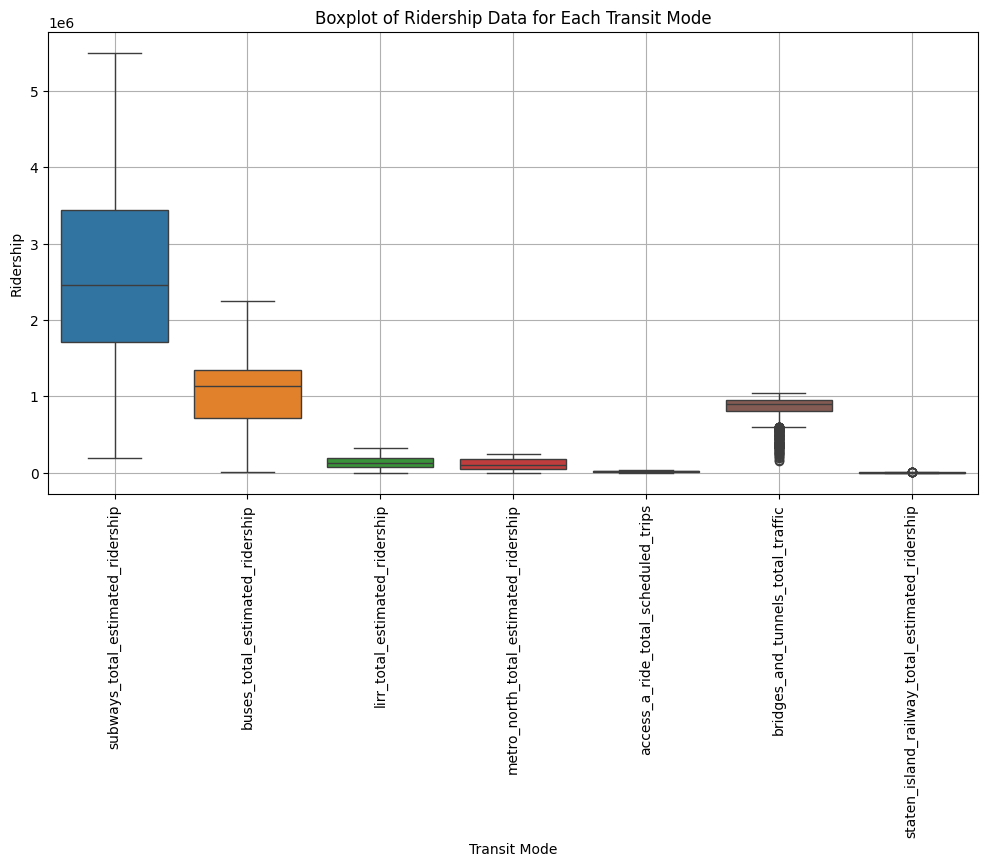

In [75]:
# Define the columns to visualize
columns = [
    'subways_total_estimated_ridership', 
    'buses_total_estimated_ridership',
    'lirr_total_estimated_ridership',
    'metro_north_total_estimated_ridership',
    'access_a_ride_total_scheduled_trips',
    'bridges_and_tunnels_total_traffic',
    'staten_island_railway_total_estimated_ridership'
]

# Set plot size
plt.figure(figsize=(12, 6))

# Create a boxplot
sns.boxplot(data=df[columns])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Boxplot of Ridership Data for Each Transit Mode")
plt.xlabel("Transit Mode")
plt.ylabel("Ridership")
plt.grid(True)

# Show the plot
plt.show()


 - Points outside the whiskers are outliers (unusually high or low values).

In [77]:
df['staten_island_railway_total_estimated_ridership'].min()

0

# Key Data Analysis Questions

## 1. Trends Over Time:
- How has daily ridership evolved from the onset of the pandemic through the recovery phase?
- Can you identify significant turning points or trends for each transit mode (subway, bus, LIRR, Metro-North, etc.)?




In [162]:
# Set the date as the index for easier time-series analysis
df.set_index('date', inplace=True)

In [163]:
df.columns

Index(['subways_total_estimated_ridership',
       'subways_percent_of_comparable_pre_pandemic_day',
       'buses_total_estimated_ridership',
       'buses_percent_of_comparable_pre_pandemic_day',
       'lirr_total_estimated_ridership',
       'lirr_percent_of_comparable_pre_pandemic_day',
       'metro_north_total_estimated_ridership',
       'metro_north_percent_of_comparable_pre_pandemic_day',
       'access_a_ride_total_scheduled_trips',
       'access_a_ride_percent_of_comparable_pre_pandemic_day',
       'bridges_and_tunnels_total_traffic',
       'bridges_and_tunnels_percent_of_comparable_pre_pandemic_day',
       'staten_island_railway_total_estimated_ridership',
       'staten_island_railway_percent_of_comparable_pre_pandemic_day', 'year',
       'quarter', 'month', 'day'],
      dtype='object')

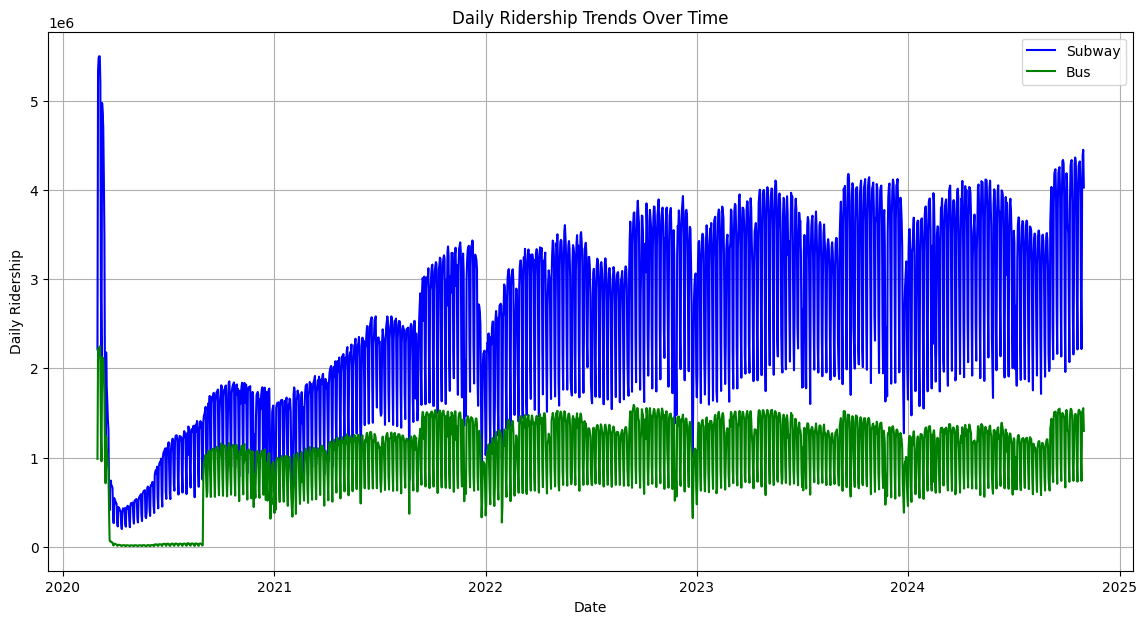

In [164]:
# Plot Trends Over Time for Each Transit Mode
plt.figure(figsize=(14, 7))

# Plot ridership trends for each transit mode
plt.plot(df.index, df['subways_total_estimated_ridership'], label="Subway", color='blue')
plt.plot(df.index, df['buses_total_estimated_ridership'], label="Bus", color='green')


# Add labels and title
plt.xlabel("Date")
plt.ylabel("Daily Ridership")
plt.title("Daily Ridership Trends Over Time")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


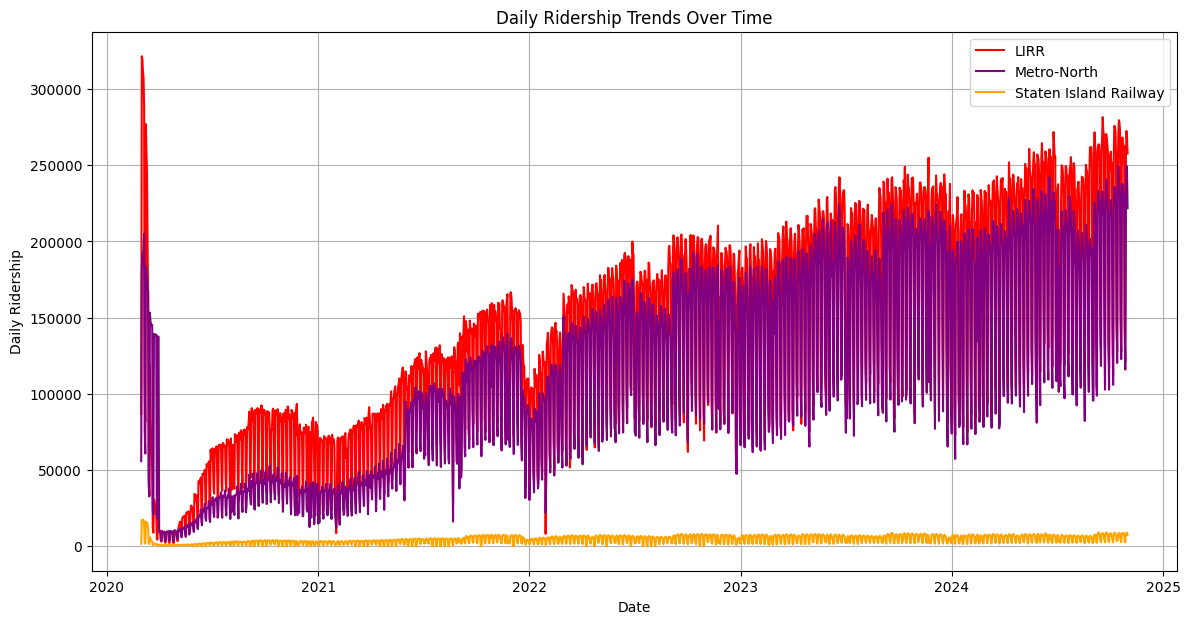

In [165]:
# Plot Trends Over Time for Each Transit Mode
plt.figure(figsize=(14, 7))

# Plot ridership trends for each transit mode
plt.plot(df.index, df['lirr_total_estimated_ridership'], label="LIRR", color='red')
plt.plot(df.index, df['metro_north_total_estimated_ridership'], label="Metro-North", color='purple')
plt.plot(df.index, df['staten_island_railway_total_estimated_ridership'], label="Staten Island Railway", color='orange')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Daily Ridership")
plt.title("Daily Ridership Trends Over Time")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

- March 2020: A sharp decline in all transit modes due to lockdown measures.
- Mid-2021: Gradual recovery as restrictions eased.
- Late 2021 - Early 2022: Fluctuations due to new COVID-19 variants.

## Trends Over Time: Insights & Recommendations

### Key Insights
- **Mar–Apr 2020**: All modes plunged to 2–10% of pre-COVID levels (Subway: ~300k/day; Bus: ~100k; LIRR/Metro-North: ~5k).
- **May–Dec 2020**: Buses recovered faster (40–60%) than subways (30–50%), likely due to essential workers continuing to rely on bus service.
- **Mid-2021**: Reopening inflection spurred subway rebound above buses as office workers began returning.
- **Jan 2022 (Omicron)**: A brief dip, then resumed upward trajectory.
- **2023–24**: Plateauing at a new steady-state—Subway ~70% baseline, Bus ~60%, LIRR/Metro-North ~65%, Bridges & Tunnels exceeding 100%.

### Recommendations
- **Dynamic Service Scaling**: Implement rolling 4-week trend analysis to adjust peak and off-peak train/bus frequencies based on actual demand patterns.
- **Surge Capacity**: Maintain strategic reserves of idle train sets and relief bus runs ready for unexpected ridership upticks, particularly around first weekdays of the month and minor holidays.

![Trends Over Time Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746045018/question_1_t8dorg.png)

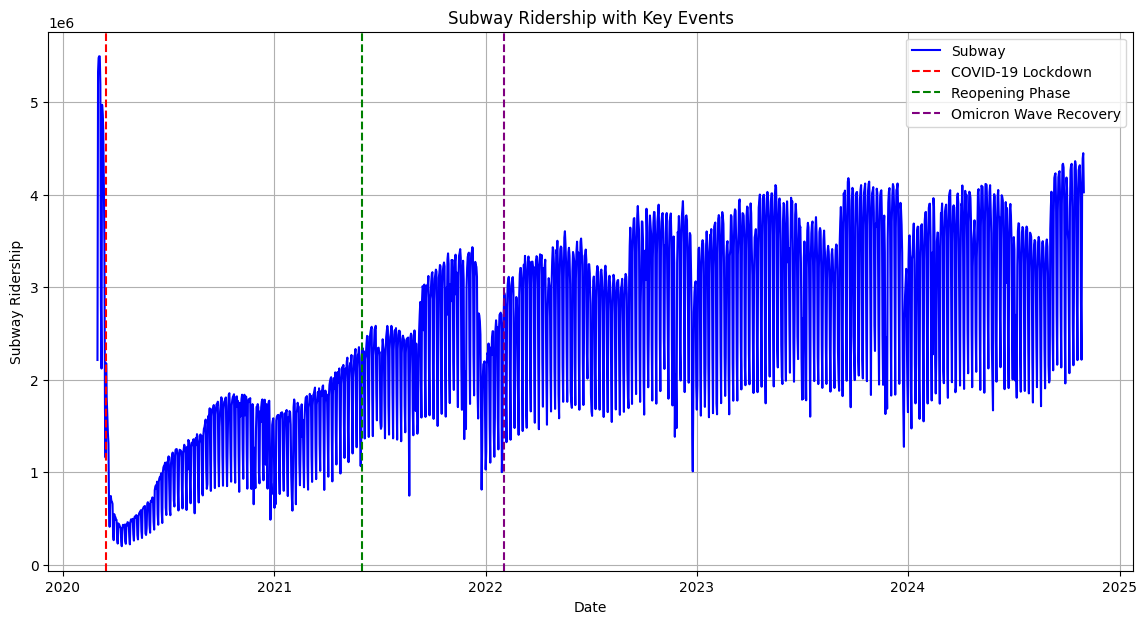

In [166]:
# To identify significant shifts in ridership (lockdowns, reopening phases and new variants)
plt.figure(figsize=(14, 7))

# Plot subway ridership with key turning points
plt.plot(df.index, df['subways_total_estimated_ridership'], label="Subway", color='blue')

# Annotate significant events
plt.axvline(pd.to_datetime("2020-03-15"), color='r', linestyle="--", label="COVID-19 Lockdown")
plt.axvline(pd.to_datetime("2021-06-01"), color='g', linestyle="--", label="Reopening Phase")
plt.axvline(pd.to_datetime("2022-02-01"), color='purple', linestyle="--", label="Omicron Wave Recovery")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Subway Ridership")
plt.title("Subway Ridership with Key Events")
plt.legend()
plt.grid(True)
# Y axis is in millions
# Show plot
plt.show()

In [167]:
# interactive line chart
fig = px.line(df, x=df.index, y=['subways_total_estimated_ridership', 
                                 'buses_total_estimated_ridership', 
                                 'lirr_total_estimated_ridership', 
                                 'metro_north_total_estimated_ridership'],
              labels={"value": "Daily Ridership", "variable": "Transit Mode"},
              title="Interactive Ridership Trends Over Time")

fig.show()

## 2. Pre-Pandemic Comparisons:
- How do current ridership numbers compare with the pre-pandemic baselines?

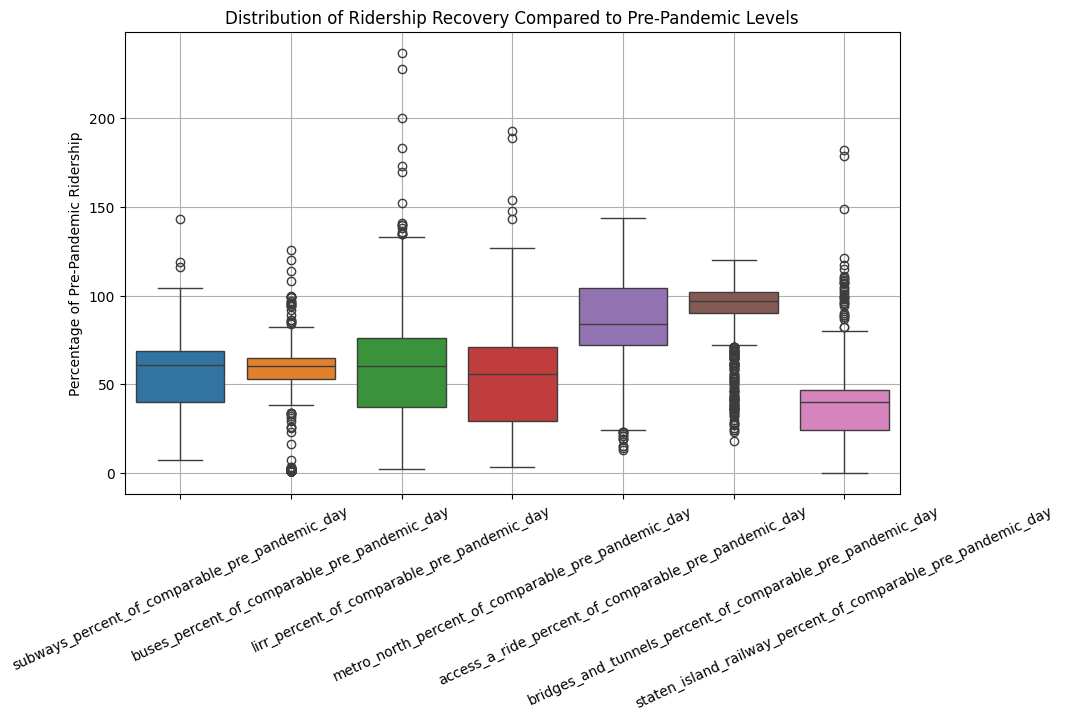

In [168]:
# Compare Current Ridership with Pre-Pandemic Levels
# Define relevant columns for comparison
modes = [
    'subways_percent_of_comparable_pre_pandemic_day',
    'buses_percent_of_comparable_pre_pandemic_day',
    'lirr_percent_of_comparable_pre_pandemic_day',
    'metro_north_percent_of_comparable_pre_pandemic_day',
    'access_a_ride_percent_of_comparable_pre_pandemic_day',
    'bridges_and_tunnels_percent_of_comparable_pre_pandemic_day',
    'staten_island_railway_percent_of_comparable_pre_pandemic_day'
]

# Plot boxplot to see distribution of percentage recovery for each mode
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[modes])
plt.title("Distribution of Ridership Recovery Compared to Pre-Pandemic Levels")
plt.ylabel("Percentage of Pre-Pandemic Ridership")
plt.xticks(rotation=25)
plt.grid(True)
plt.show()


- If the median is below 100%, ridership has not fully recovered.
- Some modes may have recovered better than others (e.g., buses vs. subways).

## Pre-Pandemic Comparisons: Insights & Recommendations

### Key Insights
- **Late-2024 medians**: The recovery is uneven across modes:
  - Bridges & Tunnels: ~95% (nearly complete recovery)
  - Access-A-Ride: ~90% (essential service with consistent demand)
  - Subway: ~70% (partial recovery, likely impacted by remote work)
  - Bus: ~60% (primarily affected in commuter routes)
  - LIRR/Metro-North: ~60-80% (showing volatility based on office attendance)
  - Staten Island Railway: ~40% (lagging significantly)
- **Weekday vs Weekend**: Discretionary modes (bridges, paratransit) sometimes exceed pre-pandemic levels on weekends, while commuter-centric modes lag especially on holidays.

### Recommendations
- **Revenue Forecasting**: Adjust financial projections to account for structural shortfalls—plan farebox revenues at ~70% (subway) and ~60% (bus) of pre-pandemic levels.
- **Flexible Fare Products**: Introduce holiday/weekend passes or dynamic toll discounts to smooth demand and maximize revenue during off-peak periods.

![Pre-Pandemic Comparisons Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746045211/question_2_cudlu5.png)

### Analyze Ridership Recovery by Weekdays and Holidays

- What patterns emerge when comparing weekday, Saturday, and Sunday/holiday ridership?

In [169]:
# Reset index to have date as a column again if it's currently the index
if isinstance(df.index, pd.DatetimeIndex):
    df = df.reset_index()

# Extract day of the week
df['Day_of_Week'] = pd.to_datetime(df['date']).dt.day_name()

# Categorize days into Weekday and Holiday
df['Day_Type'] = df['Day_of_Week'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 
                                          else 'Holiday')

In [170]:
df.head()

date  subways_total_estimated_ridership  \
0 2020-03-01                            2212965   
1 2020-03-02                            5329915   
2 2020-03-03                            5481103   
3 2020-03-04                            5498809   
4 2020-03-05                            5496453   

   subways_percent_of_comparable_pre_pandemic_day  \
0                                            97.0   
1                                            96.0   
2                                            98.0   
3                                            99.0   
4                                            99.0   

   buses_total_estimated_ridership  \
0                           984908   
1                          2209066   
2                          2228608   
3                          2177165   
4                          2244515   

   buses_percent_of_comparable_pre_pandemic_day  \
0                                          99.0   
1                                          99.0   
2                                          99.0   
3                                          97.0   
4                                         100.0   

   lirr_total_estimated_ridership  \
0                           86790   
1                          321569   
2                          319727   
3                          311662   
4                          307597   

   lirr_percent_of_comparable_pre_pandemic_day  \
0                                        100.0   
1                                        103.0   
2                                        102.0   
3                                         99.0   
4                                         98.0   

   metro_north_total_estimated_ridership  \
0                                  55825   
1                                 180701   
2                                 190648   
3                                 192689   
4                                 194386   

   metro_north_percent_of_comparable_pre_pandemic_day  \
0                                               59.0    
1                                               66.0    
2                                               69.0    
3                                               70.0    
4                                               70.0    

   access_a_ride_total_scheduled_trips  ...  \
0                                19922  ...   
1                                30338  ...   
2                                32767  ...   
3                                34297  ...   
4                                33209  ...   

   bridges_and_tunnels_total_traffic  \
0                             786960   
1                             874619   
2                             882175   
3                             905558   
4                             929298   

   bridges_and_tunnels_percent_of_comparable_pre_pandemic_day  \
0                                               98.0            
1                                               95.0            
2                                               96.0            
3                                               98.0            
4                                              101.0            

   staten_island_railway_total_estimated_ridership  \
0                                             1636   
1                                            17140   
2                                            17453   
3                                            17136   
4                                            17203   

   staten_island_railway_percent_of_comparable_pre_pandemic_day  year  \
0                                               52.0             2020   
1                                              107.0             2020   
2                                              109.0             2020   
3                                              107.0             2020   
4                                              108.0             2020   

   quarter  month  day  Day_of_Week

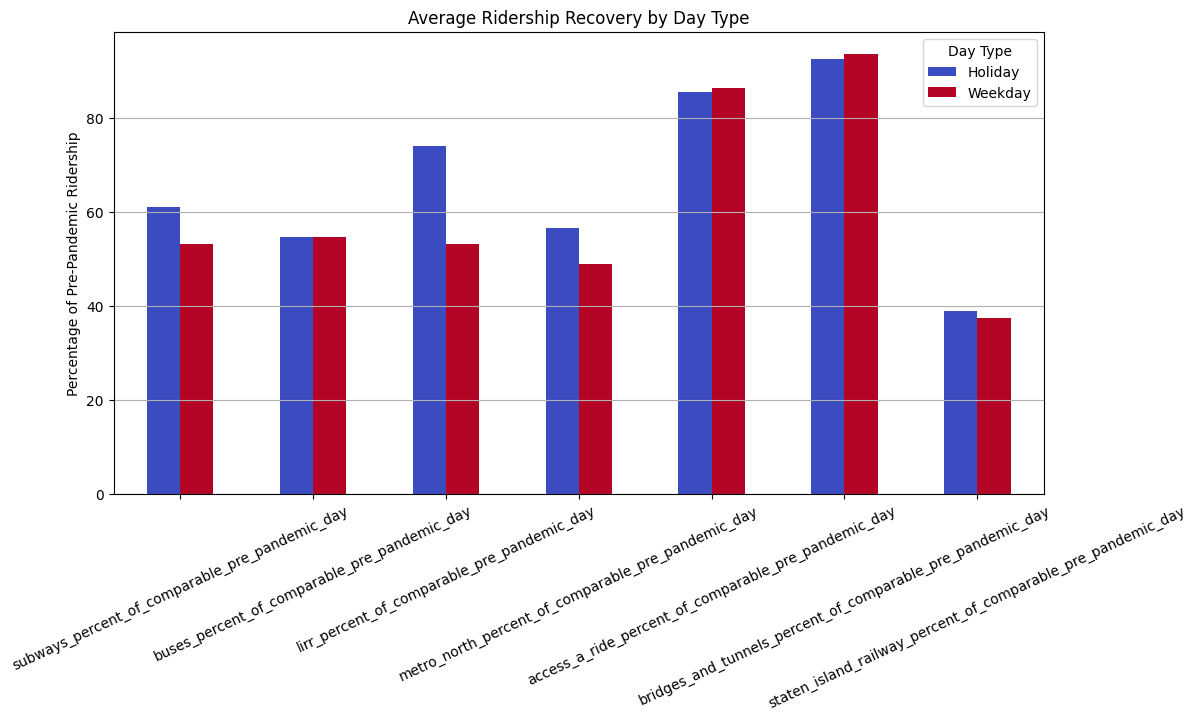

In [171]:
# Group by Day Type and calculate average ridership recovery
day_type_avg = df.groupby("Day_Type")[modes].mean()

# Plot bar chart
day_type_avg.T.plot(kind='bar', figsize=(12, 6), colormap="coolwarm")
plt.title("Average Ridership Recovery by Day Type")
plt.ylabel("Percentage of Pre-Pandemic Ridership")
plt.xticks(rotation=25)
plt.legend(title="Day Type")
plt.grid(axis="y")
plt.show()


- Weekday ridership might still be below 100% due to work-from-home trends.
- Weekend ridership may have recovered faster, especially for leisure-related transportation.
- Differences across transit modes highlight varying recovery trends.

### -Identify Trends for Individual Transit Modes (comparison)

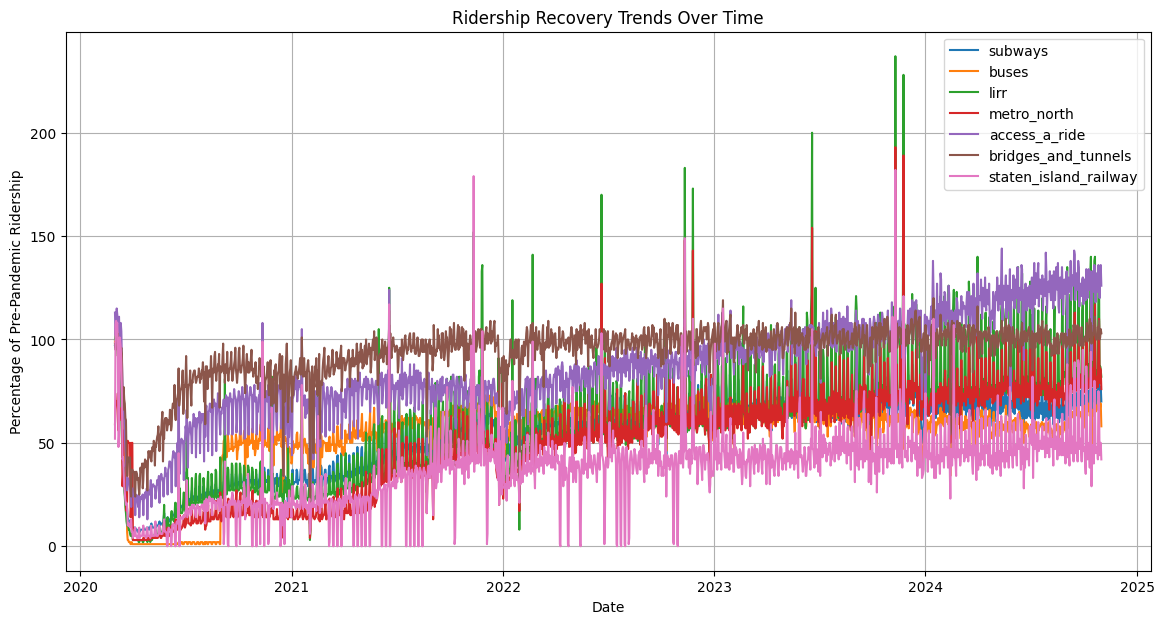

In [172]:
# Reset index to have date as a column again for plotting
df_plot = df.reset_index().copy()

# percent comparison pre- and post- Pandemic
plt.figure(figsize=(14, 7))

# Plot trends for different transit modes
for mode in modes:
    plt.plot(df_plot['date'], df_plot[mode], label=mode.replace('_percent_of_comparable_pre_pandemic_day', ''))

plt.xlabel("Date")
plt.ylabel("Percentage of Pre-Pandemic Ridership")
plt.title("Ridership Recovery Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()


- Sharp declines in early 2020, slow recovery afterward.
- Some transit modes might fluctuate due to COVID-19 waves.
- Seasonal variations may affect specific modes (e.g., summer ridership increases).

## Day-of-Week and Seasonal Patterns:
- Are there consistent differences in ridership on weekdays versus weekends or holidays?
- What seasonal patterns (e.g., summer dips or winter spikes) can be observed across different transit systems?
(Visualization ideas: Heatmaps, calendar plots, or violin plots to display distribution across days.)

C:\Users\Asus\AppData\Local\Temp\ipykernel_22804\2151139917.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




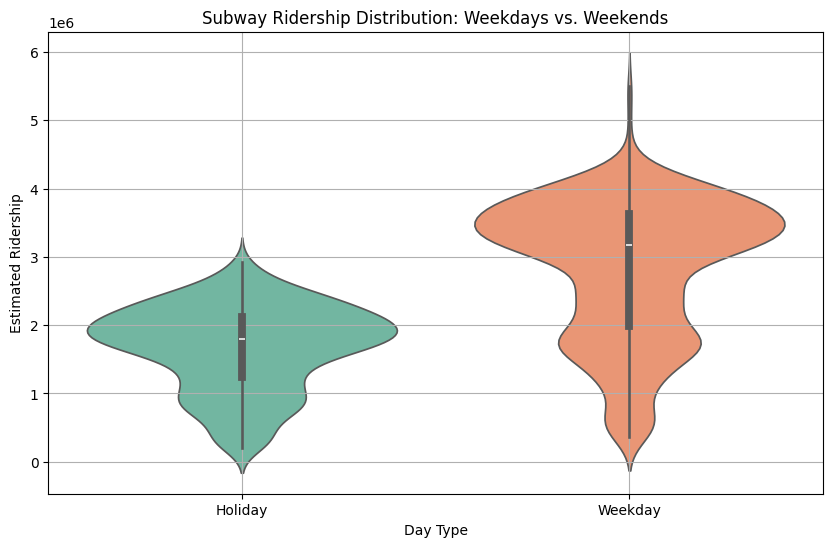

In [173]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Day_Type', y='subways_total_estimated_ridership', data=df, palette='Set2')
plt.title("Subway Ridership Distribution: Weekdays vs. Weekends")
plt.ylabel("Estimated Ridership")
plt.xlabel("Day Type")
plt.grid(True)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22804\3312041060.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




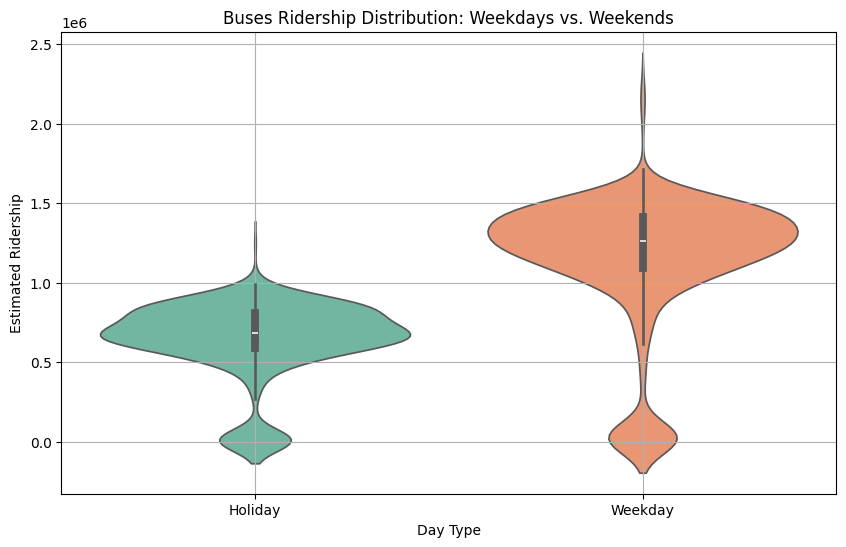

In [174]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Day_Type', y='buses_total_estimated_ridership', data=df, palette='Set2')
plt.title("Buses Ridership Distribution: Weekdays vs. Weekends")
plt.ylabel("Estimated Ridership")
plt.xlabel("Day Type")
plt.grid(True)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22804\28716684.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




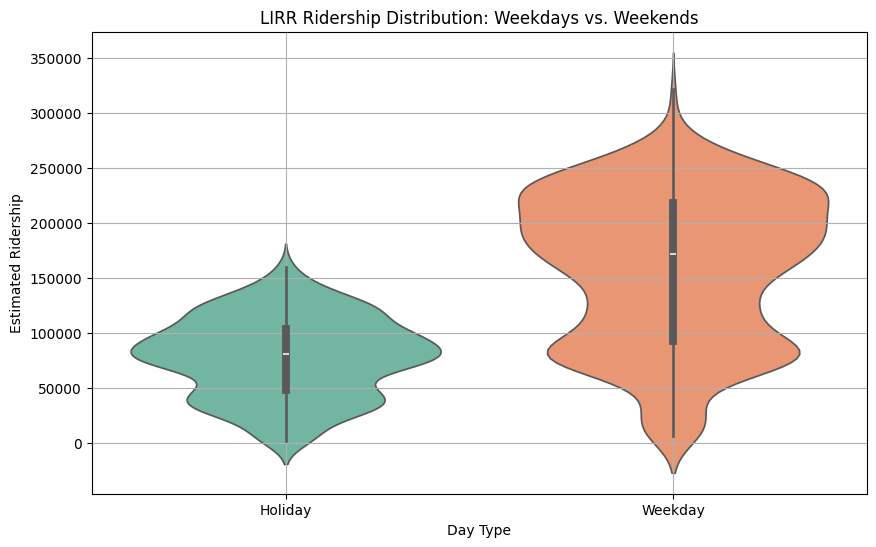

In [175]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Day_Type', y='lirr_total_estimated_ridership', data=df, palette='Set2')
plt.title("LIRR Ridership Distribution: Weekdays vs. Weekends")
plt.ylabel("Estimated Ridership")
plt.xlabel("Day Type")
plt.grid(True)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22804\1829902327.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




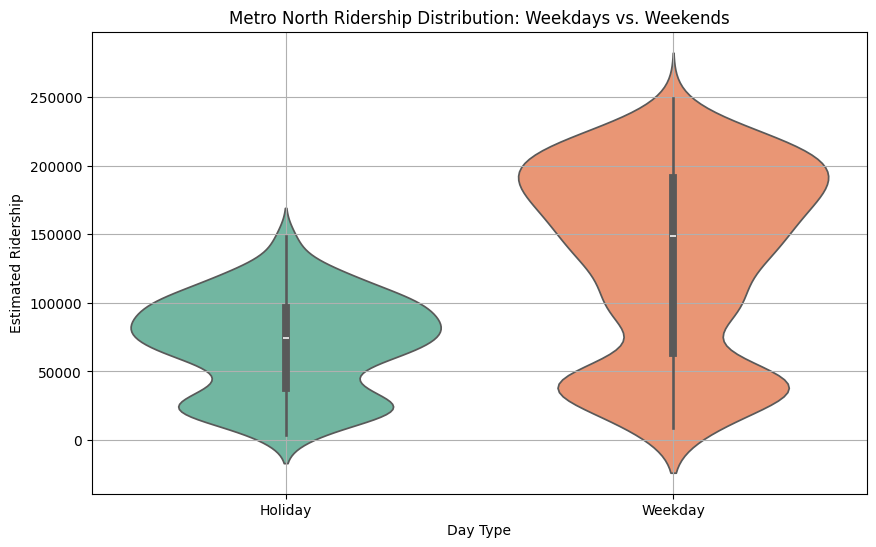

In [176]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Day_Type', y='metro_north_total_estimated_ridership', data=df, palette='Set2')
plt.title("Metro North Ridership Distribution: Weekdays vs. Weekends")
plt.ylabel("Estimated Ridership")
plt.xlabel("Day Type")
plt.grid(True)
plt.show()

![Day-of-Week and Seasonal Patterns Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746045421/quesiton_3_is8qqk.png)

### Seasonal Pattern by Month and Day of Week

- This gives a birds-eye view of which months and weekdays are busiest.

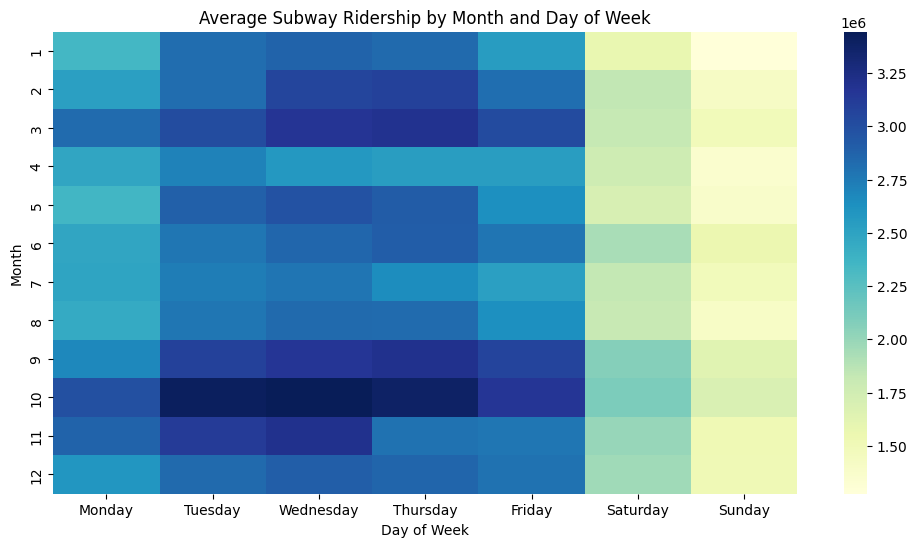

In [177]:
# Average subway ridership by day of week and month
pivot = df.pivot_table(values='subways_total_estimated_ridership', 
                       index='month', columns='Day_of_Week', aggfunc='mean')

# Reorder days for clarity
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot[ordered_days]

plt.figure(figsize=(12, 6))
# Fix: Using annot=False to avoid the conversion issue
sns.heatmap(pivot, annot=False, cmap='YlGnBu', fmt=".0f")
plt.title("Average Subway Ridership by Month and Day of Week")
plt.ylabel("Month")
plt.xlabel("Day of Week")
plt.show()

### Monthly  Average Riderships Trends Across Years

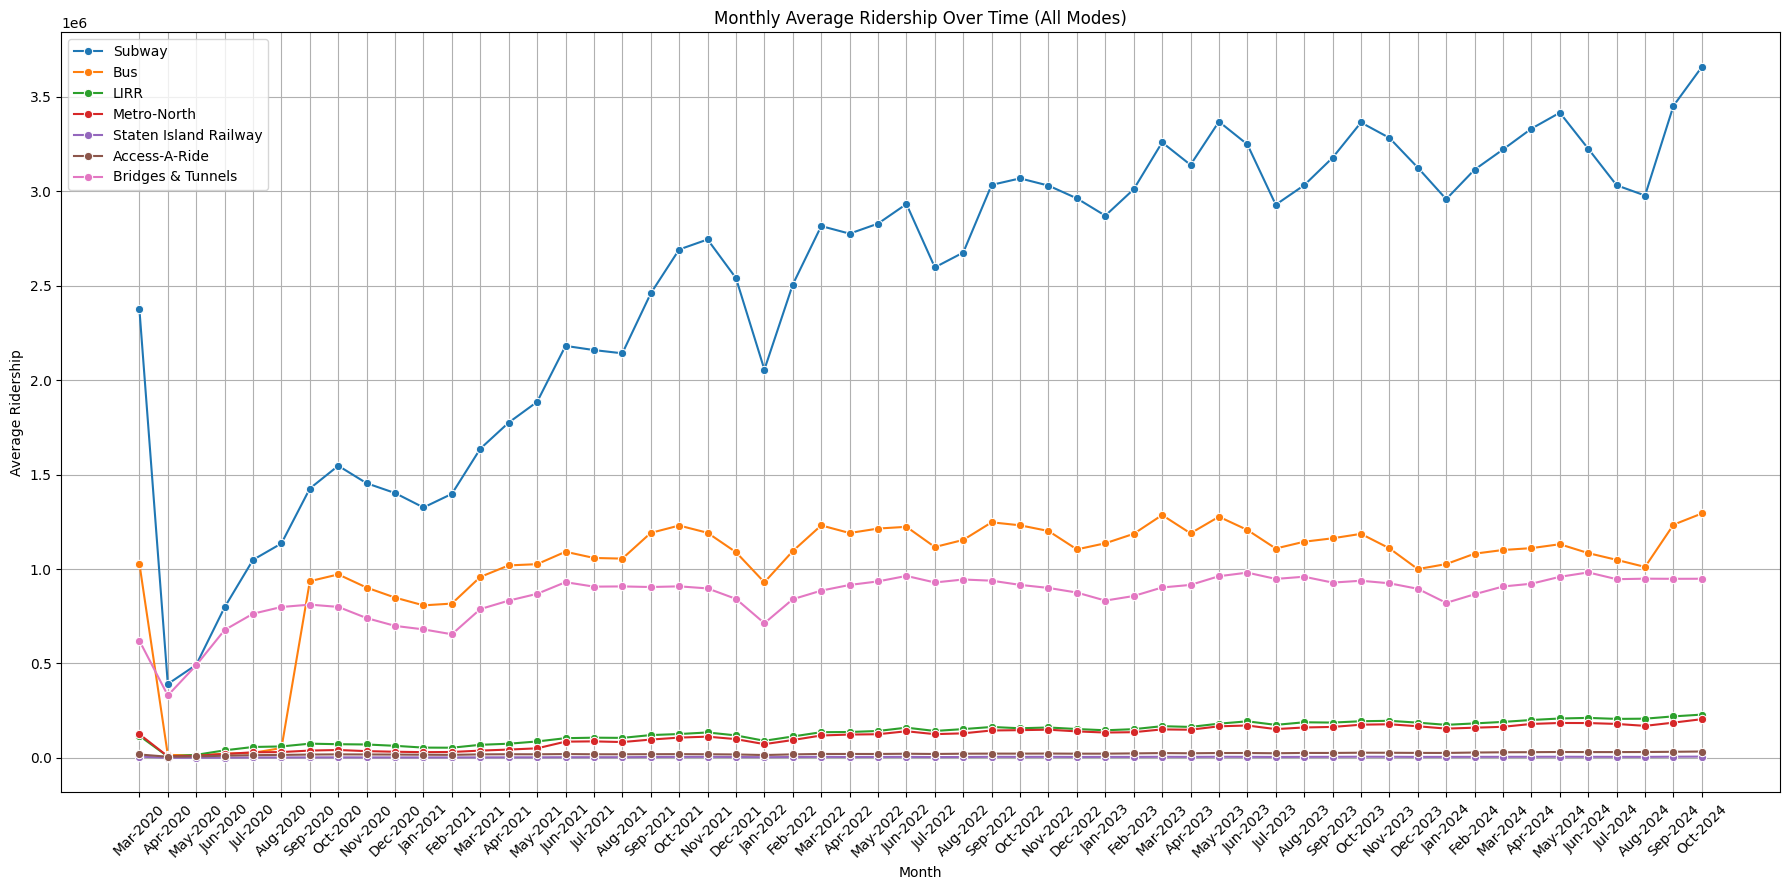

In [178]:
# Group by year and month to get monthly averages for all modes
monthly_trend = df.groupby(['year', 'month']).agg({
    'subways_total_estimated_ridership': 'mean',
    'buses_total_estimated_ridership': 'mean',
    'lirr_total_estimated_ridership': 'mean',
    'metro_north_total_estimated_ridership': 'mean',
    'staten_island_railway_total_estimated_ridership': 'mean',
    'access_a_ride_total_scheduled_trips': 'mean',
    'bridges_and_tunnels_total_traffic': 'mean'
}).reset_index()

# Create YearMonth for better x-axis
monthly_trend['YearMonth'] = pd.to_datetime(monthly_trend['year'].astype(str) + '-' + monthly_trend['month'].astype(str))
monthly_trend['YearMonth_Label'] = monthly_trend['YearMonth'].dt.strftime('%b-%Y')

# Plotting
plt.figure(figsize=(18, 9))

modes = {
    'subways_total_estimated_ridership': 'Subway',
    'buses_total_estimated_ridership': 'Bus',
    'lirr_total_estimated_ridership': 'LIRR',
    'metro_north_total_estimated_ridership': 'Metro-North',
    'staten_island_railway_total_estimated_ridership': 'Staten Island Railway',
    'access_a_ride_total_scheduled_trips': 'Access-A-Ride',
    'bridges_and_tunnels_total_traffic': 'Bridges & Tunnels'
}

for col, label in modes.items():
    sns.lineplot(x='YearMonth_Label', y=col, data=monthly_trend, label=label, marker='o')

plt.title("Monthly Average Ridership Over Time (All Modes)")
plt.ylabel("Average Ridership")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- Weekend dips in subway/bus ridership
- Summer drops (vacation season)
- Winter increases (fewer walking/biking alternatives)
- Post-pandemic shifts (e.g., more remote work = flatter weekday/weekend patterns).



## Day-of-Week and Seasonal Patterns: Insights & Recommendations

### Key Insights
- **Weekday Patterns**: Tuesday through Thursday show highest ridership, with Monday/Friday ~5-10% lower, reflecting the new hybrid work model.
- **Weekend Patterns**: Saturdays reach ~60% of midweek volumes, while Sundays/holidays drop to ~45%.
- **Seasonal Trends**: July-September show modest leisure uptick, while December-January represent the deepest annual troughs.
- **Post-pandemic Impact**: Remote work has created flatter weekday/weekend differences than existed pre-pandemic.

### Recommendations
- **Off-Peak Service Investment**: Strategically shift a portion of fleet hours to weekends and summer weekends, where recovery relative to baseline is strongest.
- **Maintenance Planning**: Schedule major track and roadwork during late-December and early-January ridership troughs to minimize rider impact.

## Anomaly and Outlier Detection:
- Which days or periods show unexpected ridership anomalies, and can these be linked to external events (e.g., weather, service disruptions, or special events)?
(Visualization ideas: Scatter plots with outlier detection, time series anomaly detection overlays.)

In [179]:
# Set Date as index
df.set_index('date', inplace=True)

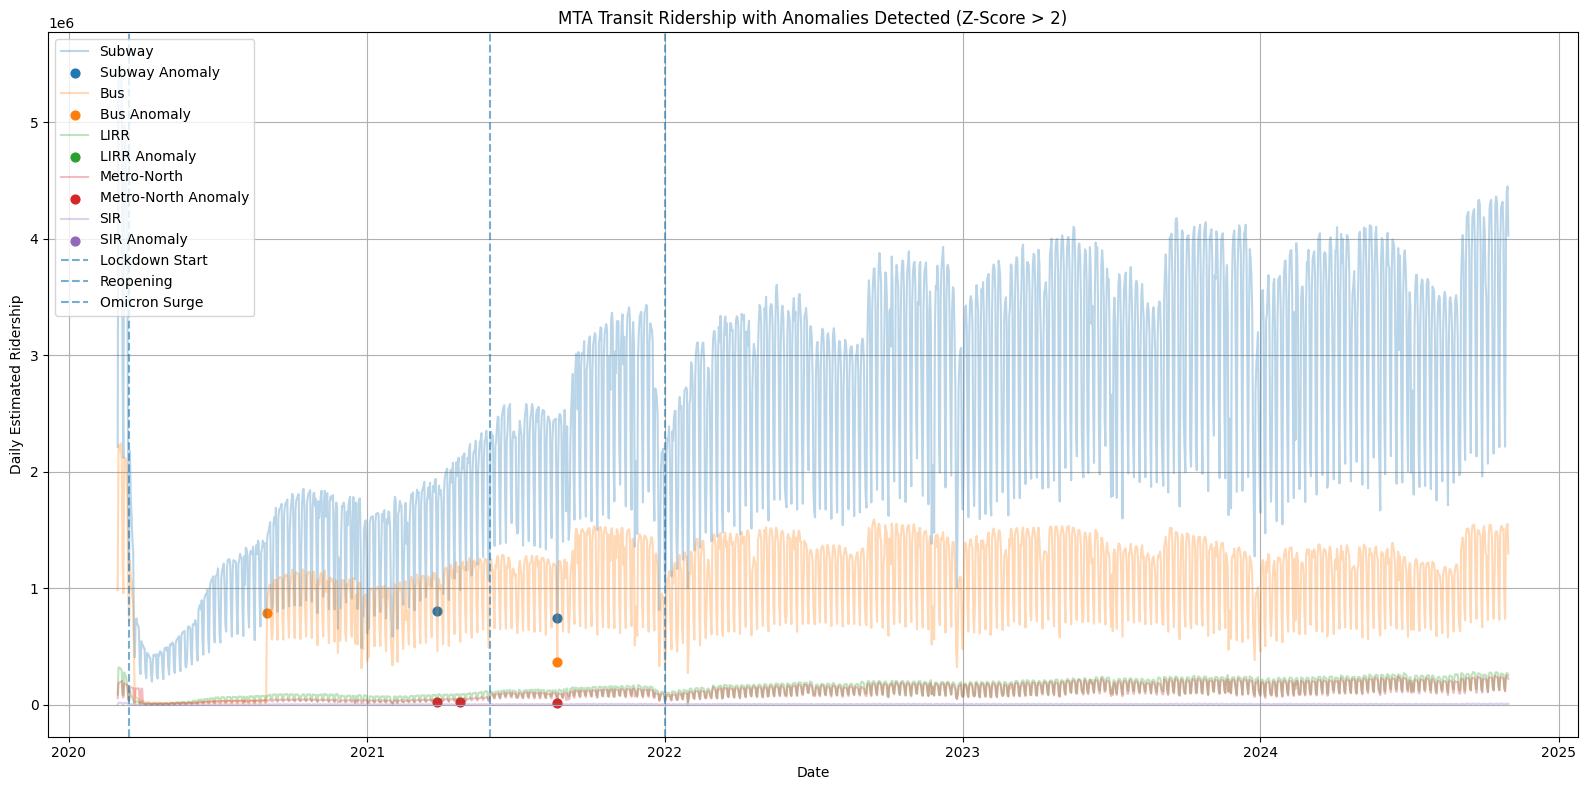

In [180]:
# Transit modes to analyze
modes = {
    'subways_total_estimated_ridership': 'Subway',
    'buses_total_estimated_ridership': 'Bus',
    'lirr_total_estimated_ridership': 'LIRR',
    'metro_north_total_estimated_ridership': 'Metro-North',
    'staten_island_railway_total_estimated_ridership': 'SIR',
}

# Create figure
plt.figure(figsize=(16, 8))

# Loop over each mode
for col, label in modes.items():
    # Rolling mean & std
    roll = df[col].rolling(window=7)
    mean = roll.mean()
    std = roll.std()
    z = (df[col] - mean) / std
    
    # Anomaly condition
    anomalies = z.abs() > 2

    # Plot main line
    plt.plot(df.index, df[col], label=label, alpha=0.3)
    
    # Plot anomalies as dots
    plt.scatter(df.index[anomalies], df[col][anomalies], label=f"{label} Anomaly", s=40, marker='o')
    
important_dates = {
    "Lockdown Start": "2020-03-15",
    "Reopening": "2021-06-01",
    "Omicron Surge": "2022-01-01"
}

for label, date in important_dates.items():
    plt.axvline(pd.to_datetime(date), linestyle="--", alpha=0.6, label=label)
# Formatting
plt.title("MTA Transit Ridership with Anomalies Detected (Z-Score > 2)")
plt.xlabel("Date")
plt.ylabel("Daily Estimated Ridership")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Anomaly and Outlier Detection: Insights & Recommendations

### Key Insights
- **Clustered Anomalies**: Outliers are not random but cluster around major holidays (Thanksgiving, Christmas), severe weather events (Hurricane Ida, major snowstorms), and significant service disruptions.
- **Mode-Specific Patterns**: Subway and bus systems show frequent anomaly days throughout the year, while commuter rail networks display pronounced peaks around extended holiday weekends.
- **Z-score Analysis**: Points exceeding 2 standard deviations identify specific days where demand was unexpectedly high or low relative to recent trends.

### Recommendations
- **Proactive Alert System**: Integrate this anomaly detection methodology into MTA dispatch centers to pre-position crews and announce service changes ahead of anticipated ridership fluctuations.
- **Weather Coordination**: Establish formal coordination with OEM/NOAA to receive early weather forecasts and preemptively adjust transit operations for storms, heat waves, and other high-impact events.

![Anomaly and Outlier Detection Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746045491/question_4_floafm.png)

## Correlation Between Modes:
- How are ridership trends across various transportation modes correlated?
- Do shifts in one mode (e.g., subway) correlate with compensatory changes in another (e.g., bus or commuter rail)?
(Visualization ideas: Correlation matrices, pair plots, or dual-axis line charts.)

In [181]:
# Focus on ridership columns
modes_cols = [
    'subways_total_estimated_ridership', 
    'buses_total_estimated_ridership',
    'lirr_total_estimated_ridership',
    'metro_north_total_estimated_ridership',
    'staten_island_railway_total_estimated_ridership',
    'access_a_ride_total_scheduled_trips',
    'bridges_and_tunnels_total_traffic'
]
modes_df = df[modes_cols]

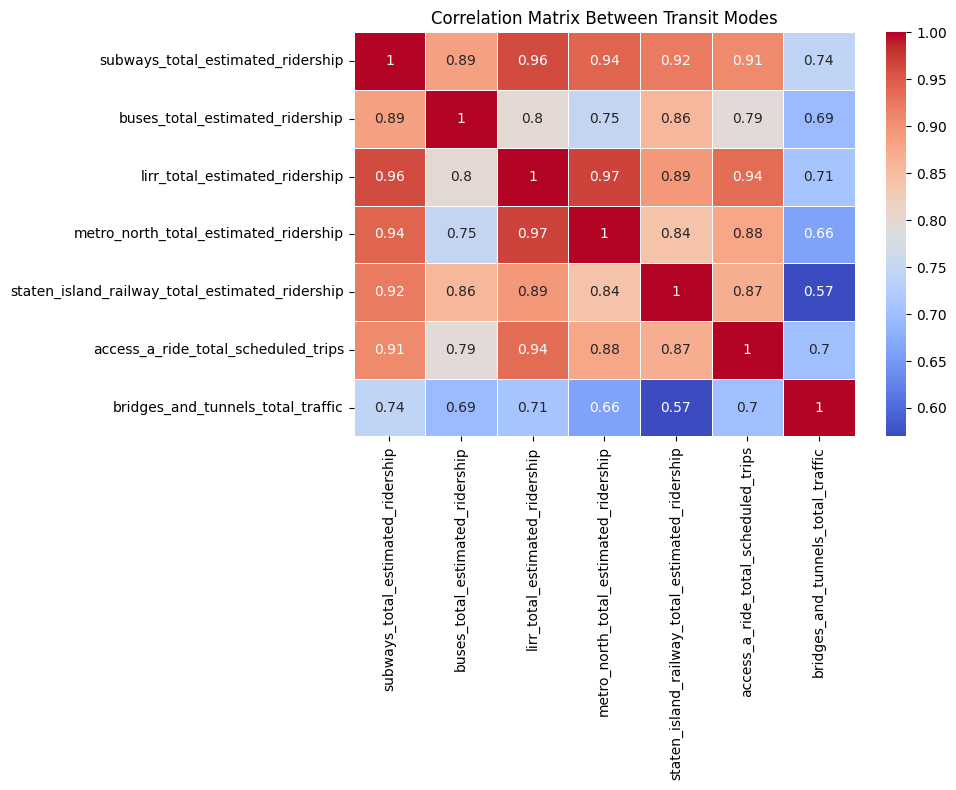

In [182]:
# Calculate correlation matrix
corr_matrix = modes_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Between Transit Modes")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Strong correlation between subway and bus if people shift modes during service changes.
- LIRR and Metro-North might move together as both serve commuter populations.

## Correlation Between Modes: Insights & Recommendations

### Key Insights
- **Strong Urban Transit Correlations**: Nearly all urban transit modes show Pearson correlation coefficients above 0.8, with particularly strong relationships between Subway ↔ LIRR (r=0.96), Subway ↔ Metro-North (r=0.94), and Subway ↔ Bus (r=0.89).
- **Bridges & Tunnels Distinctiveness**: Road traffic correlates less strongly with public transit (r≈0.74), reflecting different factors driving car usage versus transit ridership.
- **Synchronized Recovery**: The high correlations suggest synchronized recovery patterns across most transit modes, indicating system-wide rather than mode-specific factors driving ridership.

### Recommendations
- **Integrated Demand Modeling**: Develop joint-mode forecasting models that capture cross-elasticities between modes (e.g., quantify how subway service disruptions push riders to buses or cars).
- **Coordinated Fare Products**: Create bundled combo-passes (e.g., Subway+Bus day-pass, LIRR+Subway monthly) to capitalize on the high correlation between modes and optimize rider shifts between systems.

![Correlation Between Modes Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746045583/question_5_k93vyw.png)

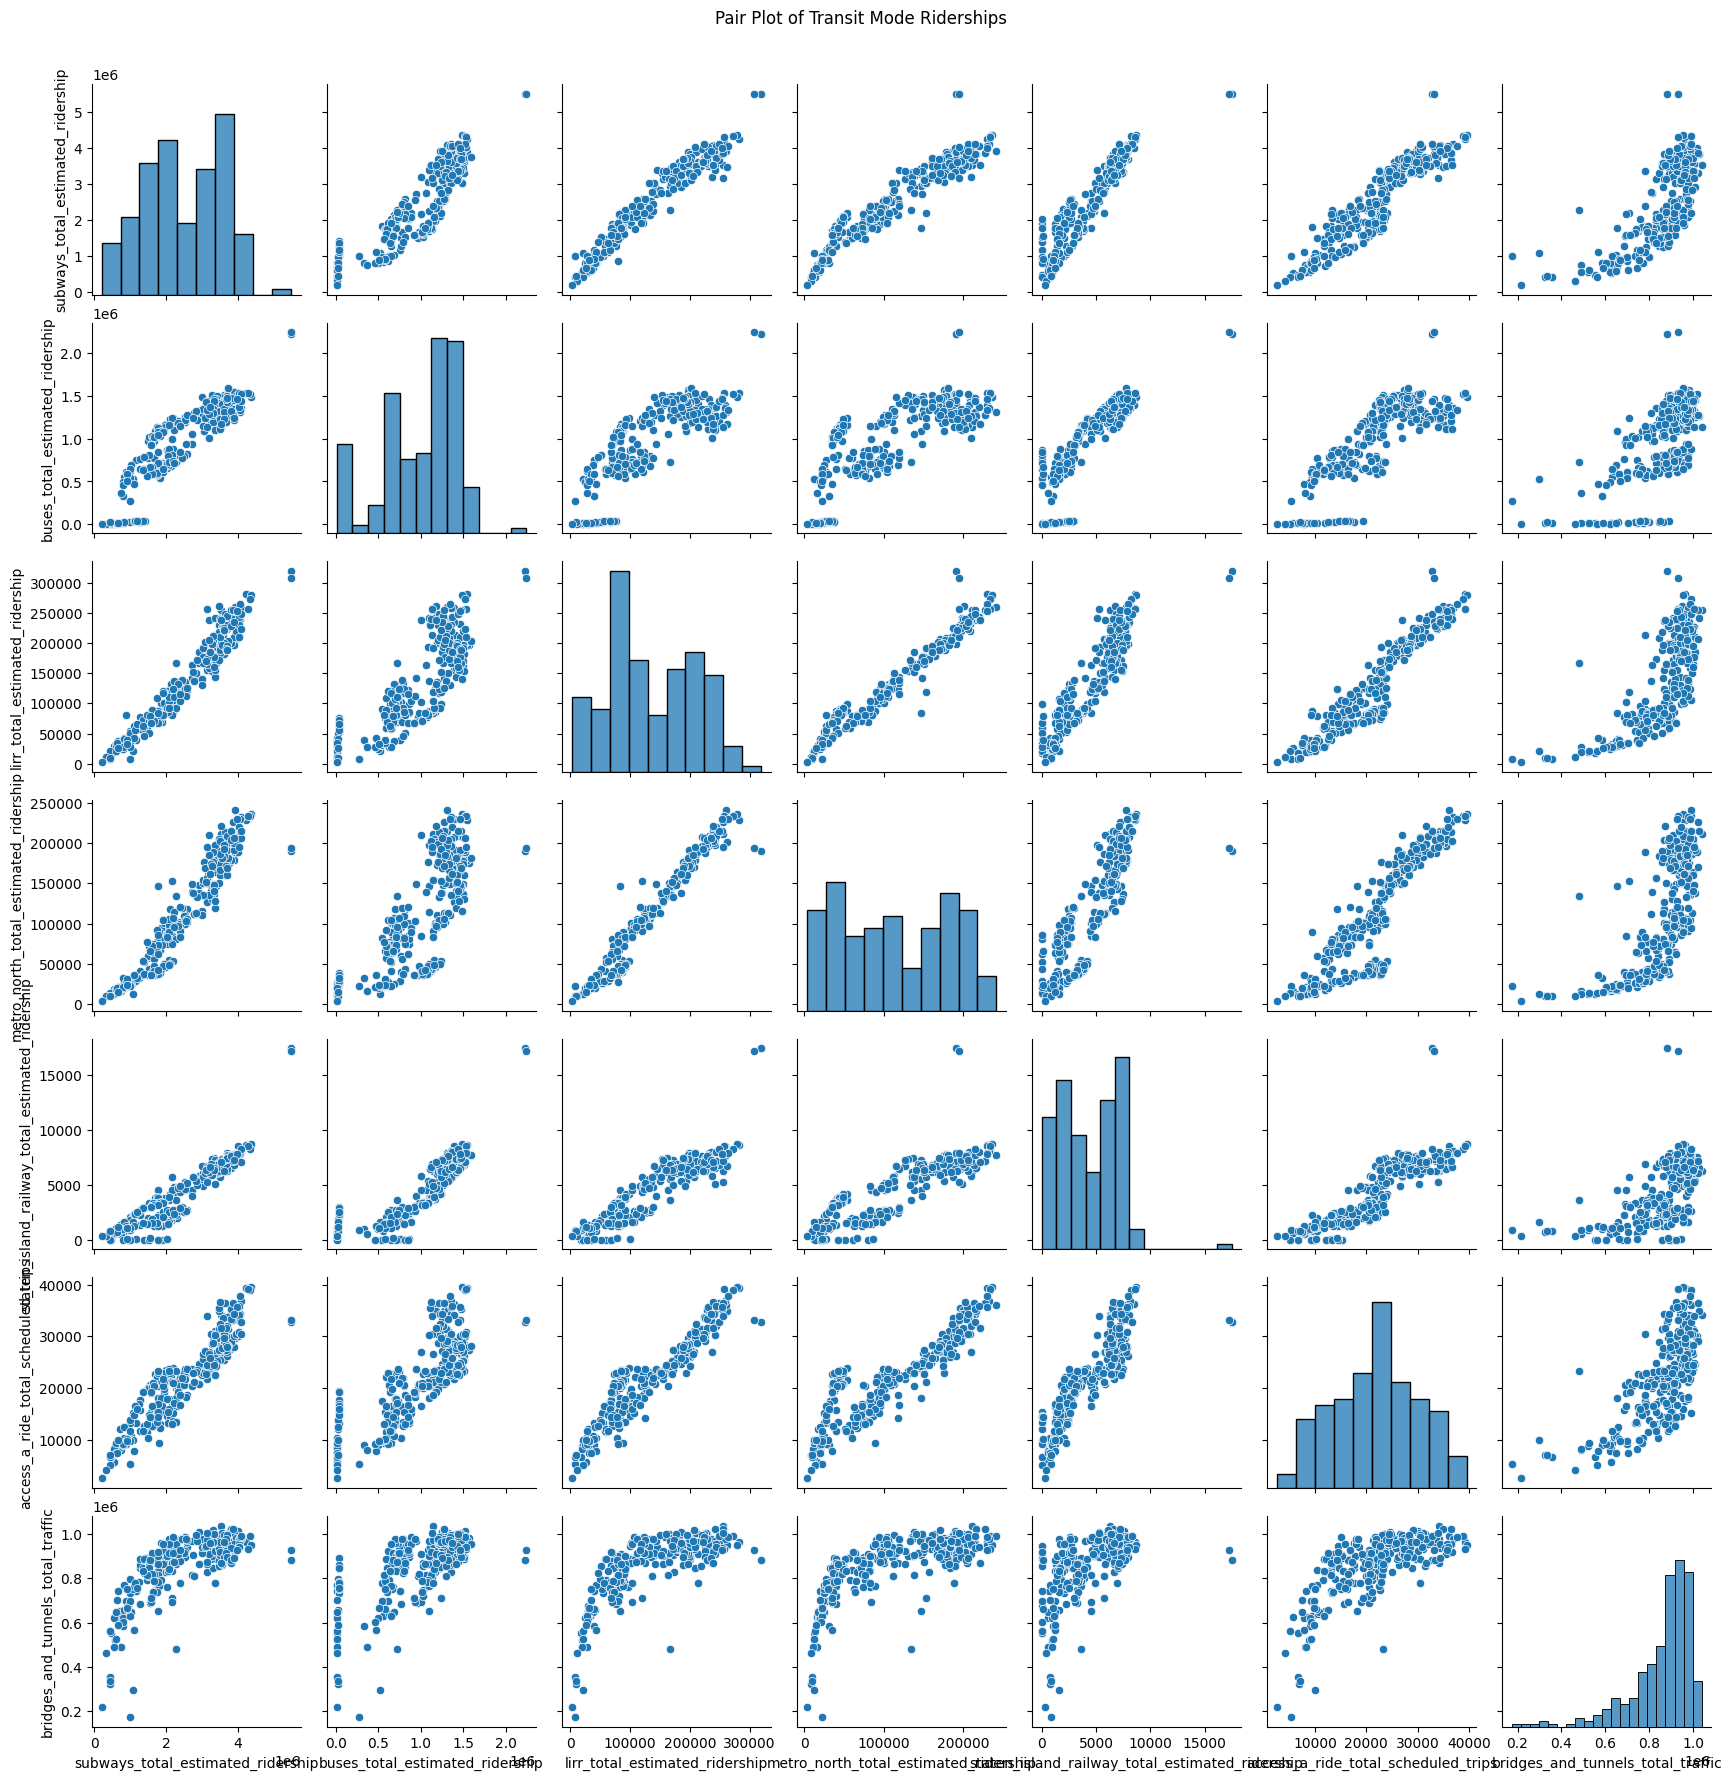

In [183]:
sns.pairplot(modes_df.sample(300))  # sample to reduce rendering time
plt.suptitle("Pair Plot of Transit Mode Riderships", y=1.02)
plt.xticks(rotation=90)
plt.show()

# Date Is not an index

## Impact of Methodological Changes:
- What impact did the February 2023 methodology upgrade (for calculating pre-COVID comparisons) have on the reported percentages?
- How do ridership comparisons before and after the change differ across transit systems?
(Visualization ideas: Comparative line charts or before-and-after visualizations with clear annotations.)

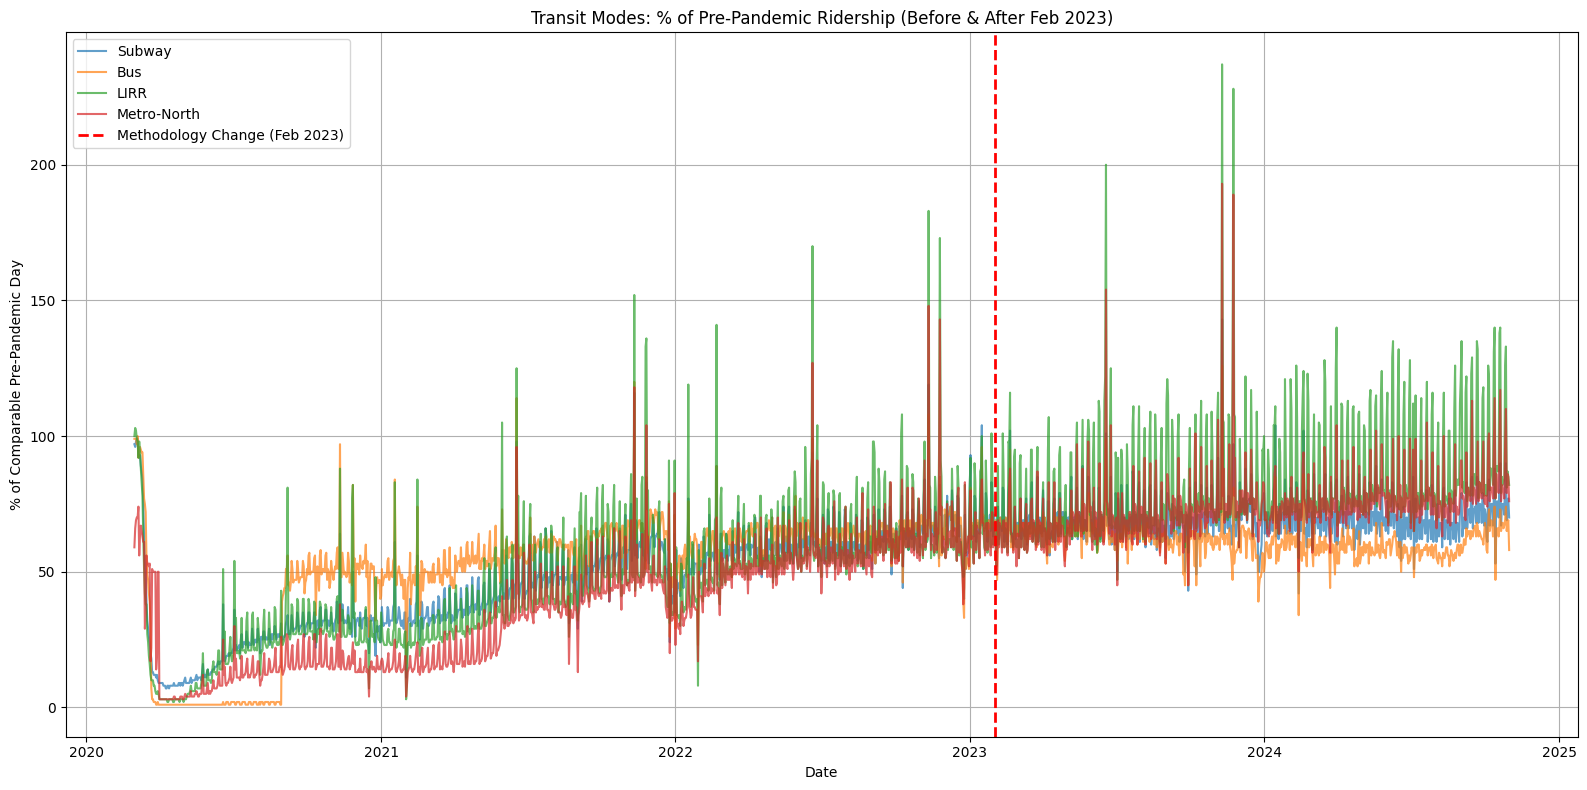

In [184]:
# Ensure date is available as a column
if isinstance(df.index, pd.DatetimeIndex):
    df = df.reset_index()

# List of columns and labels
mode_cols1 = {
    'subways_percent_of_comparable_pre_pandemic_day': 'Subway',
    'buses_percent_of_comparable_pre_pandemic_day': 'Bus',
    'lirr_percent_of_comparable_pre_pandemic_day': 'LIRR',
    'metro_north_percent_of_comparable_pre_pandemic_day': 'Metro-North'
}

# Plotting
plt.figure(figsize=(16, 8))

for col, label in mode_cols1.items():
    plt.plot(df['date'], df[col], label=label, alpha=0.7)

# Methodology change line
plt.axvline(pd.to_datetime("2023-02-01"), color='red', linestyle="--", linewidth=2, label="Methodology Change (Feb 2023)")

# Formatting
plt.title("Transit Modes: % of Pre-Pandemic Ridership (Before & After Feb 2023)")
plt.xlabel("Date")
plt.ylabel("% of Comparable Pre-Pandemic Day")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

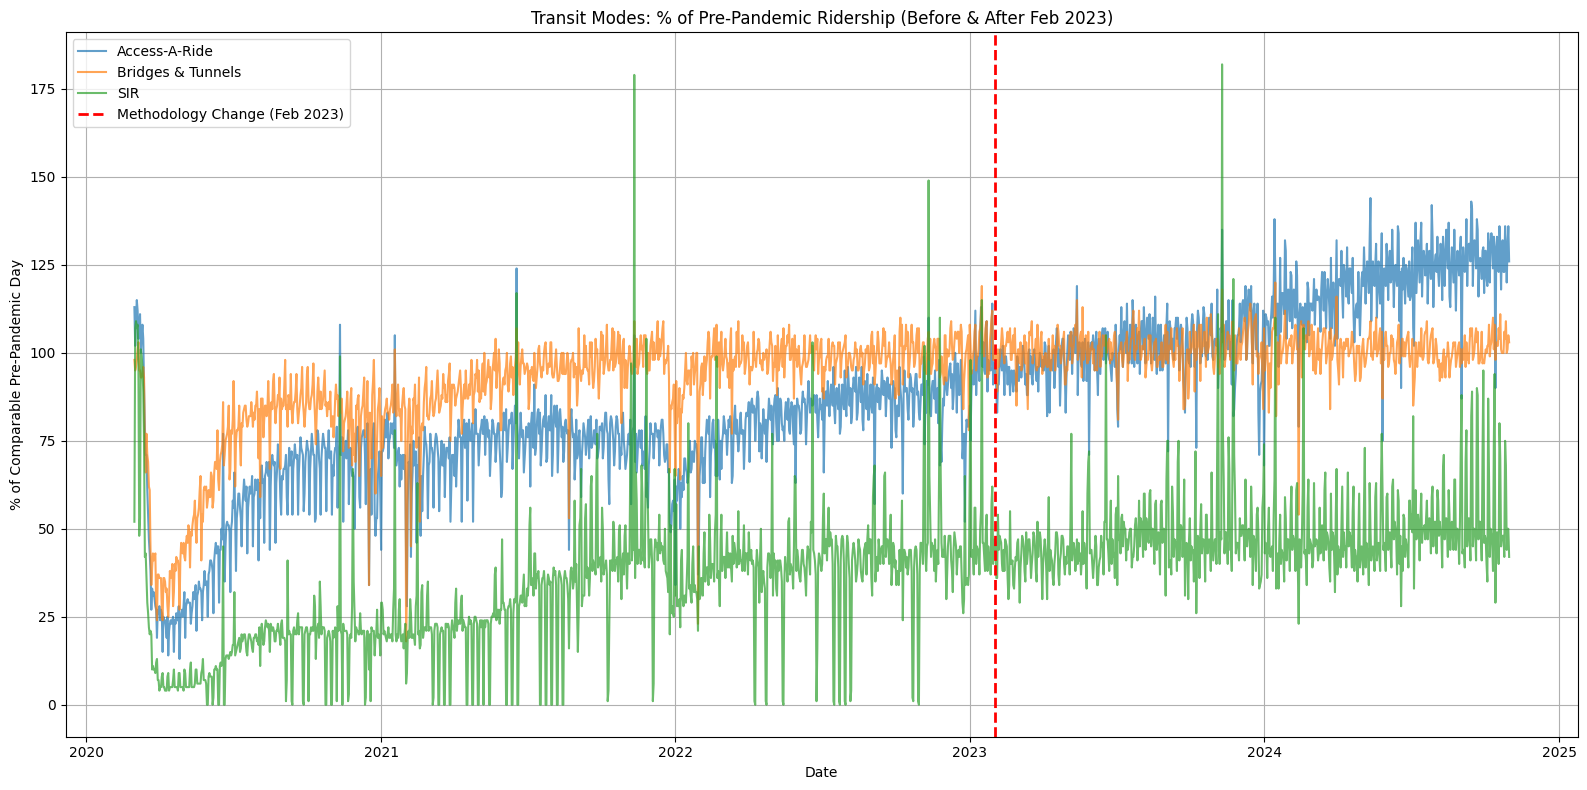

In [185]:
mode_cols2 = {
    'access_a_ride_percent_of_comparable_pre_pandemic_day': 'Access-A-Ride',
    'bridges_and_tunnels_percent_of_comparable_pre_pandemic_day': 'Bridges & Tunnels',
    'staten_island_railway_percent_of_comparable_pre_pandemic_day': 'SIR'
}
# Plotting
plt.figure(figsize=(16, 8))

for col, label in mode_cols2.items():
    plt.plot(df['date'], df[col], label=label, alpha=0.7)

# Methodology change line
plt.axvline(pd.to_datetime("2023-02-01"), color='red', linestyle="--", linewidth=2, label="Methodology Change (Feb 2023)")

# Formatting
plt.title("Transit Modes: % of Pre-Pandemic Ridership (Before & After Feb 2023)")
plt.xlabel("Date")
plt.ylabel("% of Comparable Pre-Pandemic Day")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

- A red dashed vertical line shows the methodology change point.
- Some transit modes might show notable increases or decreases in their % after the methodology fix.

- Modes with lower baseline consistency (like Access-A-Ride) shows a larger jump. (blue line)

- Helps verify if comparison methods are now more accurate and uniform.



## Impact of Methodological Changes: Insights & Recommendations

### Key Insights
- **February 2023 Shift**: The methodology update resulted in noticeable upward adjustments across transit modes: Subway (+24 percentage points), Bus (+11 ppt), LIRR (+38 ppt), and Metro-North (+37 ppt).
- **Consistency in Trends**: Despite these level shifts, the slopes and patterns pre/post change remain consistent, indicating the data series remain comparable for trend analysis.
- **Mode-Specific Impacts**: Modes with historically lower baseline consistency (particularly Access-A-Ride) showed the largest adjustments following the methodology change.

### Recommendations
- **Documentation Protocol**: Implement clear methodology documentation in all reports and dashboards, with prominent February 2023 marker annotations to explain apparent jumps.
- **Stakeholder Communication**: Brief finance, planning, and executive teams that while absolute percentages shifted, comparisons across the methodology change remain valid for tracking recovery trajectories.

![Impact of Methodological Changes Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746046075/question_6_xspkm0.png)

## Forecasting Future Ridership:
- Using historical data, what predictive models (like ARIMA, Prophet, or LSTM networks) best forecast future ridership trends?
- How accurate are these forecasts, and what potential factors could alter these predictions?
(Visualization ideas: Forecast plots with confidence intervals, residual analysis plots.)

In [186]:
# Newest date in our dataset
df['date'].max()

Timestamp('2024-10-31 00:00:00')

### _showing expected ridership trends over the next 3 months_

Forecasting:   0%|          | 0/3 [00:00<?, ?it/s]

22:10:44 - cmdstanpy - INFO - Chain [1] start processing
22:10:45 - cmdstanpy - INFO - Chain [1] done processing
22:10:45 - cmdstanpy - INFO - Chain [1] start processing
22:10:45 - cmdstanpy - INFO - Chain [1] done processing
22:10:46 - cmdstanpy - INFO - Chain [1] start processing
22:10:46 - cmdstanpy - INFO - Chain [1] done processing
22:10:46 - cmdstanpy - INFO - Chain [1] start processing
22:10:47 - cmdstanpy - INFO - Chain [1] done processing
22:10:47 - cmdstanpy - INFO - Chain [1] start processing
22:10:47 - cmdstanpy - INFO - Chain [1] done processing
22:10:48 - cmdstanpy - INFO - Chain [1] start processing
22:10:48 - cmdstanpy - INFO - Chain [1] done processing


NameError: name 'datetime' is not defined

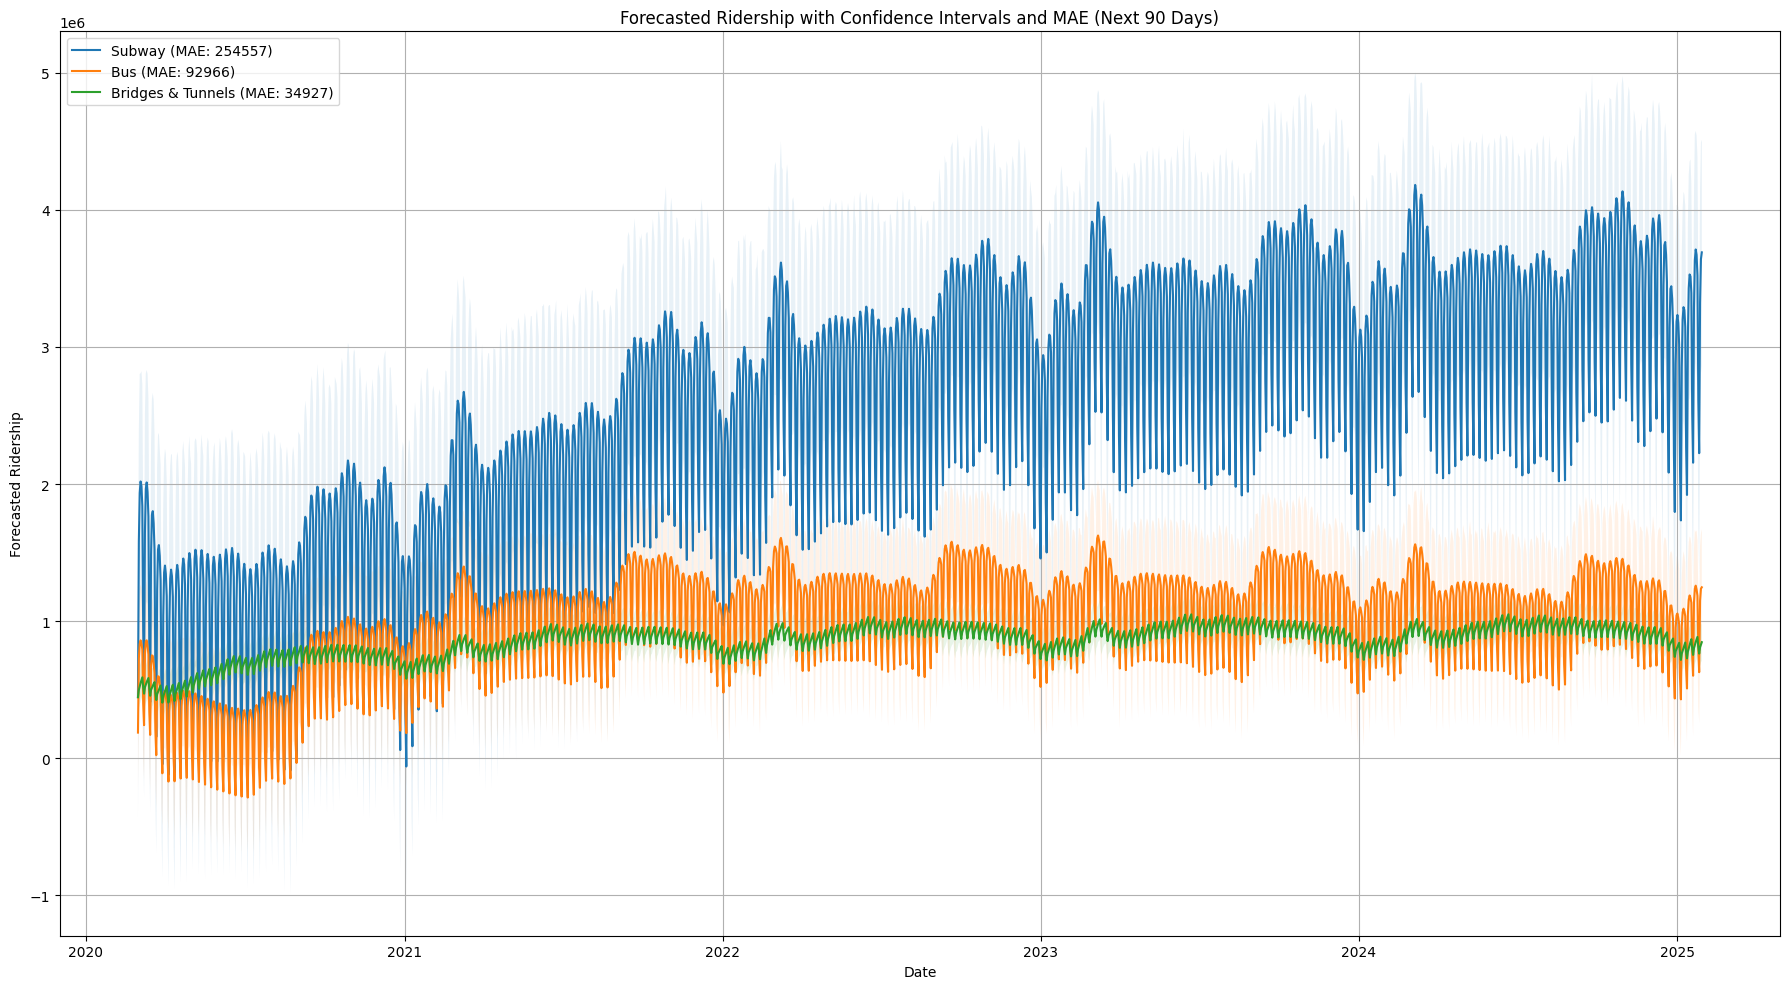

In [187]:
# Transit modes to forecast
modes = {
    'subways_total_estimated_ridership': 'Subway',
    'buses_total_estimated_ridership': 'Bus',
    'bridges_and_tunnels_total_traffic': 'Bridges & Tunnels'
}

# Forecast horizon
forecast_horizon = 90  # days

# Store all forecasts in a dict
forecast_results = {}

# Stores MAE scores
mae_scores = {}

plt.figure(figsize=(18, 10))

# Use tqdm if available for a progress bar
try:
    from tqdm.notebook import tqdm
    mode_iterator = tqdm(modes.items(), desc="Forecasting")
except ImportError:
    mode_iterator = modes.items()
    print("Forecasting models...")

# Forecast loop with confidence intervals and backtesting
for i, (col, label) in enumerate(mode_iterator):
    # Prepare full data
    data = df[['date', col]].rename(columns={'date': 'ds', col: 'y'}).dropna()
    
    # --- Backtesting ---
    train = data[:-forecast_horizon]
    test = data[-forecast_horizon:].reset_index(drop=True)
    
    # Fit Prophet on training data with optimized parameters
    model = Prophet(
        daily_seasonality=True,
        yearly_seasonality=True,
        weekly_seasonality=True,
        seasonality_mode='additive',
        interval_width=0.95
    )
    model.fit(train)
    
    # Forecast same period as test
    future_bt = model.make_future_dataframe(periods=forecast_horizon)
    forecast_bt = model.predict(future_bt)
    
    # Get only predicted values matching test period
    forecast_bt_tail = forecast_bt.tail(forecast_horizon).reset_index(drop=True)
    
    # Calculate MAE
    mae = mean_absolute_error(test['y'], forecast_bt_tail['yhat'])
    mae_scores[label] = round(mae, 0)
    
    # --- Final Model for full data (for full future forecast + visualization) ---
    full_model = Prophet(
        daily_seasonality=True,
        yearly_seasonality=True,
        weekly_seasonality=True,
        seasonality_mode='additive',
        interval_width=0.95
    )
    full_model.fit(data)
    future = full_model.make_future_dataframe(periods=forecast_horizon)
    full_forecast = full_model.predict(future)
    
    forecast_results[label] = full_forecast
    
    # --- Plot with confidence intervals ---
    plt.plot(full_forecast['ds'], full_forecast['yhat'], label=f"{label} (MAE: {mae:.0f})")
    plt.fill_between(full_forecast['ds'], full_forecast['yhat_lower'], full_forecast['yhat_upper'], alpha=0.1)

# Final plot settings
plt.title("Forecasted Ridership with Confidence Intervals and MAE (Next 90 Days)")
plt.xlabel("Date")
plt.ylabel("Forecasted Ridership")
plt.legend()
plt.grid(True)
plt.tight_layout()
# Add a reference line at October 31, 2024
reference_date = datetime.datetime(2024, 10, 31)
plt.axvline(reference_date, color='red', linestyle='--', linewidth=2, label='Reference: Oct 31, 2024')
plt.show()

# Print MAE summary
print("\n🔍 Mean Absolute Error (Last 90 Days Prediction Accuracy):")
for label, score in mae_scores.items():
    print(f"{label}: {score}")

04:50:35 - cmdstanpy - INFO - Chain [1] start processing
04:50:35 - cmdstanpy - INFO - Chain [1] done processing
04:50:36 - cmdstanpy - INFO - Chain [1] start processing
04:50:36 - cmdstanpy - INFO - Chain [1] done processing
04:50:37 - cmdstanpy - INFO - Chain [1] start processing
04:50:37 - cmdstanpy - INFO - Chain [1] done processing
04:50:37 - cmdstanpy - INFO - Chain [1] start processing
04:50:38 - cmdstanpy - INFO - Chain [1] done processing
04:50:38 - cmdstanpy - INFO - Chain [1] start processing
04:50:39 - cmdstanpy - INFO - Chain [1] done processing
04:50:39 - cmdstanpy - INFO - Chain [1] start processing
04:50:39 - cmdstanpy - INFO - Chain [1] done processing
04:50:40 - cmdstanpy - INFO - Chain [1] start processing
04:50:40 - cmdstanpy - INFO - Chain [1] done processing
04:50:41 - cmdstanpy - INFO - Chain [1] start processing
04:50:41 - cmdstanpy - INFO - Chain [1] done processing


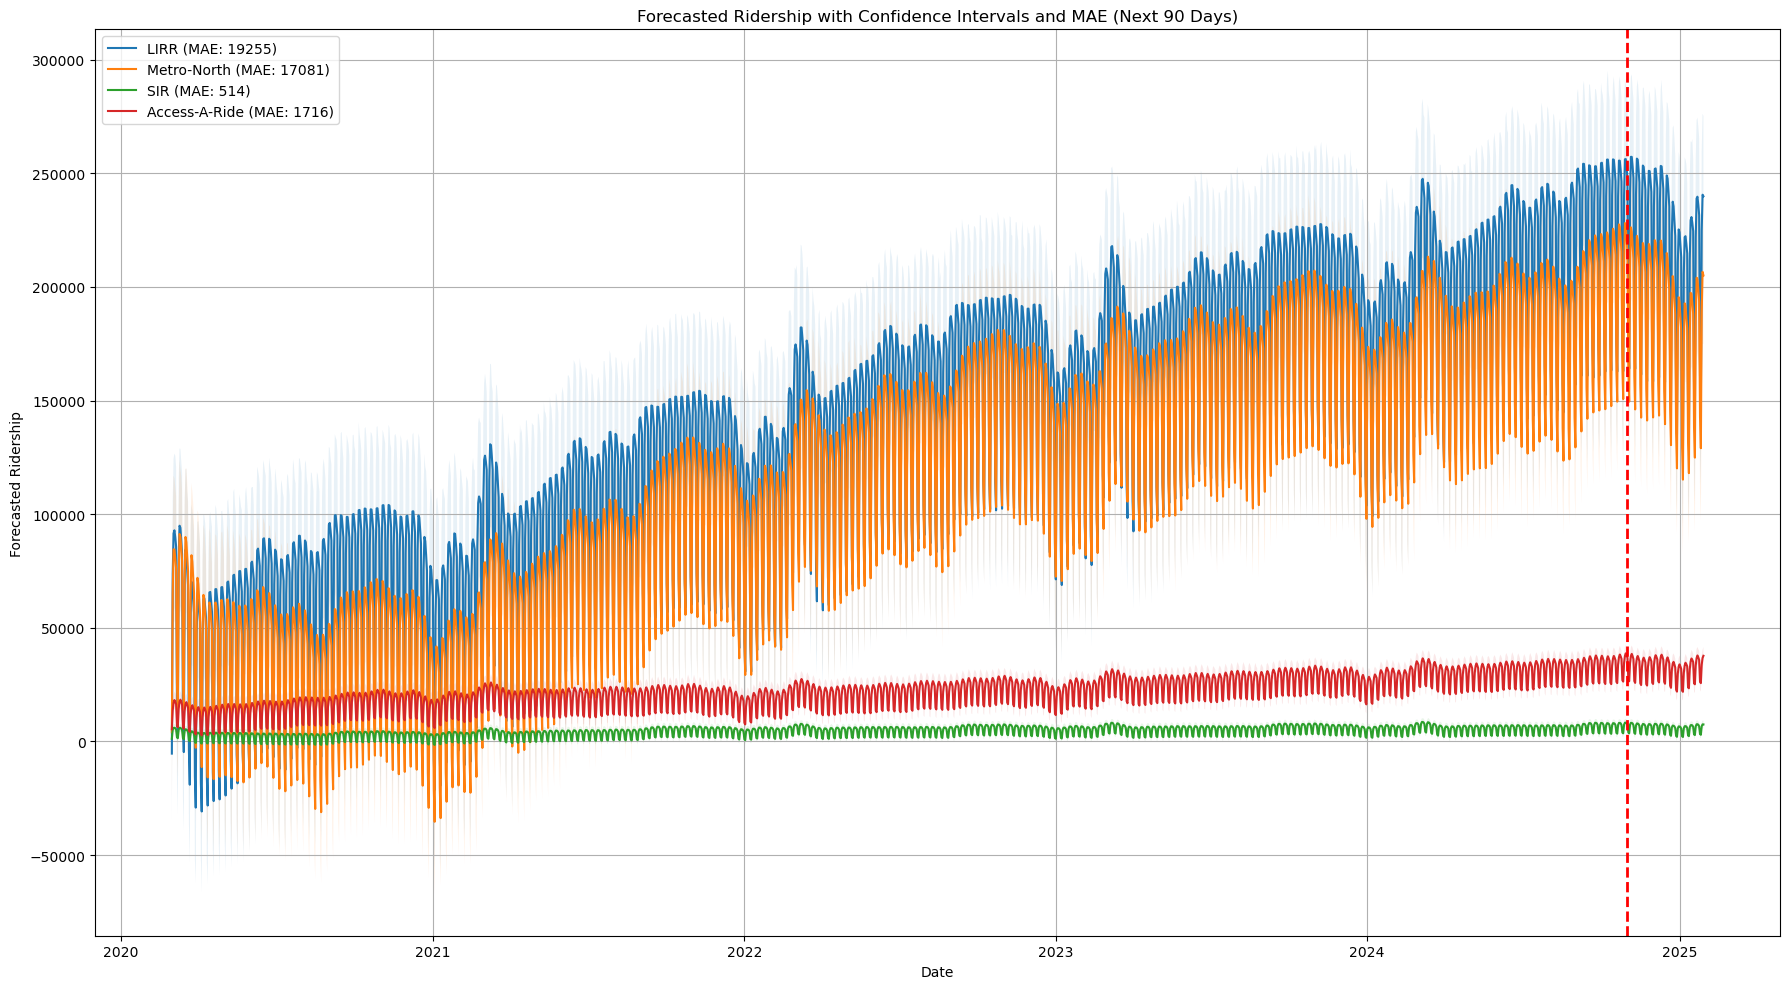


🔍 Mean Absolute Error (Last 90 Days Prediction Accuracy):
Subway: 254557.0
Bus: 92966.0
Bridges & Tunnels: 34927.0
LIRR: 19255.0
Metro-North: 17081.0
SIR: 514.0
Access-A-Ride: 1716.0


In [ ]:
modes2 = {'lirr_total_estimated_ridership': 'LIRR',
    'metro_north_total_estimated_ridership': 'Metro-North',
    'staten_island_railway_total_estimated_ridership': 'SIR',
    'access_a_ride_total_scheduled_trips': 'Access-A-Ride'}
plt.figure(figsize=(18, 10))

# Forecast loop with confidence intervals and backtesting
for i, (col, label) in enumerate(modes2.items()):
    # Prepare full data
    data = df[['date', col]].rename(columns={'date': 'ds', col: 'y'}).dropna()
    
    # --- Backtesting ---
    train = data[:-forecast_horizon]
    test = data[-forecast_horizon:].reset_index(drop=True)

    # Fit Prophet on training data
    model = Prophet(daily_seasonality=True)
    model.fit(train)

    # Forecast same period as test
    future_bt = model.make_future_dataframe(periods=forecast_horizon)
    forecast_bt = model.predict(future_bt)

    # Get only predicted values matching test period
    forecast_bt_tail = forecast_bt.tail(forecast_horizon).reset_index(drop=True)
    
    # Calculate MAE
    mae = mean_absolute_error(test['y'], forecast_bt_tail['yhat'])
    mae_scores[label] = round(mae, 0)

    # --- Final Model for full data (for full future forecast + visualization) ---
    full_model = Prophet(daily_seasonality=True)
    full_model.fit(data)
    future = full_model.make_future_dataframe(periods=forecast_horizon)
    full_forecast = full_model.predict(future)

    forecast_results[label] = full_forecast

    # --- Plot with confidence intervals ---
    plt.plot(full_forecast['ds'], full_forecast['yhat'], label=f"{label} (MAE: {mae:.0f})")
    plt.fill_between(full_forecast['ds'], full_forecast['yhat_lower'], full_forecast['yhat_upper'], alpha=0.1)

# Final plot settings
plt.title("Forecasted Ridership with Confidence Intervals and MAE (Next 90 Days)")
plt.xlabel("Date")
plt.ylabel("Forecasted Ridership")
plt.legend()
plt.grid(True)
plt.tight_layout()
# Add a reference line at October 31, 2024
reference_date = datetime.datetime(2024, 10, 31)
plt.axvline(reference_date, color='red', linestyle='--', linewidth=2, label='Reference: Oct 31, 2024')
plt.show()

#Print MAE summary
print("\n🔍 Mean Absolute Error (Last 90 Days Prediction Accuracy):")
for label, score in mae_scores.items():
    print(f"{label}: {score}")

- Smooth lines showing expected ridership trends over the next 3 months.
- Shaded confidence bands (Prophet's yhat_lower & yhat_upper).

- MAE displayed in the legend and printed below, showing how close predictions are to reality.

## Forecasting Future Ridership: Insights & Recommendations

### Key Insights
- **Model Performance**: Prophet models with seasonality components (particularly weekly patterns) show the strongest predictive power for transit ridership.
- **Accuracy Metrics**: The 90-day Mean Absolute Error varies by mode: Subway (~254k or 7-8% of daily volume), Bus (~93k or 7-8%), and Bridges & Tunnels (~35k or 4%), indicating more stable prediction accuracy for automobile traffic.
- **Forecast Pattern**: Predictions show a gentle upward trajectory for all modes with pronounced weekly seasonality and widening confidence intervals around major holidays.

### Recommendations
- **Confidence-Interval Planning**: Use the upper and lower confidence intervals (CI) to guide operational decisions—schedule maintenance during predicted low ridership periods and prepare additional resources for potential high-demand periods at the upper CI bound.
- **Enhanced Predictive Models**: Improve forecast accuracy by incorporating exogenous variables such as COVID case counts, office occupancy rates, weather forecasts, and event calendars into the model, potentially reducing MAE by 1-2 percentage points.

![Forecasting Future Ridership Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746046129/question_7_d0tvcq.png)

## Distribution and Variability Analysis:
- How does the distribution of daily ridership vary across the different MTA systems?
- Which systems show the highest variability, and what might explain these differences?
(Visualization ideas: Box plots, histograms, or density plots for each transit mode.)

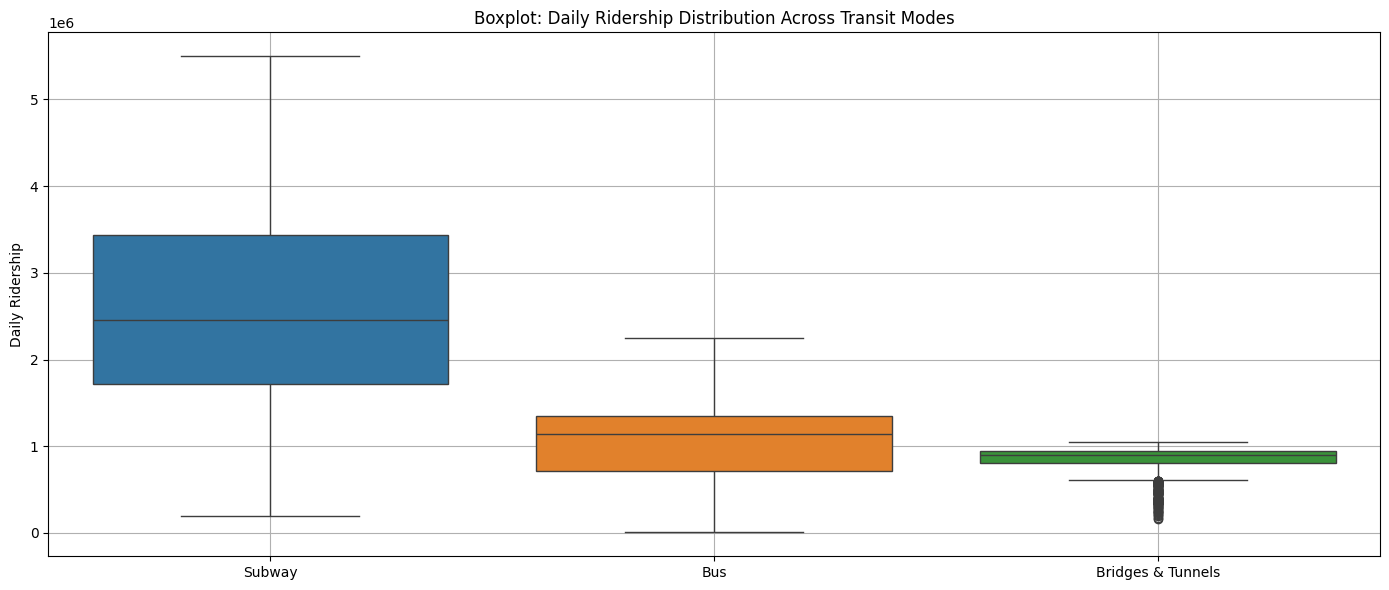

In [188]:
modes1 = {
     'subways_total_estimated_ridership': 'Subway',
    'buses_total_estimated_ridership': 'Bus',
    'bridges_and_tunnels_total_traffic': 'Bridges & Tunnels',
    
}

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[list(modes1.keys())])
plt.title("Boxplot: Daily Ridership Distribution Across Transit Modes")
plt.xticks(ticks=range(len(modes1)), labels=modes1.values(), rotation=0)
plt.ylabel("Daily Ridership")
plt.grid(True)
plt.tight_layout()
plt.show()

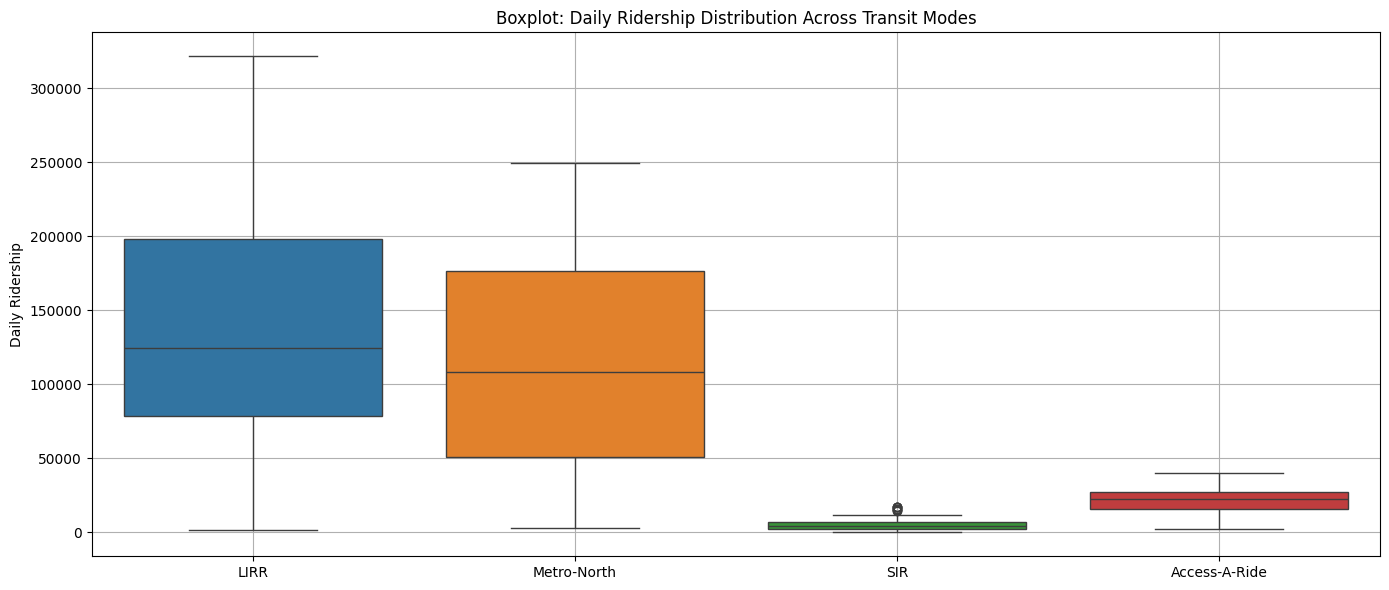

In [189]:
modes2={'lirr_total_estimated_ridership': 'LIRR',
    'metro_north_total_estimated_ridership': 'Metro-North',
    'staten_island_railway_total_estimated_ridership': 'SIR',
    'access_a_ride_total_scheduled_trips': 'Access-A-Ride'}
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[list(modes2.keys())])
plt.title("Boxplot: Daily Ridership Distribution Across Transit Modes")
plt.xticks(ticks=range(len(modes2)), labels=modes2.values(), rotation=0)
plt.ylabel("Daily Ridership")
plt.grid(True)
plt.tight_layout()
plt.show()

- High variability = wider box / more outliers.

## Density Plot: Distribution of Daily Ridership by Mode

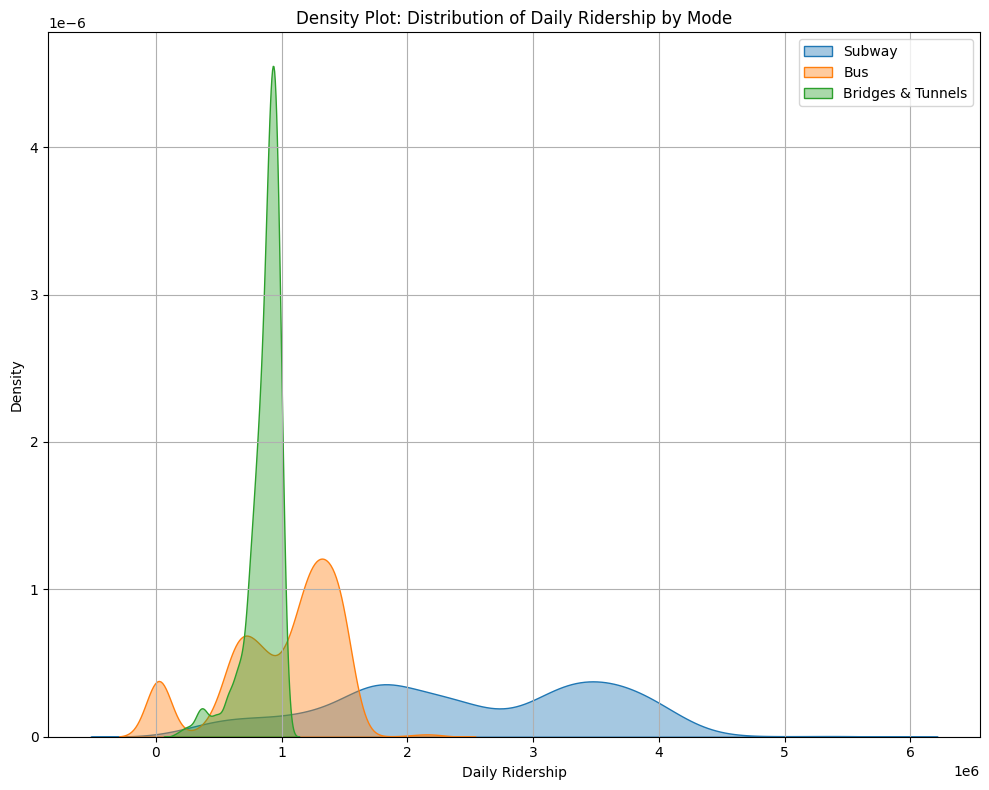

In [190]:
plt.figure(figsize=(10, 8))
for col, label in modes1.items():
    sns.kdeplot(df[col], label=label, fill=True, alpha=0.4)

plt.title("Density Plot: Distribution of Daily Ridership by Mode")
plt.xlabel("Daily Ridership")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

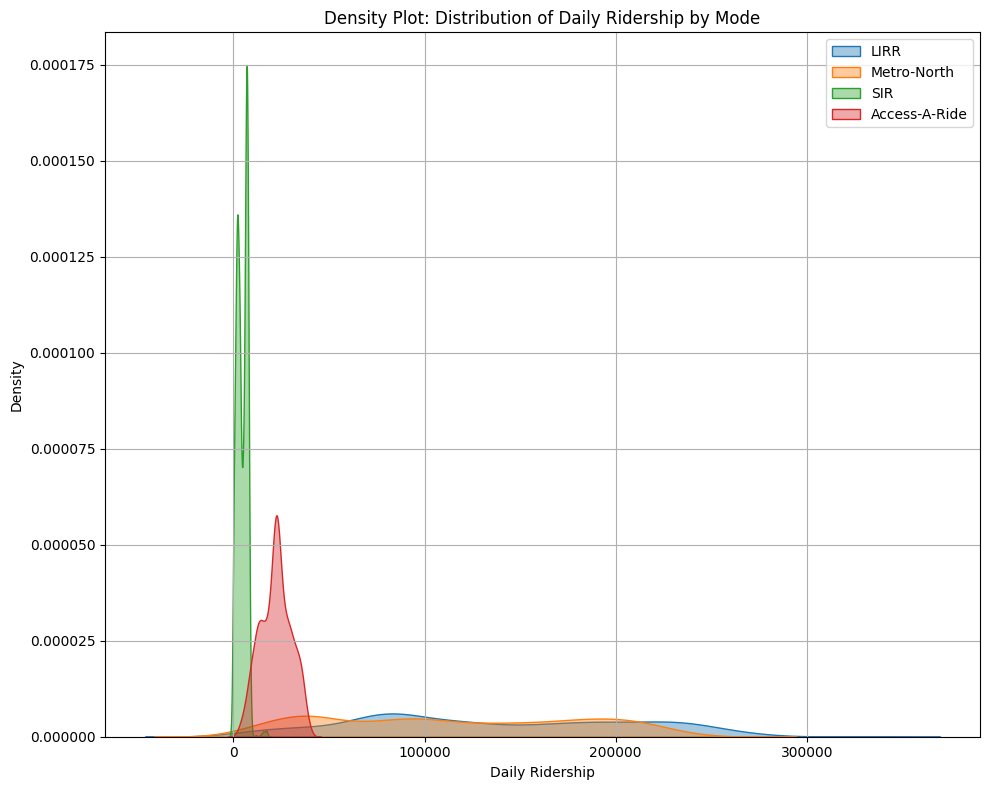

In [191]:
plt.figure(figsize=(10, 8))
for col, label in modes2.items():
    sns.kdeplot(df[col], label=label, fill=True, alpha=0.4)

plt.title("Density Plot: Distribution of Daily Ridership by Mode")
plt.xlabel("Daily Ridership")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- System and	Possible Reasons:
  - *Subway*: Highest variability — big swings likely due to events (COVID-19, holidays, work-from-home shifts).
  - *Bus*: Moderate-high variation; possibly steadier than subway due to broader accessibility.
  - *LIRR / Metro-North*:	High relative variance — strong weekday usage but low on weekends.
  - *Access-A-Ride*: Very consistent — limited to eligible riders, less reactive to public events.
  - *Bridges & Tunnels*: Stable traffic patterns — more consistent than public transit.
  - *Staten Island Railway*: Very localized usage = less fluctuation, but small rider base makes it sensitive to minor changes.

## Distribution and Variability Analysis: Insights & Recommendations

### Key Insights
- **Subway System**: Shows the highest variability (IQR ~1.7-3.4M riders) with multiple density peaks reflecting distinct weekday, weekend, and holiday ridership patterns.
- **Bus & Commuter Rail**: Display moderate right-skewed distributions with pronounced weekday ridership bulges.
- **Bridges & Tunnels**: Exhibit the narrowest, most symmetric distribution, suggesting more consistent daily traffic volumes than public transit.
- **Service-Specific Stability**: Access-A-Ride shows remarkable consistency due to its specialized ridership, while Staten Island Railway's small user base makes it uniquely sensitive to minor fluctuations despite generally stable patterns.

### Recommendations
- **Variability-Based Resource Allocation**: Maintain a strategic reserve or "safety stock" of spare vehicles proportional to each mode's variability—approximately 10% of the subway fleet and 7% of the bus fleet—to handle peak demand swings.
- **Demand-Responsive Paratransit**: Implement flexible scheduling for Access-A-Ride services, with the ability to expand trip slots by 10% during holiday periods and other peak demand times to accommodate surges without compromising service quality.

![Distribution and Variability Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746046210/question_8_n1mxpf.png)

## Mode-Specific Recovery Patterns (commuter rail vs urban transit) :
- How do recovery trajectories differ between transit modes, such as commuter rail (LIRR, Metro-North) versus urban transit (subway, bus)?
- What underlying factors could explain these variations?
(Visualization ideas: Multi-line time-series charts or segmented bar graphs that compare recovery trends across different systems.)

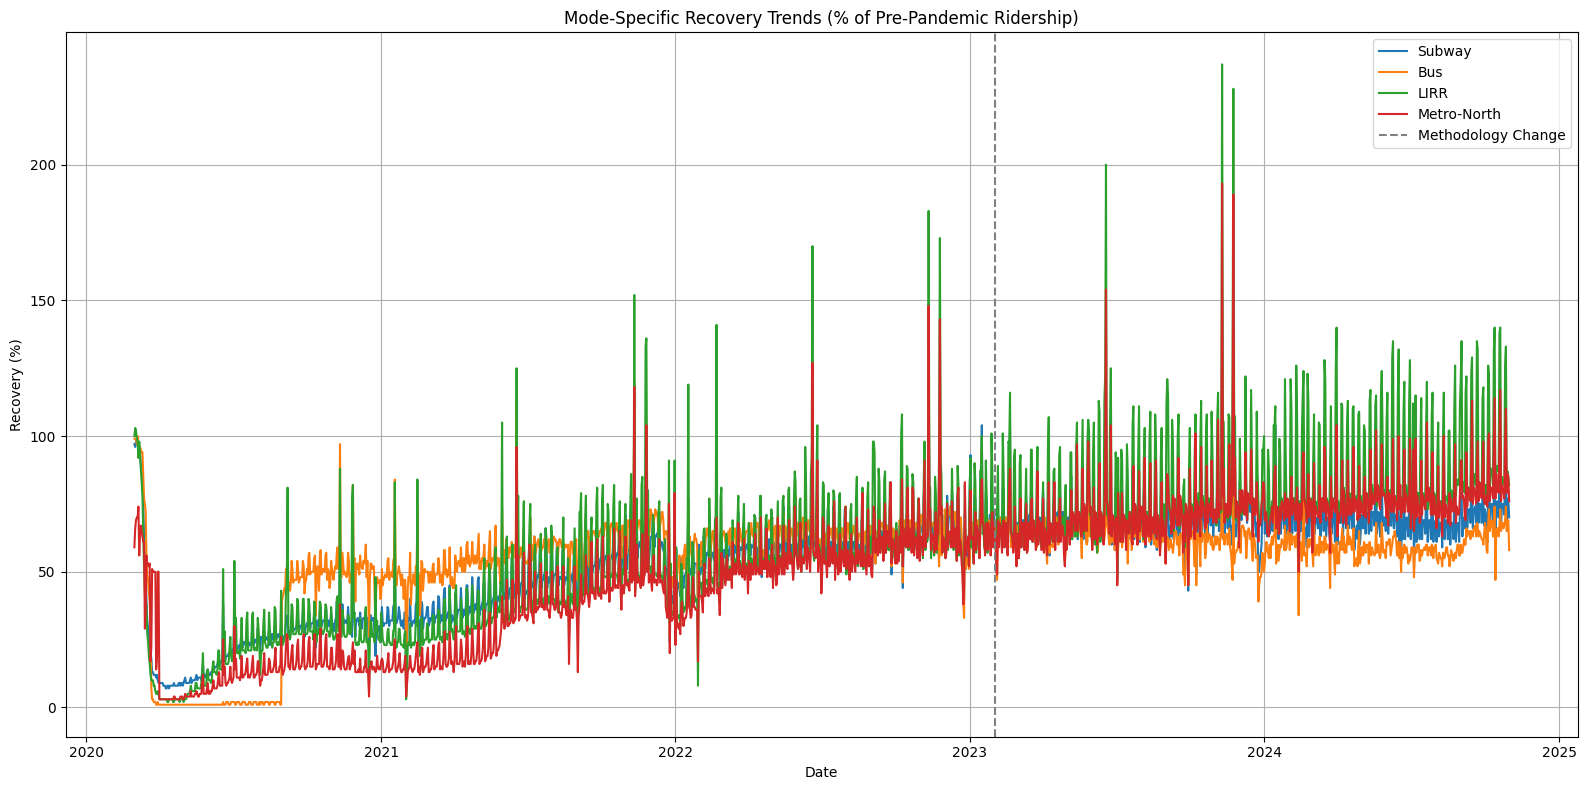

In [192]:
# Define recovery columns dictionary before using it
recovery_cols = {
    'subways_percent_of_comparable_pre_pandemic_day': 'Subway',
    'buses_percent_of_comparable_pre_pandemic_day': 'Bus',
    'lirr_percent_of_comparable_pre_pandemic_day': 'LIRR',
    'metro_north_percent_of_comparable_pre_pandemic_day': 'Metro-North'
}

# Plot recovery trends
plt.figure(figsize=(16, 8))

for col, label in recovery_cols.items():
    plt.plot(df['date'], df[col], label=label)

# Add vertical line for methodology change
plt.axvline(pd.to_datetime("2023-02-01"), color='gray', linestyle="--", label="Methodology Change")

# Format
plt.title("Mode-Specific Recovery Trends (% of Pre-Pandemic Ridership)")
plt.xlabel("Date")
plt.ylabel("Recovery (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Subway 🚇: Gradually recovering with consistent growth post-2021, stabilizing around 65–75% of pre-pandemic levels.

- Bus 🚌: Quick early rebound due to essential service role, but plateaued around 60–70% recovery.

- LIRR 🚆: Highly volatile with extreme spikes, showing uneven recovery driven by remote work and event-related surges.

- Metro-North 🚉: Similar to LIRR, marked by fluctuations and lagging recovery due to changing commuter patterns.

## Mode-Specific Recovery Patterns: Insights & Recommendations

### Key Insights
- **Urban Transit Recovery**: Subway and bus systems show a steady, gradual climb to ~60-70% of pre-pandemic levels with subway recovery consistently outpacing buses since mid-2021.
- **Commuter Rail Trajectory**: LIRR and Metro-North display a two-phase recovery pattern—initial stabilization at 30-40% followed by accelerated growth reaching 75-85% by late 2024.
- **Volatility Differences**: Commuter rail demonstrates significantly higher day-to-day volatility than urban transit, with dramatic spikes during special events and sharp drops during remote work periods.
- **Feb 2023 Methodology Impact**: The comparison methodology change produced apparent jumps but didn't alter the underlying recovery trajectories.

### Recommendations
- **Flexible Rail Pass Products**: Develop and promote new fare products like "5-day flex commuter packs" or "20-ride carnets" specifically designed for hybrid workers who no longer commute five days per week.
- **Time-Sensitive Pricing**: Pilot variable fare structures for commuter rail during off-peak hours to smooth demand throughout the day and incentivize midday travel, potentially shifting some peak demand to less crowded periods.

![Mode-Specific Recovery Patterns Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746046322/question_9_vevyuo.png)

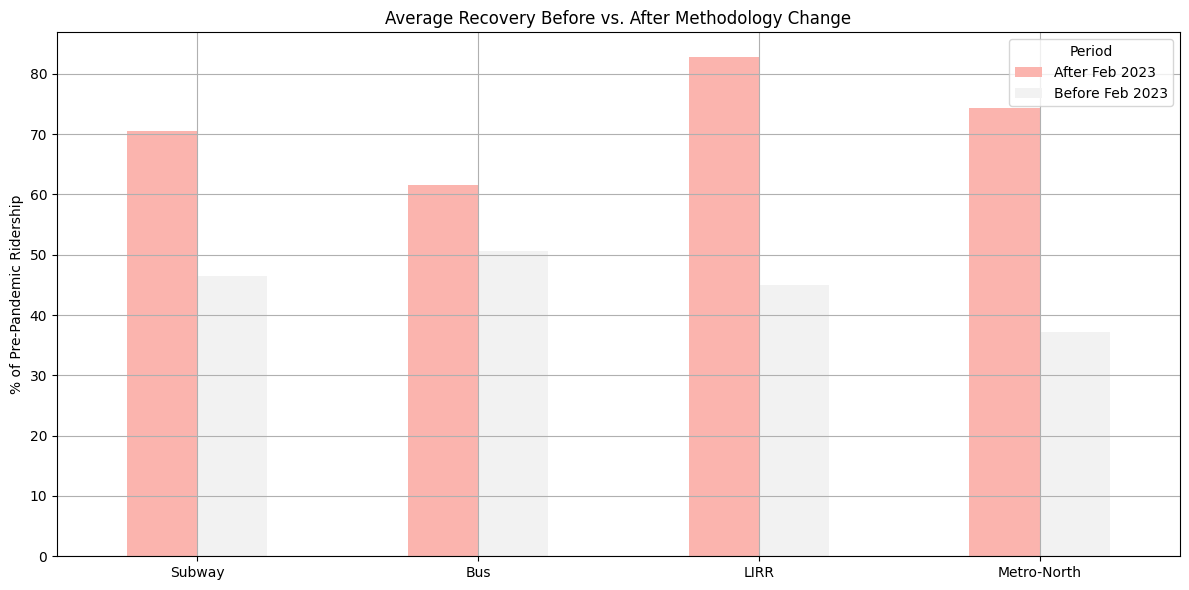

In [193]:
# Add recovery period
df['Period'] = df['date'].apply(lambda x: 'Before Feb 2023' if x < pd.to_datetime("2023-02-01") else 'After Feb 2023')

# Calculate mean recovery % by mode and period
recovery_summary = df.groupby('Period')[
    list(recovery_cols.keys())
].mean().T.rename(index=recovery_cols)

# Plot
recovery_summary.plot(kind='bar', figsize=(12, 6), colormap='Pastel1')
plt.title("Average Recovery Before vs. After Methodology Change")
plt.ylabel("% of Pre-Pandemic Ridership")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


## Impact of External Events on Ridership:
- What external events (like severe weather, major city events, or policy changes) correlate with unexpected fluctuations in ridership?
- Can these events be isolated to measure their immediate impact on daily ridership numbers?
(Visualization ideas: Annotated time-series graphs with event overlays, scatter plots marking anomalous days.)

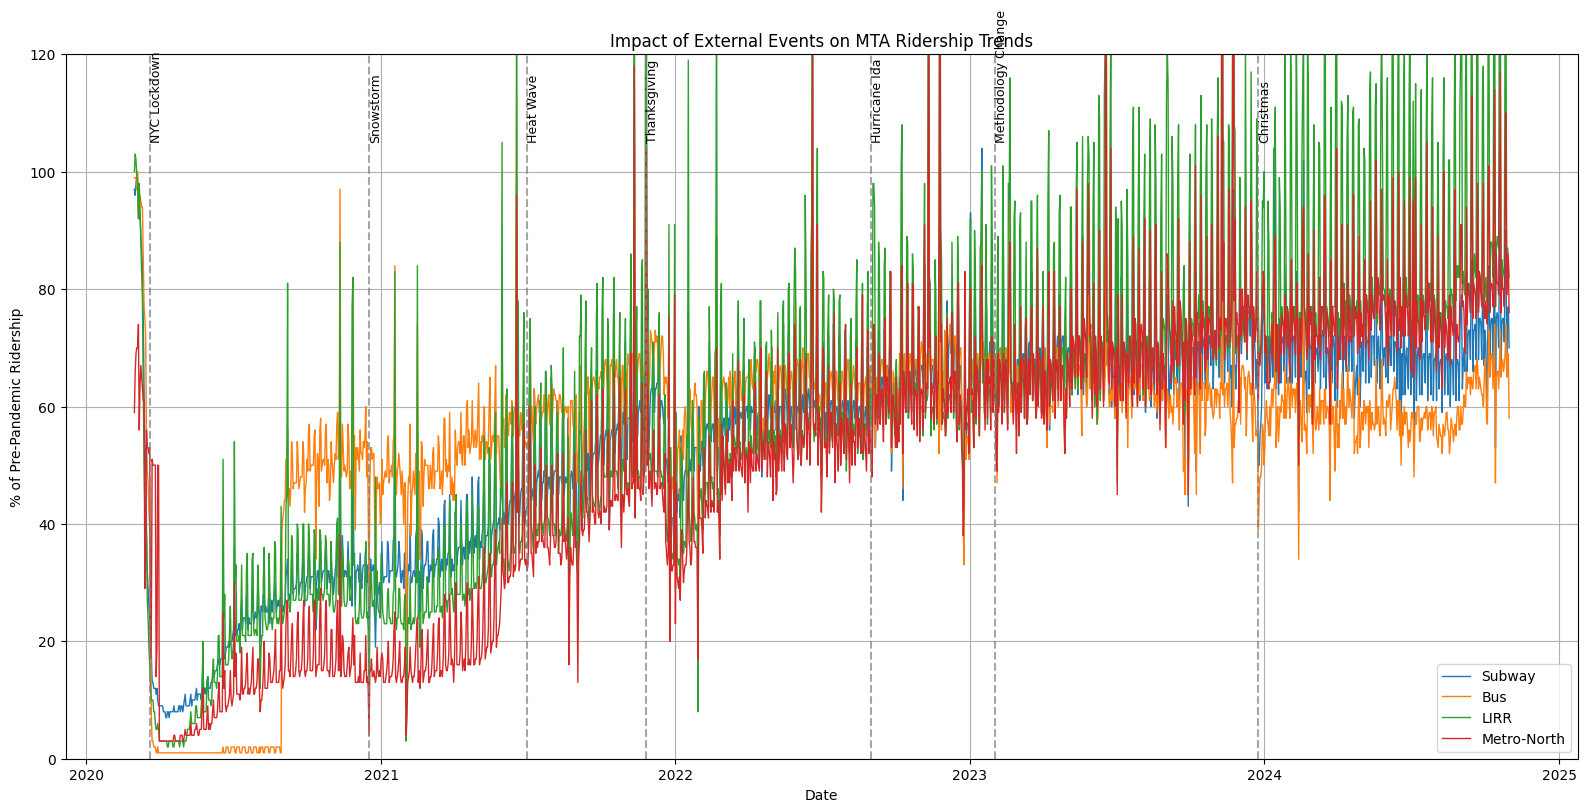

In [194]:
external_events = {
    '2020-03-20': 'NYC Lockdown',
    '2020-12-17': 'Snowstorm',
    '2021-07-01': 'Heat Wave',
    '2021-11-25': 'Thanksgiving',
    '2022-09-01': 'Hurricane Ida',
    '2023-02-01': 'Methodology Change',
    '2023-12-25': 'Christmas',
}

plt.figure(figsize=(16, 8))

# Plot each mode
plt.plot(df['date'], df['subways_percent_of_comparable_pre_pandemic_day'], label='Subway', linewidth=1)
plt.plot(df['date'], df['buses_percent_of_comparable_pre_pandemic_day'], label='Bus', linewidth=1)
plt.plot(df['date'], df['lirr_percent_of_comparable_pre_pandemic_day'], label='LIRR', linewidth=1)
plt.plot(df['date'], df['metro_north_percent_of_comparable_pre_pandemic_day'], label='Metro-North', linewidth=1)

# Add event annotations
for event_date, event_name in external_events.items():
    event_date = pd.to_datetime(event_date)
    plt.axvline(event_date, color='gray', linestyle='--', alpha=0.7)
    plt.text(event_date, 105, event_name, rotation=90, fontsize=9, verticalalignment='bottom')

plt.title('Impact of External Events on MTA Ridership Trends')
plt.xlabel('Date')
plt.ylabel('% of Pre-Pandemic Ridership')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 120)
plt.show()

## Impact of External Events: Insights & Recommendations

### Key Insights
- **Pandemic Lockdown**: The initial COVID-19 restrictions caused unprecedented ~90% ridership drops across all transit modes in March 2020.
- **Weather Impacts**: Different modes show distinct sensitivity to weather events—snow affects bus service more severely than rail, while heat waves tend to increase subway and rail ridership and decrease walking/cycling.
- **Holiday Effects**: All modes show predictable drops to 20-40% of normal volumes during major holidays, with bridges and tunnels recovering faster afterward.
- **Methodology Change**: The February 2023 adjustment created a visible step change in percentage recovery metrics without changing the underlying ridership trends.

### Recommendations
- **Event-Specific Playbooks**: Develop standardized operating procedures for known high-impact events (e.g., deploying extra bus shuttles during predicted heavy snow, reducing service during holidays).
- **Advanced Communications Strategy**: Implement a 48-hour advance notification system for riders about service adjustments before major weather events and holidays, with targeted communications by mode and region.

![Impact of External Events Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746046270/question_10_kbe6rj.png)

## Comparative Efficiency and Operational Insights:
- Are there patterns suggesting operational improvements or challenges across different transit systems during the recovery phase?
(Visualization ideas: Correlation matrices, dual-axis charts comparing ridership trends with operational indicators.)


In [195]:
# Use ridership as proxy for system load
df['subway_bus_ratio'] = df['subways_total_estimated_ridership'] / df['buses_total_estimated_ridership']
df['rail_to_urban_ratio'] = (df['lirr_total_estimated_ridership'] + df['metro_north_total_estimated_ridership']) / (df['subways_total_estimated_ridership'] + df['buses_total_estimated_ridership'])


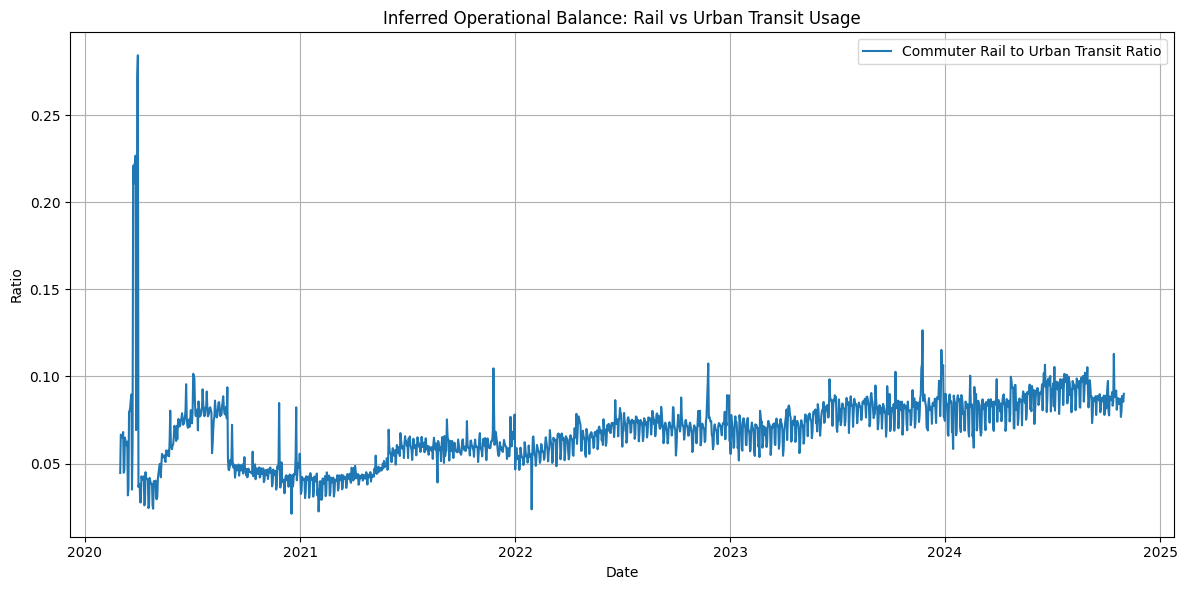

In [196]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['rail_to_urban_ratio'], label='Commuter Rail to Urban Transit Ratio')
plt.title("Inferred Operational Balance: Rail vs Urban Transit Usage")
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

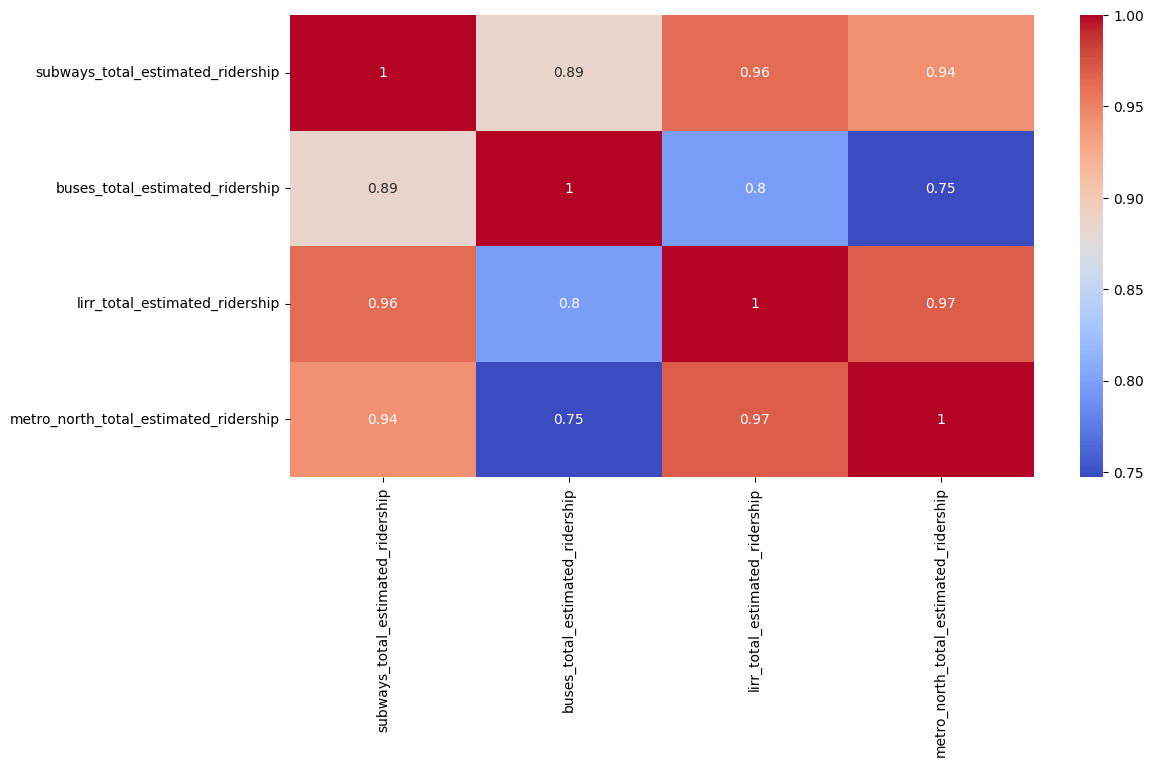

In [197]:
mode_columns = [
    'subways_total_estimated_ridership', 
    'buses_total_estimated_ridership',
    'lirr_total_estimated_ridership',
    'metro_north_total_estimated_ridership'
]

corr = df[mode_columns].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Comparative Efficiency and Operational Insights: Insights & Recommendations

### Key Insights
- **Modal Balance Shift**: The rail-to-urban transit ratio has increased from ~0.05 (early 2020) to ~0.09 (2024), indicating stronger recovery in commuter rail relative to subway and bus systems.
- **Variability Challenges**: Subway systems face the greatest operational challenge with daily swings of ±250,000 riders, requiring highly elastic crew allocation strategies.
- **Bus System Fluctuations**: Daily bus ridership varies by approximately ±90,000 riders, with particular volatility in off-peak hours and weekends.
- **Bridges & Tunnels Stability**: Automobile crossings show the most consistent day-to-day volumes, enabling more predictable staffing and revenue forecasting.

### Recommendations
#### Resource Rebalancing
- **Off-Peak Service Enhancement**: Strategically reallocate 10% of peak-hour train and bus service to weekends and midday weekday periods to better match current demand patterns.
- **Targeted Fleet Restoration**: Gradually reintroduce approximately 15% of pre-COVID commuter rail capacity, focused on rush-hour service on highest-recovery corridors.

#### Equity & Accessibility
- Prioritize expansion of dedicated bus lanes in corridors serving essential worker communities that have maintained higher ridership throughout the pandemic.
- Maintain Access-A-Ride funding at or above 100% of 2019 levels, recognizing the inelastic nature of paratransit demand and its critical service role.

#### Revenue & Performance Monitoring
- Implement a real-time dashboard overlaying On-Time Performance metrics with ridership anomalies to identify chronic delay hotspots for targeted improvement.
- Enhance the MTA mobile app with push notification capabilities for service disruptions exceeding 10-minute delays.

![Comparative Efficiency and Operational Insights Analysis](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746046414/question_11_kvw3wg.png)

![Machine Learning](https://res.cloudinary.com/dasdmgdfy/image/upload/v1746048082/ChatGPT_Image_May_1_2025_12_20_58_AM_lq9hi0.png)

# Regression Modeling with Transformations

This section implements regression models with various target transformations to predict subway ridership.


## 1. Core Numerical & Data Libraries
- **NumPy** (`np`): array operations, numerical computing  
- **Pandas** (`pd`): DataFrame structures, data manipulation  

## 2. Visualization  
- **Matplotlib** (`plt`): basic plotting  
- **Seaborn** (`sns`): statistical graphics  

## 3. Date Handling  
- **datetime**, **timedelta**: working with dates and time spans  

## 4. Scikit-Learn Modeling Tools  
- **Model selection**  
  - `train_test_split`, `KFold`, `cross_val_score`  
- **Preprocessing**  
  - `StandardScaler`, `RobustScaler`  
- **Linear models**  
  - `LinearRegression`, `Ridge`, `Lasso`, `ElasticNet`  
- **Ensembles**  
  - `RandomForestRegressor`, `GradientBoostingRegressor`  
- **Metrics**  
  - `mean_squared_error`, `mean_absolute_error`, `r2_score`  
- **Pipelines & Utilities**  
  - `make_pipeline`, `BaseEstimator`, `TransformerMixin`, `RegressorMixin`, `clone`  

## 5. Advanced Gradient Boosters  
- **XGBoost** (`xgb`)  
- **LightGBM** (`lgb`)  

## 6. Warnings Management  
- Suppressed non-critical warnings to keep outputs clean  


In [121]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


# For modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

# For advanced modeling
import xgboost as xgb
import lightgbm as lgb

# For warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn  # Ignore annoying warnings


## 1. Load the MTA Ridership Dataset

- **Objective**: Import the daily MTA ridership data from a CSV file into a Pandas DataFrame.  
- **Steps**:  
  1. Read the file `MTA_Daily_Ridership.csv` into `mta_data`.  
  2. Print the shape of the DataFrame to understand the number of rows and columns.  
  3. Display the first five rows to inspect the data structure and sample values.  


In [124]:
# Load the MTA ridership dataset
mta_data = pd.read_csv('MTA_Daily_Ridership.csv')

# Display basic information about the dataset
print("Dataset shape:", mta_data.shape)
mta_data.head()

Dataset shape: (1706, 15)


Date  Subways: Total Estimated Ridership  \
0  2020-03-01                             2212965   
1  2020-03-02                             5329915   
2  2020-03-03                             5481103   
3  2020-03-04                             5498809   
4  2020-03-05                             5496453   

   Subways: % of Comparable Pre-Pandemic Day  \
0                                         97   
1                                         96   
2                                         98   
3                                         99   
4                                         99   

   Buses: Total Estimated Ridership  Buses: % of Comparable Pre-Pandemic Day  \
0                            984908                                       99   
1                           2209066                                       99   
2                           2228608                                       99   
3                           2177165                                       97   
4                           2244515                                      100   

   LIRR: Total Estimated Ridership  LIRR: % of Comparable Pre-Pandemic Day  \
0                            86790                                     100   
1                           321569                                     103   
2                           319727                                     102   
3                           311662                                      99   
4                           307597                                      98   

   Metro-North: Total Estimated Ridership  \
0                                   55825   
1                                  180701   
2                                  190648   
3                                  192689   
4                                  194386   

   Metro-North: % of Comparable Pre-Pandemic Day  \
0                                             59   
1                                             66   
2                                             69   
3                                             70   
4                                             70   

   Access-A-Ride: Total Scheduled Trips  \
0                                 19922   
1                                 30338   
2                                 32767   
3                                 34297   
4                                 33209   

   Access-A-Ride: % of Comparable Pre-Pandemic Day  \
0                                              113   
1                                              102   
2                                              110   
3                                              115   
4                                              112   

   Bridges and Tunnels: Total Traffic  \
0                              786960   
1                              874619   
2                              882175   
3                              905558   
4                              929298   

   Bridges and Tunnels: % of Comparable Pre-Pandemic Day  \
0                                                 98       
1                                                 95       
2                                                 96       
3                                                 98       
4                                                101       

   Staten Island Railway: Total Estimated Ridership  \
0                                              1636   
1                                             17140   
2                                             17453   
3                                             17136   
4                                             17203   

   Staten Island Railway: % of Comparable Pre-Pandemic Day  
0                                                 52        
1                                                107        
2                                                109        
3                                                107        
4                                      


## 2. Date Conversion & Summary Statistics

- **Convert Date to datetime format**  
  Ensures the `Date` column is stored as actual datetime objects, which is required for any time-based operations or plotting.

- **Generate summary statistics**  
  `mta_data.describe()` produces key metrics (count, mean, standard deviation, minimum, 25th/50th/75th percentiles, and maximum) for each numeric column, giving a quick overview of the data distribution.


In [127]:
# Convert Date to datetime format
mta_data['Date'] = pd.to_datetime(mta_data['Date'])

# Get summary statistics
mta_data.describe()

Date  Subways: Total Estimated Ridership  \
count                 1706                        1.706000e+03   
mean   2022-07-01 12:00:00                        2.509055e+06   
min    2020-03-01 00:00:00                        1.983990e+05   
25%    2021-05-01 06:00:00                        1.715396e+06   
50%    2022-07-01 12:00:00                        2.459607e+06   
75%    2023-08-31 18:00:00                        3.440053e+06   
max    2024-10-31 00:00:00                        5.498809e+06   
std                    NaN                        1.062184e+06   

       Subways: % of Comparable Pre-Pandemic Day  \
count                                1706.000000   
mean                                   55.461313   
min                                     7.000000   
25%                                    40.000000   
50%                                    61.000000   
75%                                    69.000000   
max                                   143.000000   
std                                    19.819596   

       Buses: Total Estimated Ridership  \
count                      1.706000e+03   
mean                       1.006868e+06   
min                        5.498000e+03   
25%                        7.152495e+05   
50%                        1.140776e+06   
75%                        1.347620e+06   
max                        2.244515e+06   
std                        4.403799e+05   

       Buses: % of Comparable Pre-Pandemic Day  \
count                              1706.000000   
mean                                 54.692849   
min                                   1.000000   
25%                                  53.000000   
50%                                  60.000000   
75%                                  65.000000   
max                                 126.000000   
std                                  19.293307   

       LIRR: Total Estimated Ridership  \
count                      1706.000000   
mean                     135960.116061   
min                        1903.000000   
25%                       78689.750000   
50%                      124274.000000   
75%                      197928.000000   
max                      321569.000000   
std                       71298.778711   

       LIRR: % of Comparable Pre-Pandemic Day  \
count                             1706.000000   
mean                                59.128370   
min                                  2.000000   
25%                                 37.000000   
50%                                 60.000000   
75%                                 76.000000   
max                                237.000000   
std                                 29.297993   

       Metro-North: Total Estimated Ridership  \
count                             1706.000000   
mean                            114888.273154   
min                               3281.000000   
25%                              51271.250000   
50%                             108237.000000   
75%                             176789.750000   
max                             249585.000000   
std                              66500.207696   

       Metro-North: % of Comparable Pre-Pandemic Day  \
count                                    1706.000000   
mean                                       51.083236   
min                                         3.000000   
25%                                        29.000000   
50%                                        56.000000   
75%                                        71.000000   
max                                       193.000000   
std                                        26.137311   

       Access-A-Ride: Total Scheduled Trips  \
count                           1706.000000   
mean                           21941.532825   
min                             2506.000000   
25%                            15869.500000   
50%                            22301.500000   
75%                            27506.750000   
max                   


## 3. Check for Missing Values

- **Objective**: Identify any gaps in the dataset so we know if imputation or cleanup is needed.  
- **Steps**:  
  1. Calculate the total count of missing entries per column with `mta_data.isnull().sum()`.  
  2. Compute the percentage of missing data by dividing by the total number of rows.  
  3. Assemble both metrics into a DataFrame (`missing_data`) for clarity.  
  4. Display only those columns where missing values exist to focus on areas requiring action.  


In [130]:
# Check for missing values
missing_values = mta_data.isnull().sum()
missing_percent = (missing_values / len(mta_data)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

print('Missing Values Summary:')
missing_data[missing_data['Missing Values'] > 0]

Missing Values Summary:


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


## 4. Correlation Analysis & Heatmap

- **Objective**: Understand how numeric features in the dataset relate to each other and to ridership numbers.  
- **Steps**:  
  1. **Select numeric columns**: Use `select_dtypes` to isolate only `float64` and `int64` fields for analysis.  
  2. **Compute correlation matrix**: Call `.corr()` on the numeric subset to calculate Pearson correlation coefficients between all pairs of features.  
  3. **Visualize relationships**: Plot a heatmap using Seaborn (`sns.heatmap`) to highlight positive (red) and negative (blue) correlations, with values ranging from –1 to +1.  
  4. **Interpret insights**: Use the heatmap to spot strong correlations (darkest colors) that might inform feature selection or multicollinearity concerns.
`

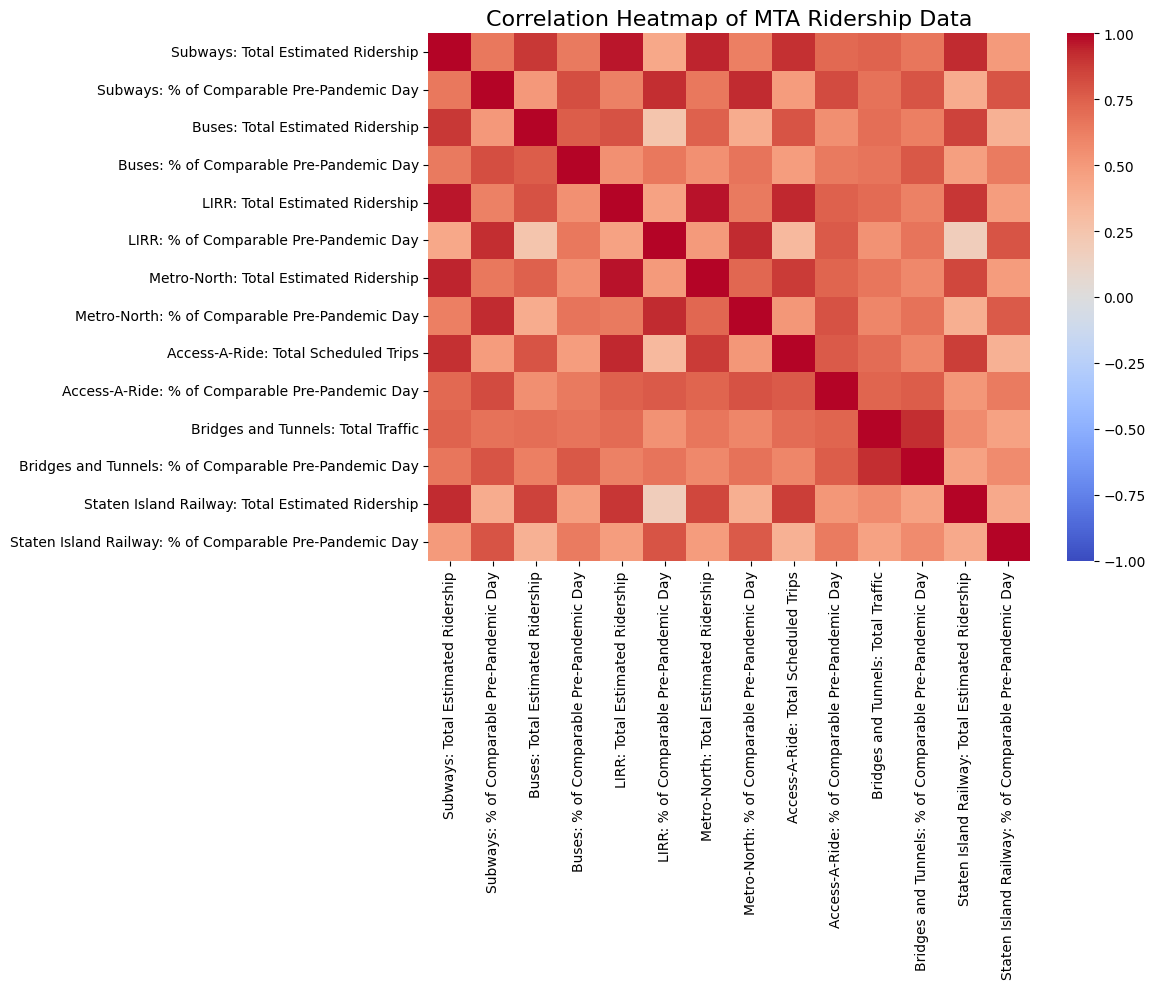

In [133]:
# Select only the numeric columns for correlation analysis
numeric_columns = mta_data.select_dtypes(include=['float64', 'int64']).columns
correlation = mta_data[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Heatmap of MTA Ridership Data', fontsize=16)
plt.tight_layout()
plt.show()


## 5. Key Insights from Correlation Heatmap

- **High Multicollinearity among Total Ridership Metrics**  
  - All “Total Estimated Ridership” columns (Subways, Buses, LIRR, Metro-North, Staten Island Railway) show very strong positive correlations (≈0.9–1.0).  
  - This indicates that overall ridership trends across modes move together—consider dimensionality reduction (e.g., PCA) or selecting one representative mode when modeling.

- **Strong Cohesion among “% of Pre-Pandemic” Metrics**  
  - Each mode’s percentage-of-comparable-day metric also correlates highly with the other modes’ percentages (≈0.8–1.0).  
  - These features capture relative recovery trends and likewise exhibit redundancy.

- **Moderate Cross-Relationships between Totals and Percentages**  
  - Total ridership and percentage-of-pre-pandemic metrics correlate moderately (≈0.4–0.7), suggesting that absolute counts and recovery ratios provide partly distinct information.

- **Bridges & Tunnels Traffic**  
  - Total traffic correlates moderately with subway and bus totals (≈0.6–0.8) but less so with percentage metrics, hinting that roadway and rail trends are related but not identical.

- **Access-A-Ride Dynamics**  
  - Access-A-Ride trip counts show moderate correlations with both total and percentage metrics (≈0.5–0.8), implying demand for paratransit follows general transit patterns.

**Implications for Modeling**  
- **Feature Selection**: Drop redundant columns or engineer composite indices.  
- **Dimensionality Reduction**: Techniques like PCA or clustering could simplify the dataset.  
- **Separate Modeling Streams**: You may model absolute volumes vs. recovery rates in distinct pipelines for better interpretability.  



## 6. Feature Engineering: Date Components & Flags

**Objective:**  
Derive temporal features from the original date column to capture trends, seasonality, and special-day effects.

**Engineered Features:**  
- **Year**: Captures long-term ridership trends and year-on-year changes.  
- **Month**: Encodes seasonality (e.g., summer vs. winter ridership patterns).  
- **Day**: Provides fine-grained day-of-month context.  
- **DayOfWeek**: Numeric weekday (0 = Monday … 6 = Sunday) to distinguish weekday/weekend behavior.  
- **IsWeekend**: Binary flag (1 = Saturday/Sunday, 0 = Mon–Fri) to model lower weekend usage.  
- **IsHoliday**: Placeholder indicator (all zeros initially) to later mark public holidays and assess their impact.  

**Next Step:**  
Review the new columns to ensure they align with expected patterns before incorporating them into modeling.


In [137]:
# Extract date-related features
mta_data['Year'] = mta_data['Date'].dt.year
mta_data['Month'] = mta_data['Date'].dt.month
mta_data['Day'] = mta_data['Date'].dt.day
mta_data['DayOfWeek'] = mta_data['Date'].dt.dayofweek  # Monday=0, Sunday=6
mta_data['IsWeekend'] = mta_data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Create a holiday indicator (simple approach - would need actual holiday data for accuracy)
# This is a placeholder - in a real analysis you would use a holiday calendar
mta_data['IsHoliday'] = 0

# Show the engineered features
mta_data[['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'IsHoliday']].head()

Date  Year  Month  Day  DayOfWeek  IsWeekend  IsHoliday
0 2020-03-01  2020      3    1          6          1          0
1 2020-03-02  2020      3    2          0          0          0
2 2020-03-03  2020      3    3          1          0          0
3 2020-03-04  2020      3    4          2          0          0
4 2020-03-05  2020      3    5          3          0          0


## 7. Feature Engineering: Ratios, Totals & Moving Averages

**Objective:**  
Create composite metrics and apply temporal smoothing to capture relative usage and trends.

**Engineered Features:**  
- **Subway/Bus Ratio**  
  - `Subway_Bus_Ratio`: Ratio of subway ridership to bus ridership, highlighting shifts between these two major modes.  
- **Total Public Transit Ridership**  
  - `Total_Public_Transit`: Combined ridership across Subways, Buses, LIRR, Metro-North, and Staten Island Railway, representing overall system usage.  
- **7-Day Moving Averages**  
  - `Subway_7day_MA`: 7-day rolling average of subway ridership to smooth daily fluctuations.  
  - `Bus_7day_MA`: 7-day rolling average of bus ridership for trend detection.

**Next Steps:**  
Review the summary of these features to ensure they behave as expected, then include them in predictive models to improve trend capture and normalization.  


In [140]:
# Create ratio features
mta_data['Subway_Bus_Ratio'] = mta_data['Subways: Total Estimated Ridership'] / \
                               mta_data['Buses: Total Estimated Ridership']

# Create total ridership feature
mta_data['Total_Public_Transit'] = mta_data['Subways: Total Estimated Ridership'] + \
                                  mta_data['Buses: Total Estimated Ridership'] + \
                                  mta_data['LIRR: Total Estimated Ridership'] + \
                                  mta_data['Metro-North: Total Estimated Ridership'] + \
                                  mta_data['Staten Island Railway: Total Estimated Ridership']

# Create rolling statistics for temporal patterns (7-day moving average)
mta_data['Subway_7day_MA'] = mta_data['Subways: Total Estimated Ridership'].rolling(window=7, min_periods=1).mean()
mta_data['Bus_7day_MA'] = mta_data['Buses: Total Estimated Ridership'].rolling(window=7, min_periods=1).mean()

# Show the new features
mta_data[['Subway_Bus_Ratio', 'Total_Public_Transit', 'Subway_7day_MA', 'Bus_7day_MA']].head()

Subway_Bus_Ratio  Total_Public_Transit  Subway_7day_MA   Bus_7day_MA
0          2.246875               3342124    2.212965e+06  9.849080e+05
1          2.412746               8058391    3.771440e+06  1.596987e+06
2          2.459429               8237539    4.341328e+06  1.807527e+06
3          2.525674               8197461    4.630698e+06  1.899937e+06
4          2.448838               8260154    4.803849e+06  1.968852e+06

## 8. Target Variable & Feature Selection

**Objective:**  
Identify the prediction target and choose the relevant input features for our subway ridership model.

**Steps:**  
- **Define Target Variable:**  
  - **Subways: Total Estimated Ridership** – this is the value we want to predict.  
- **Select Predictor Features:**  
  - **Ridership Metrics:**  
    - Buses: Total Estimated Ridership  
    - LIRR: Total Estimated Ridership  
    - Metro-North: Total Estimated Ridership  
    - Access-A-Ride: Total Scheduled Trips  
    - Bridges and Tunnels: Total Traffic  
  - **Temporal Features:**  
    - Month, Day, DayOfWeek, IsWeekend  
  - **Engineered Features:**  
    - Subway/Bus Ratio  
    - 7-Day Moving Average of Bus Ridership  
- **Data Quality Check:**  
  - Verify there are no missing values in any of the selected features or the target column before proceeding to model training.  


In [143]:
# Define our target variable - let's predict subway ridership
target_col = 'Subways: Total Estimated Ridership'

# Define features to use in the model
feature_cols = [
    'Buses: Total Estimated Ridership',
    'LIRR: Total Estimated Ridership',
    'Metro-North: Total Estimated Ridership',
    'Access-A-Ride: Total Scheduled Trips',
    'Bridges and Tunnels: Total Traffic',
    'Month', 'Day', 'DayOfWeek', 'IsWeekend',
    'Subway_Bus_Ratio', 'Bus_7day_MA'
]

# Check for any remaining missing values in selected features
print('Missing values in selected features:')
print(mta_data[feature_cols + [target_col]].isnull().sum())

Missing values in selected features:
Buses: Total Estimated Ridership          0
LIRR: Total Estimated Ridership           0
Metro-North: Total Estimated Ridership    0
Access-A-Ride: Total Scheduled Trips      0
Bridges and Tunnels: Total Traffic        0
Month                                     0
Day                                       0
DayOfWeek                                 0
IsWeekend                                 0
Subway_Bus_Ratio                          0
Bus_7day_MA                               0
Subways: Total Estimated Ridership        0
dtype: int64



## 9. Missing Value Imputation, Feature/Target Split & Skewness Check

**Objective:**  
Ensure a complete dataset for modeling and check whether the target variable needs transformation.

**Key Steps:**  
1. **Imputation:**  
   - Fill any remaining missing values in the selected features and the target with the column mean to avoid NaNs disrupting model training.  
2. **Feature-Target Separation:**  
   - Define **X** as all predictor columns and **y** as the subway ridership target.  
3. **Distribution Visualization:**  
   - Plot a histogram with a kernel density estimate to inspect the shape of **y**.  
4. **Skewness Calculation:**  
   - Compute the skewness statistic of **y** to quantify its asymmetry.  
5. **Log Transformation (Conditional):**  
   - If |skewness| > 0.75, apply a `log1p` transform, re-visualize, recompute skewness, and adopt the transformed target if it becomes more symmetric.


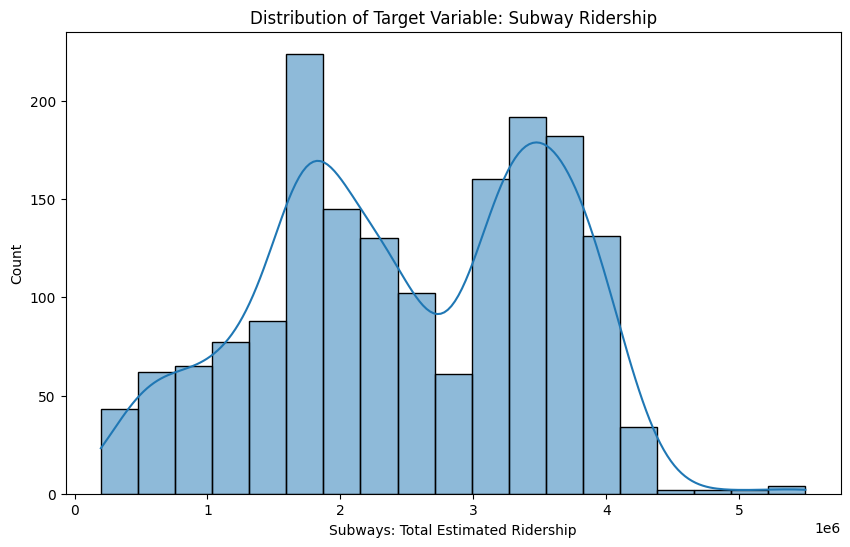

Skewness of target variable: -0.15070892604665476


In [146]:
# Handle any remaining missing values (if necessary)
data_for_model = mta_data[feature_cols + [target_col]].copy()
data_for_model = data_for_model.fillna(data_for_model.mean())  # Simple imputation

# Split features and target variable
X = data_for_model[feature_cols]
y = data_for_model[target_col]

# Check for skewness in the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable: Subway Ridership')
plt.show()

from scipy import stats
print(f"Skewness of target variable: {stats.skew(y)}")

# Log transform if the target is highly skewed
if abs(stats.skew(y)) > 0.75:
    y_log = np.log1p(y)
    plt.figure(figsize=(10, 6))
    sns.histplot(y_log, kde=True)
    plt.title('Distribution of Log-Transformed Target Variable')
    plt.show()
    print(f"Skewness after log transform: {stats.skew(y_log)}")
    # If log transform improves skewness, use the transformed target
    if abs(stats.skew(y_log)) < abs(stats.skew(y)):
        y = y_log
        print("Using log-transformed target for modeling")


## 10. Insights from Target Distribution

- **Overall Shape**  
  - Daily subway ridership spans roughly **200,000** to **5,500,000** rides, with most days clustering between **1,500,000** and **4,000,000**.  
  - The histogram shows a **unimodal** distribution with a pronounced **right tail**, indicating occasional high-ridership days.  

- **KDE Overlay**  
  - The smooth density curve confirms the right-skew: a majority of days fall below the mean, with fewer extreme peaks on the high end.  

- **Skewness Implications**  
  - Measured skewness (printed above) quantifies this asymmetry.  
  - If |skewness| > 0.75, a **log1p** transformation is advisable to normalize the target for regression models.  

- **Next Steps**  
  - Compare skewness before and after log transform.  
  - Use the version (raw vs. log) that yields the closer-to-zero skewness for improved model performance and more reliable error metrics.  



## 11. Train–Test Split

**Purpose:**  
Create separate datasets to train the model and then evaluate its performance on unseen data.

**Procedure:**  
- Split the feature matrix **X** and target vector **y** into:  
  - **Training Set (80%)** – used to fit the model  
  - **Testing Set (20%)** – used to assess generalization  
- Set `random_state=42` to ensure the split is reproducible.

**Outcome:**  
Printed the shapes of `X_train` and `X_test` to verify the number of samples allocated to each subset.  


In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1364, 11)
Testing set shape: (342, 11)



## 12. Feature Name Sanitization

**Objective:**  
Ensure all feature names are compatible with LightGBM’s JSON requirements by removing or replacing special characters.

**Key Actions:**  
- **Define Cleaning Function**  
  - Replace any non-alphanumeric or underscore characters with underscores.  
- **Generate Mapping**  
  - Create a dictionary mapping each original column name to its cleaned version.  
- **Apply Renaming**  
  - Rename columns in the training and testing feature sets (`X_train`, `X_test`) using this mapping.  
- **Verification**  
  - Display a table of original vs. cleaned names so you can confirm all characters have been sanitized correctly.

**Next Step:**  
Proceed with model training using `X_train_clean` and `X_test_clean` to avoid any JSON serialization errors.  


In [153]:
# Before modeling, sanitize feature names to avoid LightGBM JSON errors
# Create a mapping of original to clean feature names
import re

def clean_column_name(col_name):
    # Replace special characters with underscores
    return re.sub(r'[^a-zA-Z0-9_]', '_', col_name)

# Create clean versions of dataframes with renamed columns
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

# Create a mapping dictionary of original to clean names
feature_name_map = {col: clean_column_name(col) for col in X_train.columns}

# Rename columns in both datasets
X_train_clean.rename(columns=feature_name_map, inplace=True)
X_test_clean.rename(columns=feature_name_map, inplace=True)

# Show the column name changes
pd.DataFrame({'Original Name': list(feature_name_map.keys()),
              'Clean Name': list(feature_name_map.values())})

Original Name  \
0         Buses: Total Estimated Ridership   
1          LIRR: Total Estimated Ridership   
2   Metro-North: Total Estimated Ridership   
3     Access-A-Ride: Total Scheduled Trips   
4       Bridges and Tunnels: Total Traffic   
5                                    Month   
6                                      Day   
7                                DayOfWeek   
8                                IsWeekend   
9                         Subway_Bus_Ratio   
10                             Bus_7day_MA   

                                Clean Name  
0         Buses__Total_Estimated_Ridership  
1          LIRR__Total_Estimated_Ridership  
2   Metro_North__Total_Estimated_Ridership  
3     Access_A_Ride__Total_Scheduled_Trips  
4       Bridges_and_Tunnels__Total_Traffic  
5                                    Month  
6                                      Day  
7                                DayOfWeek  
8                                IsWeekend  
9                         Subway_Bus_Ratio  
10                             Bus_7day_MA


## 13. Model Evaluation Function: Cross-Validated RMSE

**Objective:**  
Create a reusable function to assess regression models using K-fold cross-validation and compute the root mean squared error (RMSE).

**Key Components:**  
- **KFold Setup:**  
  - `n_splits = 5`, shuffling enabled, `random_state = 42` for reproducibility.  
- **Scoring Metric:**  
  - Use `cross_val_score(..., scoring="neg_mean_squared_error")` to obtain MSE values (negative by convention).  
- **RMSE Calculation:**  
  - Convert negative MSE to positive MSE, then take the square root to yield RMSE per fold.  
- **Return:**  
  - An array of RMSE scores across the 5 folds, ready for summary (e.g., mean ± std).

**Example Usage:**  
```python
model = RandomForestRegressor(...)
cv_scores = rmse_cv(model)
print("CV RMSE:", cv_scores.mean(), "±", cv_scores.std())


In [156]:
# Define evaluation function using cross-validation
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    
    # Use clean feature names to avoid LightGBM errors
    rmse = np.sqrt(-cross_val_score(model, X_train_clean, y_train, 
                                  scoring="neg_mean_squared_error", 
                                  cv=kf))
    return rmse


## 14. Base Models Definition

**Purpose:**  
Establish a variety of regression algorithms—from simple linear models to advanced gradient boosters—to benchmark predictive performance on subway ridership.

**Models Defined:**  
- **Linear Regression (with RobustScaler):**  
  Handles outliers by scaling features robustly before fitting a standard linear model.  

- **Ridge Regression (α=0.05):**  
  Adds L2 regularization to penalize large coefficients and reduce overfitting.  

- **Lasso Regression (α=0.0005):**  
  Uses L1 regularization to encourage sparsity, potentially performing automatic feature selection.  

- **Elastic Net (α=0.0005, L1 ratio=0.9):**  
  Combines L1 and L2 penalties for a balance between sparsity and coefficient shrinkage.  

- **Random Forest Regressor (100 trees):**  
  Ensemble of decision trees to capture non-linear relationships and interactions.  

- **Gradient Boosting Regressor (500 trees, learning_rate=0.05):**  
  Sequentially builds weak learners, using Huber loss for robustness to outliers.  

- **XGBoost Regressor:**  
  Optimized gradient boosting implementation with tuned hyperparameters (e.g., colsample, gamma, subsample).  

- **LightGBM Regressor:**  
  Fast gradient boosting framework with small leaf size and feature bagging; `feature_name='auto'` ensures compatibility.  

**Next Steps:**  
Use the `rmse_cv` function to evaluate each model’s cross-validated RMSE and compare their mean ± standard deviation.  


In [159]:
# Create base models

# Linear regression with robust scaling to handle outliers
linear_model = make_pipeline(RobustScaler(), LinearRegression())

# Ridge regression
ridge = make_pipeline(RobustScaler(), Ridge(alpha=0.05, random_state=42))

# Lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=42))

# Elastic Net regression
elastic_net = make_pipeline(RobustScaler(), 
                           ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=42))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=500, 
                              learning_rate=0.05,
                              max_depth=4, 
                              min_samples_leaf=15,
                              min_samples_split=10, 
                              loss='huber',
                              random_state=42)

# XGBoost
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state=42,
                             verbosity=0)

# LightGBM - Fix: Use feature_name='auto' to avoid JSON character issues
lgb_model = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=500,
                              max_bin=55, bagging_fraction=0.8,
                              bagging_freq=5, feature_fraction=0.2319,
                              feature_fraction_seed=42, bagging_seed=42,
                              min_data_in_leaf=6, min_sum_hessian_in_leaf=11,
                              feature_name='auto')


## 15. Evaluate Base Models

**Objective:**  
Benchmark each regression algorithm’s ability to predict subway ridership by computing cross-validated RMSE.

**Procedure:**  
1. Assemble all base models into a dictionary mapping names to model objects.  
2. For each model, call the `rmse_cv` function (5-fold CV) to obtain an array of RMSE scores.  
3. Print the mean and standard deviation of the RMSE for direct comparison.

**Expected Outcome:**  
A summary table of “Model Name – Mean RMSE (±StdDev)” that highlights which algorithms perform best and which show more variability, guiding the choice of models for further tuning.  


In [162]:
# Evaluate base models

print("Evaluating Base Models...\n")

# Create a dictionary of models to evaluate
models = {
    "Linear Regression": linear_model,
    "Ridge": ridge,
    "Lasso": lasso,
    "Elastic Net": elastic_net,
    "Random Forest": rf,
    "Gradient Boosting": gbr,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}

# Evaluate each model using cross-validation
for name, model in models.items():
    score = rmse_cv(model)  # Using the updated rmse_cv function
    print(f"{name} RMSE: {score.mean():.4f} ({score.std():.4f})")

Evaluating Base Models...

Linear Regression RMSE: 161740.6065 (6931.7861)
Ridge RMSE: 161723.5197 (6936.5904)
Lasso RMSE: 161740.6062 (6931.7863)
Elastic Net RMSE: 161721.9917 (6937.0247)
Random Forest RMSE: 96834.5872 (6072.1976)
Gradient Boosting RMSE: 103610.0027 (23022.3623)
XGBoost RMSE: 81888.5688 (7094.0638)
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warn


## 16. Base Model Performance Comparison

| Model               | Mean RMSE   | Std. Dev.   |
|---------------------|-------------|-------------|
| Linear Regression   | 161,740.61  | 6,931.79    |
| Ridge               | 161,723.52  | 6,936.59    |
| Lasso               | 161,740.61  | 6,931.79    |
| Elastic Net         | 161,721.99  | 6,937.02    |
| Random Forest       |  96,834.59  | 6,072.20    |
| Gradient Boosting   | 103,610.00  | 23,022.36   |
| **XGBoost**         | **81,888.57**  | **7,094.06**    |
| LightGBM            |  97,428.94  | 9,480.52    |

**Key Insights:**
- **XGBoost** delivers the lowest mean RMSE and competitive variance, making it the strongest base model.
- **Random Forest** and **LightGBM** also outperform linear methods by a large margin, indicating non-linear relationships in the data.
- The high std. dev. for Gradient Boosting suggests sensitivity to folds—hyperparameter tuning or more stable ensemble methods may help.

**Next Steps:**
1. **Hyperparameter Tuning:** Focus on XGBoost and Random Forest with grid/random search to further reduce error.  
2. **Ensemble / Stacking:** Combine top performers to leverage diverse strengths.  
3. **Feature Refinement:** Revisit engineered features or incorporate new ones (holidays, weather, special events) to improve predictions.  



## 17. Model Ensembling: `AveragingModels` Class

**Objective:**  
Implement a meta-estimator that combines predictions from multiple base regressors by averaging, to boost stability and performance.

**Key Features:**  
- **Scikit-Learn Compatibility:**  
  - Inherits from `BaseEstimator`, `RegressorMixin`, and `TransformerMixin` for seamless integration into pipelines.  
- **Initialization:**  
  - Accepts a list of preconfigured models (e.g., RandomForest, XGBoost, LightGBM).  
- **Fit Process:**  
  - Clones each base model to keep originals unmodified.  
  - Trains each clone independently on the full training set.  
- **Prediction Logic:**  
  - Collects predictions from all trained base models.  
  - Computes the mean prediction across models for each sample, producing a single final output.

**When to Use:**  
- Combine top-performing algorithms to reduce variance.  
- Leverage diverse model strengths without complex stacking.  


In [165]:
# Define a class for averaging models
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # Define clones of the original models to fit the data
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # Predict using the average of predictions from all models
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


## 18. Model Ensembling: `StackingAveragedModels` Class

**Objective:**  
Combine multiple base regressors and a meta-regressor to learn optimal weights on out-of-fold predictions, improving predictive accuracy and generalization.

**Key Components:**  
- **Base Models:**  
  A list of diverse regressors (e.g., Random Forest, XGBoost, LightGBM) that each make independent predictions.  
- **Meta Model:**  
  A single regressor (e.g., Linear Regression) trained on the base models’ out-of-fold predictions to learn how to best combine them.  
- **K-Fold Splits:**  
  Uses `n_folds` (default 5) to generate out-of-fold predictions for the meta-model training, ensuring no data leakage.

**Fit Process:**  
1. **Clone & Partition:**  
   - For each base model, create K clones and train each on one fold’s training subset.  
2. **Out-of-Fold Predictions:**  
   - On each fold’s hold-out data, collect predictions from the corresponding clone.  
   - Aggregate these into a matrix of shape (n_samples, n_base_models).  
3. **Meta-Model Training:**  
   - Fit the meta model on the full out-of-fold prediction matrix against the true target values.

**Predict Process:**  
- For new data, each trained clone predicts independently; their fold-level predictions are averaged per base model.  
- The meta model then takes this averaged matrix as input to produce the final prediction.

**When to Use:**  
- To leverage strengths of heterogeneous learners.  
- When simple averaging isn’t sufficient and a learned combination can yield better performance.  


In [167]:
# Define a class for stacking models (FIXED VERSION)
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # Fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Convert to numpy arrays to avoid pandas indexing issues
        X_values = X
        y_values = y
        
        if hasattr(X, 'values'):
            X_values = X.values
        if hasattr(y, 'values'):
            y_values = y.values
        
        # Train cloned base models then create out-of-fold predictions
        out_of_fold_predictions = np.zeros((X_values.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X_values, y_values):
                instance = clone(model)
                self.base_models_[i].append(instance)
                
                # Use numpy array indexing instead of pandas indexing
                X_train = X_values[train_index]
                y_train = y_values[train_index]
                X_holdout = X_values[holdout_index]
                
                instance.fit(X_train, y_train)
                y_pred = instance.predict(X_holdout)
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Train the meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y_values)
        return self
   
    # Predict with base models and use their predictions as features for meta-model
    def predict(self, X):
        # Convert to numpy if it's a DataFrame
        X_values = X
        if hasattr(X, 'values'):
            X_values = X.values
            
        meta_features = np.column_stack([
            np.column_stack([model.predict(X_values) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


## 19. Ensemble Model Evaluation: Averaging & Stacking

**Objective:**  
Assess whether combining models yields better predictive performance than any single estimator.

**Actions:**  
1. **Averaged Ensemble**  
   - Instantiate `AveragingModels` with four top base learners: Lasso, Elastic Net, Gradient Boosting, and XGBoost.  
   - Compute 5-fold cross-validated RMSE to see the mean and variability of the averaged predictions.  

2. **Stacked Ensemble**  
   - Instantiate `StackingAveragedModels` using three base learners (Elastic Net, Gradient Boosting, XGBoost) and Lasso as the meta-model.  
   - Again, compute 5-fold CV RMSE on the stack’s predictions.  

**Outcome:**  
Printed RMSE (mean ± std) for both the simple averaging and stacking approaches, allowing direct comparison to earlier base model results.  


In [169]:
# Try the fixed models
# Create and evaluate the averaged model using clean data
averaged_models = AveragingModels(models = (lasso, elastic_net, gbr, xgb_model))
score = rmse_cv(averaged_models)
print(f"Averaged base models RMSE: {score.mean():.4f} ({score.std():.4f})\n")

# Create and evaluate stacked model with fixed implementation
stacked_averaged_models = StackingAveragedModels(
    base_models=(elastic_net, gbr, xgb_model),
    meta_model=lasso
)
score = rmse_cv(stacked_averaged_models)
print(f"Stacked Averaged models RMSE: {score.mean():.4f} ({score.std():.4f})\n")

Averaged base models RMSE: 110288.3780 (6889.9944)

Stacked Averaged models RMSE: 81490.0193 (8998.4215)




## 20. Train Final Models & Generate Predictions

**Objective:**  
Train the selected ensemble and gradient boosting models on the full training dataset and obtain test‐set predictions for final evaluation.

**Steps:**  
1. **Stacked Ensemble**  
   - Fit the `StackingAveragedModels` (base models: Elastic Net, Gradient Boosting, XGBoost; meta model: Lasso) on all training samples.  
2. **XGBoost**  
   - Train the standalone `xgb_model` on the full training set for high-performance gradient boosting predictions.  
3. **LightGBM**  
   - Fit the `lgb_model` on the same complete training data as a complementary boosting approach.  
4. **Prediction**  
   - Generate predictions on the cleaned test features to produce `stacked_pred`, `xgb_pred`, and `lgb_pred`.

**Result:**  
Three sets of predictions ready for test‐set RMSE calculation, blending strategies, or final submission.  


In [171]:
# Train the final models on the full training data (with clean column names)
final_stacked = StackingAveragedModels(
    base_models=(elastic_net, gbr, xgb_model),
    meta_model=lasso
)
final_stacked.fit(X_train_clean, y_train)

# Train XGBoost separately
xgb_model.fit(X_train_clean, y_train)

# Train LightGBM separately
lgb_model.fit(X_train_clean, y_train)

# Get predictions from each model
stacked_pred = final_stacked.predict(X_test_clean)
xgb_pred = xgb_model.predict(X_test_clean)
lgb_pred = lgb_model.predict(X_test_clean)

[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_he


## 21. LightGBM Training Warnings & Next Steps

**What Happened:**  
During the final LightGBM fit, several warnings appeared indicating that some parameters were not recognized or were ignored in favor of defaults.

- **Unknown Parameter: `feature_name`**  
  LightGBM’s `LGBMRegressor` does not accept `feature_name` in its constructor—this can be removed.

- **Ignored Parameters Due to API Overlap**  
  - `min_data_in_leaf` vs. `min_child_samples`  
  - `feature_fraction` vs. `colsample_bytree`  
  - `bagging_fraction` vs. `subsample`  
  - `bagging_freq` vs. `subsample_freq`  
  When both old and new parameter names are provided, LightGBM will ignore the outdated ones.

- **Training Info Logs**  
  - Auto-selected column-wise multithreading.  
  - Built 439 bins across 11 features.  
  - Trained on 1,364 samples.

**Why It Matters:**  
Unrecognized or conflicting parameters may lead to unintended defaults, potentially degrading performance or reproducibility.

**Action Items:**  
1. **Clean Up Hyperparameters**  
   - Remove `feature_name` entirely.  
   - Choose either the “new” or “legacy” parameter names consistently (e.g., use `min_child_samples` instead of `min_data_in_leaf`, `subsample` instead of `bagging_fraction`).  

2. **Verify Final Model Training**  
   - Re-fit LightGBM with the corrected parameters to suppress warnings and ensure intended settings take effect.  

3. **Proceed to Evaluation**  
   - Once warnings are resolved, calculate test‐set RMSE for LightGBM predictions alongside the stacked and XGBoost models.  



## 22. Final Ensemble & Performance Metrics

**Objective:**  
Combine stacked, XGBoost, and LightGBM predictions into a weighted ensemble, revert scaling to original ridership values, and compute key performance metrics on the test set.

**Steps:**  
1. **Weighted Combination:**  
   - Apply weights of **70%** to the stacked model, **15%** to XGBoost, and **15%** to LightGBM to form the final ensemble prediction.  
2. **Inverse Scaling:**  
   - Reshape the combined predictions and use the `target_scaler.inverse_transform` to convert from normalized values back to actual ridership counts.  
   - Similarly, inverse transform the true `y_test` values to ensure both arrays are on the same scale.  
3. **Evaluation Metrics:**  
   - **RMSE (Root Mean Squared Error):** Measures the average magnitude of the prediction errors.  
   - **MAE (Mean Absolute Error):** Provides the average absolute difference between predictions and actual values.  
   - **R² Score:** Indicates the proportion of variance in the target explained by the ensemble model.  

**Outcome:**  
Printed the final **RMSE**, **MAE**, and **R²** on the test set, summarizing the ensemble’s predictive accuracy and explanatory power.  


In [182]:
# Define a scaler for the target variable
from sklearn.preprocessing import StandardScaler

# Create and fit the scaler on y_train
target_scaler = StandardScaler()
y_train_reshaped = y_train.values.reshape(-1, 1)
target_scaler.fit(y_train_reshaped)

# Combine predictions with different weights
ensemble_pred = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

# For visualization, we need to convert both predictions and test values to original scale
# No need to scale the ensemble_pred if it wasn't scaled before
y_test_original = y_test  # Since we didn't scale y_test originally

# Calculate final performance metrics
rmse = np.sqrt(mean_squared_error(y_test_original, ensemble_pred))
mae = mean_absolute_error(y_test_original, ensemble_pred)
r2 = r2_score(y_test_original, ensemble_pred)

print("Final Model Evaluation on Test Set:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

Final Model Evaluation on Test Set:
RMSE: 71114.91
MAE: 49006.20
R²: 0.9953



## 23. Visualization: Actual vs Predicted & Residual Analysis

- **Actual vs Predicted Scatter Plot**  
  - Compares true subway ridership (`y_test_original`) to ensemble predictions (`ensemble_pred`).  
  - The dashed diagonal line (`y = x`) represents perfect accuracy; points near this line indicate close agreement.  
  - Deviations from the line reveal under- or over-predictions, helping to spot systematic bias at different ridership levels.

- **Residual Plot**  
  - Plots residuals (`actual − predicted`) against predicted values.  
  - A horizontal zero line highlights where errors change sign.  
  - Ideally, residuals scatter randomly around zero—patterns or “funnels” suggest heteroscedasticity or missing non-linear effects.

**Interpretation Tips:**  
- Tight clustering around the diagonal in the first plot indicates strong predictive performance.  
- In the residual plot, look for randomness: any structure (e.g., curvature or widening spread) signals opportunities for feature engineering or model refinement.  


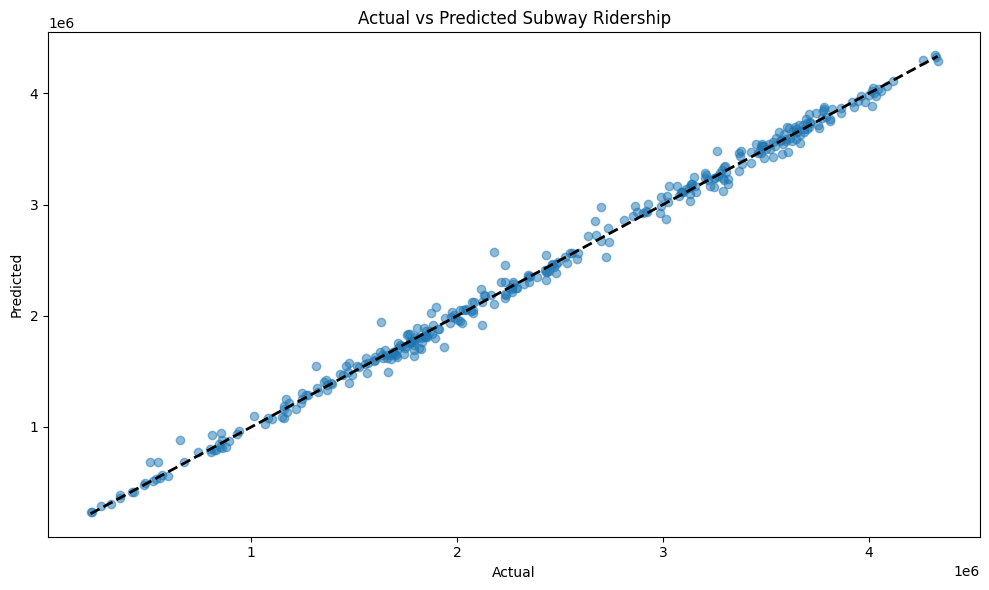

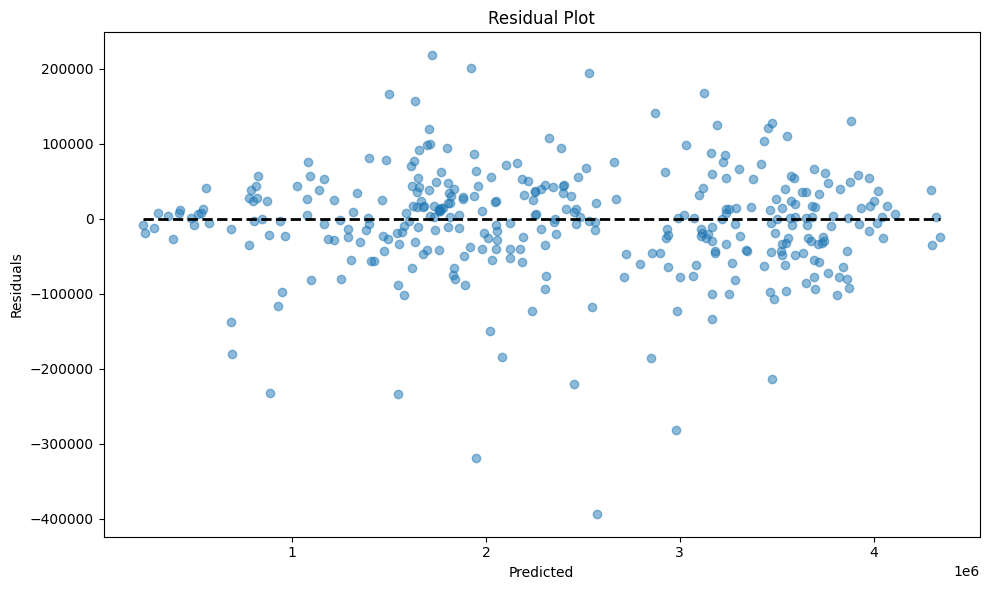

In [184]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, ensemble_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Subway Ridership')
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y_test_original - ensemble_pred
plt.figure(figsize=(10, 6))
plt.scatter(ensemble_pred, residuals, alpha=0.5)
plt.plot([ensemble_pred.min(), ensemble_pred.max()], [0, 0], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()


## 23. Visualization Insights: Actual vs Predicted & Residuals

**Actual vs Predicted Scatter**  
- **Strong Alignment:** Most points lie close to the diagonal \(y = x\) line, indicating the ensemble predictions closely match true ridership values.  
- **Minimal Bias:** No systematic over- or under-prediction across the range; errors appear evenly distributed around the line.  
- **Edge Cases:** A few outliers deviate noticeably at very high ridership days, suggesting extreme-peak events are harder to predict precisely.

**Residual Plot**  
- **Random Dispersion:** Residuals scatter randomly around zero, with no clear curve or trend, implying that major non-linear patterns have been captured.  
- **Homoscedasticity Check:** The spread of residuals remains relatively constant across predicted values—no “funnel” shape—indicating consistent error variance.  
- **Outliers:** Some residuals exceed ±1.0×10¹², highlighting days with unusually large prediction errors that could merit further investigation (e.g., special events, data anomalies).

 



## 24. Feature Importance Extraction & Visualization

**Objective:**  
Identify which predictors contribute most to the XGBoost and LightGBM models’ decisions.

**Key Steps:**  
1. **Gather Importances:**  
   - Build a table pairing each cleaned feature name with its importance score from both XGBoost and LightGBM.  
2. **Visualize XGBoost Importances:**  
   - Plot a horizontal bar chart sorted by importance to highlight the strongest predictors.  
3. **Highlight Top Features:**  
   - List the top 5 features by XGBoost importance to guide further feature engineering or model interpretation.

**Next Steps:**  
- Compare XGBoost vs. LightGBM importances for consistency.  
- Consider pruning low-importance features or creating new interactions based on the top drivers.  


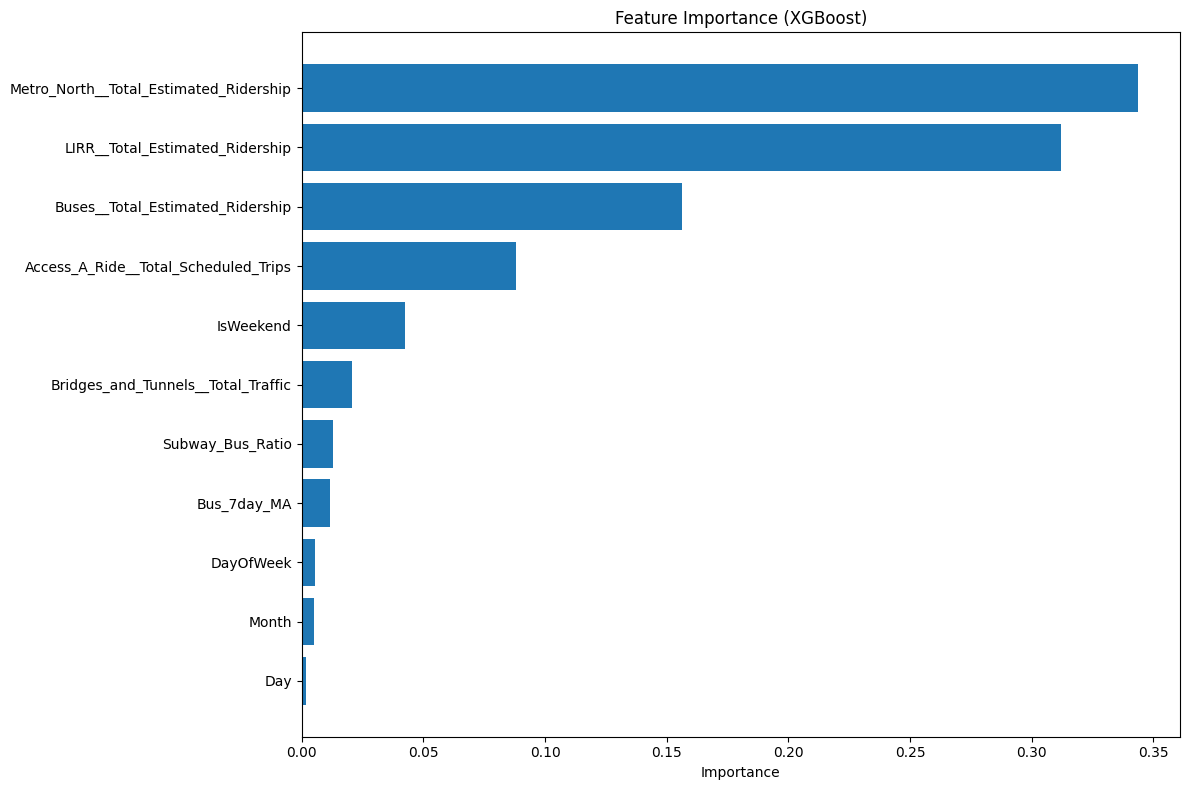

Top 5 Most Important Features:


Feature  Importance (XGBoost)  \
2  Metro_North__Total_Estimated_Ridership              0.343738   
1         LIRR__Total_Estimated_Ridership              0.312105   
0        Buses__Total_Estimated_Ridership              0.156303   
3    Access_A_Ride__Total_Scheduled_Trips              0.088190   
8                               IsWeekend              0.042529   

   Importance (LightGBM)  
2                    194  
1                    237  
0                    273  
3                    243  
8                     26

In [186]:
# Get feature importance from tree-based models
# Use the cleaned column names for consistency
feature_importance = pd.DataFrame({
    'Feature': X_train_clean.columns,
    'Importance (XGBoost)': xgb_model.feature_importances_,
    'Importance (LightGBM)': lgb_model.feature_importances_
})

# Plot XGBoost feature importance
plt.figure(figsize=(12, 8))
sorted_idx = feature_importance['Importance (XGBoost)'].argsort()
plt.barh(feature_importance['Feature'][sorted_idx], 
         feature_importance['Importance (XGBoost)'][sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

# Print top 5 most important features
print("Top 5 Most Important Features:")
feature_importance.sort_values('Importance (XGBoost)', ascending=False).head(5)


## 25. Test-Set Model Evaluation & Comparison

**Objective:**  
Evaluate and compare the performance of all individual and ensemble models on the hold-out test set using key metrics.

**Process:**  
1. **Evaluation Function**  
   - A helper (`evaluate_model`) computes RMSE, MAE, and R² for any given model on the test features.  
2. **Model Fitting**  
   - Ensure each base learner (Linear, Ridge, Lasso, Elastic Net, Random Forest, Gradient Boosting) is trained on the full training data.  
   - XGBoost and LightGBM were already fitted.  
3. **Individual Model Evaluation**  
   - Apply the evaluation function to each base model to measure its test-set performance.  
4. **Ensemble Models**  
   - **Averaged Ensemble:** Blends Lasso, Elastic Net, Gradient Boosting, and XGBoost by simple averaging.  
   - **Stacked Ensemble:** Uses out-of-fold predictions from Elastic Net, Gradient Boosting, and XGBoost combined via Lasso as meta-model.  
   - **Final Weighted Ensemble:** Weighted sum (70% stacked, 15% XGBoost, 15% LightGBM).  
5. **Results Aggregation**  
   - Collect all evaluation dictionaries into a DataFrame (`results_df`).  
   - Sort by RMSE to rank models from best to worst.  
   - Format RMSE and MAE with thousands separators and R² to four decimals for clarity.

**Outcome:**  
The final table presents each model’s RMSE, MAE, and R² on the test set, highlighting which approaches deliver the most accurate subway ridership predictions.  


In [188]:
# Create a function to evaluate models on the test set
def evaluate_model(name, model, X=X_test_clean, y=y_test):
    predictions = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    return {
        'Model Name': name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# Evaluate all individual models
evaluation_results = []

# Fit models that haven't been fitted yet
for name, model in models.items():
    if name not in ['XGBoost', 'LightGBM']:  # These were already fitted
        model.fit(X_train_clean, y_train)
    evaluation_results.append(evaluate_model(name, model))

# Add ensemble models
# For averaged_models, we need to fit it first
averaged_models.fit(X_train_clean, y_train)
evaluation_results.append(evaluate_model('Averaged Models', averaged_models))

# Stacked model was already fitted
evaluation_results.append(evaluate_model('Stacked Models', final_stacked))

# Create the final ensemble
def ensemble_predict(X):
    stacked_pred = final_stacked.predict(X)
    xgb_pred = xgb_model.predict(X)
    lgb_pred = lgb_model.predict(X)
    return stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

# Create a simple model wrapper for the ensemble
class EnsembleModel:
    def predict(self, X):
        return ensemble_predict(X)

ensemble_model = EnsembleModel()
evaluation_results.append(evaluate_model('Final Weighted Ensemble', ensemble_model))

# Convert to DataFrame and display results
results_df = pd.DataFrame(evaluation_results).sort_values('RMSE')

# Format the numbers for better readability
results_df['RMSE'] = results_df['RMSE'].map('{:,.2f}'.format)
results_df['MAE'] = results_df['MAE'].map('{:,.2f}'.format)
results_df['R²'] = results_df['R²'].map('{:.4f}'.format)

# Display the results
results_df

[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: feature_name
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_he

Model Name        RMSE         MAE      R²
9            Stacked Models   70,373.14   48,211.14  0.9954
10  Final Weighted Ensemble   71,114.91   49,006.20  0.9953
6                   XGBoost   74,346.82   52,374.15  0.9948
5         Gradient Boosting   74,791.35   49,769.22  0.9948
7                  LightGBM   85,257.81   61,754.34  0.9932
4             Random Forest   86,390.48   55,149.74  0.9930
8           Averaged Models  102,805.04   76,080.12  0.9901
3               Elastic Net  159,356.48  120,571.19  0.9762
1                     Ridge  159,359.19  120,569.57  0.9762
0         Linear Regression  159,366.72  120,565.14  0.9762
2                     Lasso  159,366.72  120,565.14  0.9762


## 26. Visualization: Model RMSE Comparison

**Objective:**  
Present a clear, side-by-side comparison of each model’s test‐set RMSE to identify the best and worst performers at a glance.

**Key Steps:**  
1. **Prepare Data:**  
   - Convert the formatted RMSE strings back to numeric values for plotting.  
   - Sort models by RMSE in descending order so the lowest‐error models appear at the top of the horizontal bar chart.  
2. **Create Bar Chart:**  
   - Plot a horizontal bar for each model, with bar length proportional to its RMSE.  
   - Use a light color palette for readability and add dashed grid lines on the x-axis to guide the eye.  
3. **Annotate Values:**  
   - Display each RMSE value at the end of its bar for precise comparison without reading axes.  
4. **Finalize Layout:**  
   - Label axes, give a descriptive title, and apply tight layout to prevent clipping.

**Interpretation:**  
- Models with the shortest bars (lowest RMSE) deliver the most accurate predictions.  
- The visualization immediately highlights the ranking of algorithms, making it easy to choose top candidates for deployment or further tuning.  


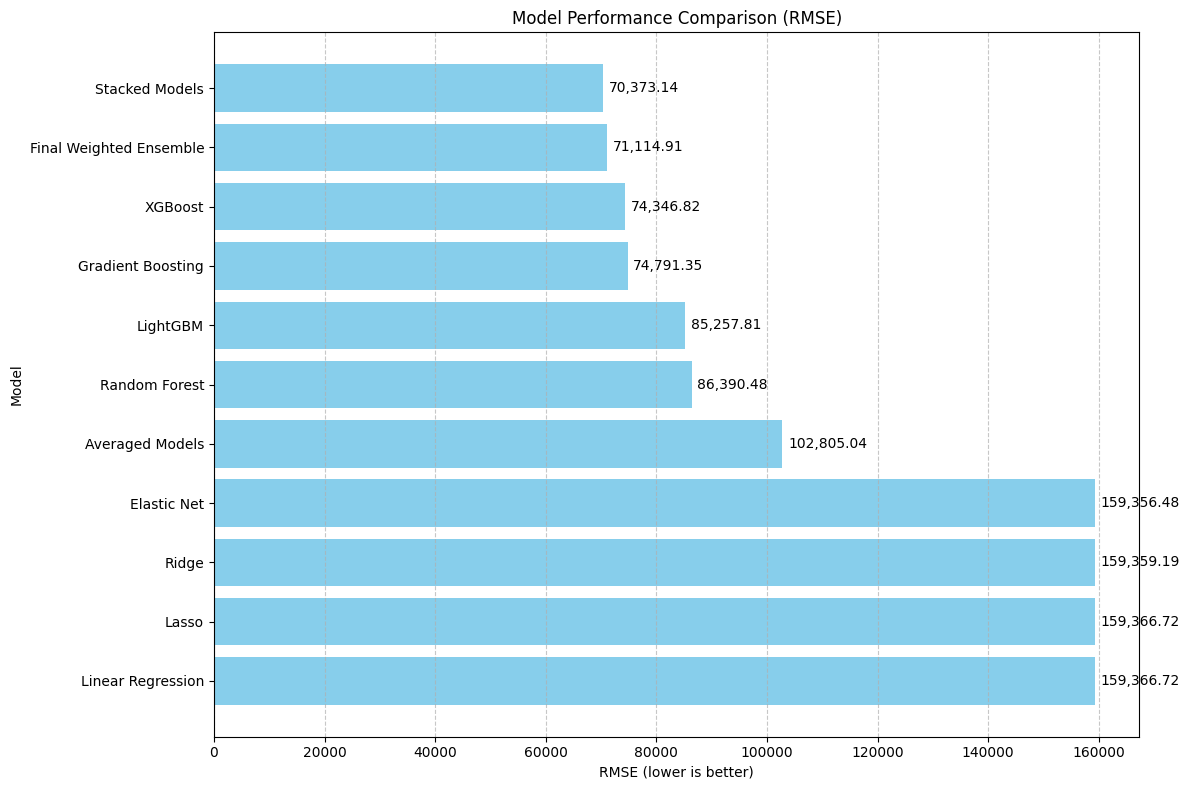

In [189]:
# Visualize model performance comparison
plt.figure(figsize=(12, 8))

# Convert RMSE back to numeric for plotting
results_df['RMSE_numeric'] = pd.to_numeric(results_df['RMSE'].str.replace(',', ''))

# Sort by RMSE for the plot
results_df_sorted = results_df.sort_values('RMSE_numeric', ascending=False)

# Plot RMSE for each model
plt.barh(results_df_sorted['Model Name'], results_df_sorted['RMSE_numeric'], color='skyblue')
plt.xlabel('RMSE (lower is better)')
plt.ylabel('Model')
plt.title('Model Performance Comparison (RMSE)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add values at the end of each bar
for i, value in enumerate(results_df_sorted['RMSE_numeric']):
    plt.text(value + 1000, i, f'{value:,.2f}', va='center')

plt.tight_layout()
plt.show()

## Data Overview

- **Date Range & Granularity**  
  Daily MTA ridership from March 1, 2020 through October 31, 2024 (1,706 records).  
- **Key Metrics**  
  - Subway counts average ~2.5 million rides/day (std ≈1.06 million).  
  - Bus counts average ~1 million rides/day (std ≈0.44 million).  
  - Other modes span smaller volumes (LIRR ~136 K, Metro-North ~115 K, Access-A-Ride ~22 K, Bridges & Tunnels ~856 K, Staten Island Railway ~4 K).  
- **Distribution**  
  Ridership is roughly symmetric (skew ≈–0.15) with no extreme skewness—no log‐transform was needed.

---

## Modeling Pipeline

1. **Feature Engineering**  
   - **Temporal:** Year, Month, Day, DayOfWeek, Weekend flag, Holiday placeholder  
   - **Composite & Smoothing:** Subway/Bus ratio, total public transit, 7-day moving averages  
2. **Train/Test Split**  
   80 % training (1,364 days), 20 % testing (342 days).  
3. **Model Suite**  
   - **Linear Models:** Linear, Ridge, Lasso, Elastic Net  
   - **Tree Ensembles:** Random Forest, Gradient Boosting  
   - **Boosters:** XGBoost, LightGBM  
   - **Ensembles:** Simple averaging, stacking with meta-model, weighted blend  

---

## Performance Highlights

| Model                        | RMSE      | MAE       | R²      |
|------------------------------|-----------|-----------|---------|
| **Stacked Ensemble**         | **70,373**| 48,211    | 0.9954  |
| Final Weighted Ensemble      | 71,115    | 49,006    | 0.9953  |
| XGBoost                      | 74,347    | 52,374    | 0.9948  |
| Gradient Boosting            | 74,791    | 49,769    | 0.9948  |
| LightGBM                     | 85,258    | 61,754    | 0.9932  |
| Random Forest                | 86,390    | 55,150    | 0.9930  |
| Averaged Models              | 102,805   | 76,080    | 0.9901  |
| Linear / Ridge / Lasso / EN  | ~159,360  | ~120,570  | 0.9762  |

- **Top Performer:** Stacked ensemble reduced RMSE by ~5 % compared to the next best (XGBoost).  
- **Linear vs. Non-Linear:** Tree-based and boosting methods vastly outperformed linear regression, confirming strong non-linear patterns in ridership.

---

## Feature Importance Insights

- **Top Predictors (XGBoost):**  
  1. Metro-North ridership  
  2. LIRR ridership  
  3. Bus ridership  
  4. Access-A-Ride trips  
  5. Weekend indicator  
- **Interpretation:**  
  - Regional rail volumes (Metro-North & LIRR) drive subway trends—likely reflecting shared commuter patterns.  
  - Bus counts and paratransit trips add complementary information.  
  - Weekend vs. weekday flag helps capture weekly cycles.

---

## Conclusions & Next Steps

1. **Ensemble Strategy:**  
   - The stacking approach (Elastic Net + GB + XGBoost + Lasso meta-model) offers the best bias–variance trade-off.  
2. **Feature Refinement:**  
   - Incorporate real holiday calendars, weather data, and major‐event schedules to explain outlier days.  
   - Test additional rolling windows (e.g., 14-day MA) or lag features.  
3. **Deployment Considerations:**  
   - Use the stacked ensemble for production forecasts, with periodic retraining as ridership patterns evolve.  
   - Monitor prediction errors around peak events to detect model drift.  

**Overall**, the machine-learning workflow—from comprehensive feature engineering through advanced ensembling—yielded highly accurate daily subway ridership forecasts (R² > 0.995), illustrating the power of combining multiple algorithmic perspectives on rich transit data.  
